# Solve The Regression Problem 

Import the necessary library

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


import warnings
warnings.filterwarnings('ignore')

Read the data

In [2]:
data = pd.read_csv("avocado.csv.zip")
data

Unnamed: 0        Date  AveragePrice  Total Volume     4046       4225  \
0               0  2015-12-27          1.33      64236.62  1036.74   54454.85   
1               1  2015-12-20          1.35      54876.98   674.28   44638.81   
2               2  2015-12-13          0.93     118220.22   794.70  109149.67   
3               3  2015-12-06          1.08      78992.15  1132.00   71976.41   
4               4  2015-11-29          1.28      51039.60   941.48   43838.39   
...           ...         ...           ...           ...      ...        ...   
18244           7  2018-02-04          1.63      17074.83  2046.96    1529.20   
18245           8  2018-01-28          1.71      13888.04  1191.70    3431.50   
18246           9  2018-01-21          1.87      13766.76  1191.92    2452.79   
18247          10  2018-01-14          1.93      16205.22  1527.63    2981.04   
18248          11  2018-01-07          1.62      17489.58  2894.77    2356.13   

         4770  Total Bags  Small Bags  Large Bags  XLarge Bags          type  \
0       48.16     8696.87     8603.62       93.25          0.0  conventional   
1       58.33     9505.56     9408.07       97.49          0.0  conventional   
2      130.50     8145.35     8042.21      103.14          0.0  conventional   
3       72.58     5811.16     5677.40      133.76          0.0  conventional   
4       75.78     6183.95     5986.26      197.69          0.0  conventional   
...       ...         ...         ...         ...          ...           ...   
18244    0.00    13498.67    13066.82      431.85          0.0       organic   
18245    0.00     9264.84     8940.04      324.80          0.0       organic   
18246  727.94     9394.11     9351.80       42.31          0.0       organic   
18247  727.01    10969.54    10919.54       50.00          0.0       organic   
18248  224.53    12014.15    11988.14       26.01          0.0       organic   

       year            region  
0      2015            Albany  
1      2015            Albany  
2      2015            Albany  
3      2015            Albany  
4      2015            Albany  
...     ...               ...  
18244  2018  WestTexNewMexico  
18245  2018  WestTexNewMexico  
18246  2018  WestTexNewMexico  
18247  2018  WestTexNewMexico  
18248  2018  WestTexNewMexico  

[18249 rows x 14 columns]

This dataset contains the details of Avacado case study in this dataset numerical and categorical data is present. Here Average price is our target/output veriable Average price  which contains numerical so it will be termed as a regression problem where we need to predict the several Average price using the regression problem.

# Exploratary Data Analysis (EDA)

In [3]:
#Check the dimension of the data
data.shape

(18249, 14)

This dataset contains 18249 rows and 14 columns. out of which 1 target variable and remaining 13 are independent variables 

In [4]:
#Check the columns of hte data 
data.columns.tolist()

['Unnamed: 0',
 'Date',
 'AveragePrice',
 'Total Volume',
 '4046',
 '4225',
 '4770',
 'Total Bags',
 'Small Bags',
 'Large Bags',
 'XLarge Bags',
 'type',
 'year',
 'region']

In [5]:
#Chech the data types of the data
data.dtypes

Unnamed: 0        int64
Date             object
AveragePrice    float64
Total Volume    float64
4046            float64
4225            float64
4770            float64
Total Bags      float64
Small Bags      float64
Large Bags      float64
XLarge Bags     float64
type             object
year              int64
region           object
dtype: object

as i see there is int64, object and float datatype

In [6]:
#Check the null value of the data
data.isnull().sum()

Unnamed: 0      0
Date            0
AveragePrice    0
Total Volume    0
4046            0
4225            0
4770            0
Total Bags      0
Small Bags      0
Large Bags      0
XLarge Bags     0
type            0
year            0
region          0
dtype: int64

as i see there is no null value in this dataset

In [7]:
data['region'].unique()

array(['Albany', 'Atlanta', 'BaltimoreWashington', 'Boise', 'Boston',
       'BuffaloRochester', 'California', 'Charlotte', 'Chicago',
       'CincinnatiDayton', 'Columbus', 'DallasFtWorth', 'Denver',
       'Detroit', 'GrandRapids', 'GreatLakes', 'HarrisburgScranton',
       'HartfordSpringfield', 'Houston', 'Indianapolis', 'Jacksonville',
       'LasVegas', 'LosAngeles', 'Louisville', 'MiamiFtLauderdale',
       'Midsouth', 'Nashville', 'NewOrleansMobile', 'NewYork',
       'Northeast', 'NorthernNewEngland', 'Orlando', 'Philadelphia',
       'PhoenixTucson', 'Pittsburgh', 'Plains', 'Portland',
       'RaleighGreensboro', 'RichmondNorfolk', 'Roanoke', 'Sacramento',
       'SanDiego', 'SanFrancisco', 'Seattle', 'SouthCarolina',
       'SouthCentral', 'Southeast', 'Spokane', 'StLouis', 'Syracuse',
       'Tampa', 'TotalUS', 'West', 'WestTexNewMexico'], dtype=object)

There is lots of unique value in categorical column

In [8]:
data['AveragePrice'].unique()

array([1.33, 1.35, 0.93, 1.08, 1.28, 1.26, 0.99, 0.98, 1.02, 1.07, 1.12,
       1.31, 1.11, 1.34, 1.45, 1.05, 1.37, 1.27, 1.32, 1.23, 1.19, 1.43,
       1.2 , 1.22, 1.13, 1.16, 1.06, 1.17, 1.24, 0.96, 1.  , 1.09, 0.95,
       0.97, 1.15, 1.01, 1.14, 1.1 , 1.04, 1.03, 1.18, 1.29, 1.25, 0.71,
       0.94, 0.91, 1.39, 1.4 , 1.36, 1.3 , 1.54, 1.59, 1.56, 1.38, 1.49,
       1.5 , 1.47, 1.42, 1.41, 1.44, 1.52, 0.9 , 0.87, 0.78, 0.92, 0.83,
       0.88, 0.84, 0.85, 1.21, 0.79, 0.89, 0.86, 0.8 , 0.82, 0.74, 0.81,
       0.77, 0.75, 0.65, 0.73, 0.68, 0.72, 0.67, 0.76, 0.62, 0.7 , 0.66,
       1.46, 0.49, 0.53, 0.56, 0.6 , 0.58, 0.54, 0.52, 0.51, 0.57, 0.63,
       0.64, 0.61, 1.48, 1.55, 1.58, 1.53, 1.57, 1.51, 0.69, 1.62, 1.63,
       1.61, 1.6 , 1.73, 1.8 , 1.86, 1.85, 1.69, 1.66, 1.65, 1.64, 1.67,
       1.68, 1.82, 2.07, 1.84, 1.83, 1.7 , 1.72, 1.81, 1.78, 0.59, 1.9 ,
       1.93, 1.99, 1.95, 1.89, 1.76, 1.71, 1.74, 0.55, 1.79, 1.75, 1.94,
       2.2 , 1.87, 1.77, 2.06, 2.11, 2.22, 2.14, 2.

There is lots of unique value in in averageprice dataset 

In [9]:
#check the information about the data 
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    18249 non-null  int64  
 1   Date          18249 non-null  object 
 2   AveragePrice  18249 non-null  float64
 3   Total Volume  18249 non-null  float64
 4   4046          18249 non-null  float64
 5   4225          18249 non-null  float64
 6   4770          18249 non-null  float64
 7   Total Bags    18249 non-null  float64
 8   Small Bags    18249 non-null  float64
 9   Large Bags    18249 non-null  float64
 10  XLarge Bags   18249 non-null  float64
 11  type          18249 non-null  object 
 12  year          18249 non-null  int64  
 13  region        18249 non-null  object 
dtypes: float64(9), int64(2), object(3)
memory usage: 1.9+ MB


as we seen here there is no null value in this data set 

<Axes: >

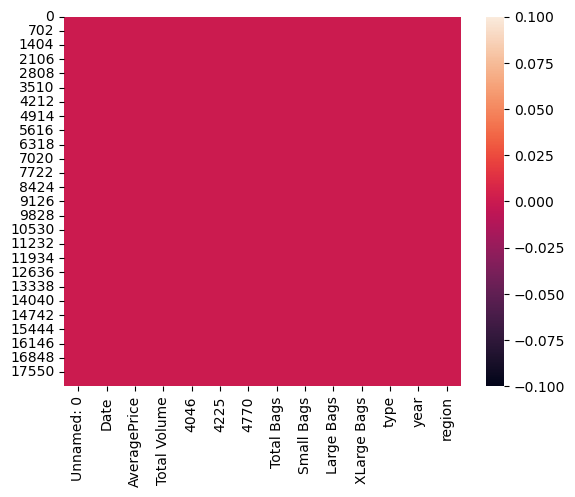

In [10]:
# visualization null value using heat map 
sns.heatmap(data.isnull())

There is  visualize the data perfectly using heatmap so no null value present in this dataset

In [11]:
# checking the value counts of each columns 
for i in data.columns:
    print(data[i].value_counts())
    print('\n')

0     432
7     432
1     432
11    432
9     432
8     432
10    432
6     432
5     432
4     432
3     432
2     432
41    324
34    324
35    324
36    324
37    324
38    324
39    324
40    324
47    324
42    324
43    324
44    324
45    324
46    324
32    324
48    324
49    324
50    324
33    324
26    324
31    324
30    324
12    324
13    324
14    324
15    324
16    324
17    324
18    324
19    324
20    324
21    324
22    324
23    324
24    324
25    324
27    324
28    324
29    324
51    322
52    107
Name: Unnamed: 0, dtype: int64


2015-12-27    108
2017-12-24    108
2017-12-10    108
2017-12-03    108
2017-11-26    108
             ... 
2016-11-06    108
2018-01-07    108
2017-06-18    107
2017-06-25    107
2015-12-06    107
Name: Date, Length: 169, dtype: int64


1.15    202
1.18    199
1.08    194
1.26    193
1.13    192
       ... 
3.25      1
3.12      1
2.68      1
3.03      1
3.17      1
Name: AveragePrice, Length: 259, dtype: int64


4103.97       2
352

There are the value counts of all columns and we can see all columns very good

In [12]:
data.drop('year',axis=1,inplace=True)
data.drop('Unnamed: 0',axis=1,inplace=True)

Here we drop the some column i feel this both column are not effected to predict the model

In [13]:
# check the categarical and numerical columns
categorical_col = []
for i in data.dtypes.index:
    if data.dtypes[i] == "object":
        categorical_col.append(i)
print("categorical columns: ", categorical_col)
print("\n")


numerical_col = []
for i in data.dtypes.index:
    if data.dtypes[i]!="object":
        numerical_col.append(i)
print("numerical columns: ",numerical_col)

categorical columns:  ['Date', 'type', 'region']


numerical columns:  ['AveragePrice', 'Total Volume', '4046', '4225', '4770', 'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags']


There is devided data into two parts one of categorical and one is numerical data,
There is three columns categorical data and nine columns are numerical data type.

In [14]:
# check the umique values to the data 
data.nunique().to_frame("NO of unique values")

NO of unique values
Date                          169
AveragePrice                  259
Total Volume                18237
4046                        17702
4225                        18103
4770                        12071
Total Bags                  18097
Small Bags                  17321
Large Bags                  15082
XLarge Bags                  5588
type                            2
region                         54

Here we check the unique value

#  Description the dataset

In [15]:
# statistical summary of numerical dataset 
data.describe()

AveragePrice  Total Volume          4046          4225          4770  \
count  18249.000000  1.824900e+04  1.824900e+04  1.824900e+04  1.824900e+04   
mean       1.405978  8.506440e+05  2.930084e+05  2.951546e+05  2.283974e+04   
std        0.402677  3.453545e+06  1.264989e+06  1.204120e+06  1.074641e+05   
min        0.440000  8.456000e+01  0.000000e+00  0.000000e+00  0.000000e+00   
25%        1.100000  1.083858e+04  8.540700e+02  3.008780e+03  0.000000e+00   
50%        1.370000  1.073768e+05  8.645300e+03  2.906102e+04  1.849900e+02   
75%        1.660000  4.329623e+05  1.110202e+05  1.502069e+05  6.243420e+03   
max        3.250000  6.250565e+07  2.274362e+07  2.047057e+07  2.546439e+06   

         Total Bags    Small Bags    Large Bags    XLarge Bags  
count  1.824900e+04  1.824900e+04  1.824900e+04   18249.000000  
mean   2.396392e+05  1.821947e+05  5.433809e+04    3106.426507  
std    9.862424e+05  7.461785e+05  2.439660e+05   17692.894652  
min    0.000000e+00  0.000000e+00  0.000000e+00       0.000000  
25%    5.088640e+03  2.849420e+03  1.274700e+02       0.000000  
50%    3.974383e+04  2.636282e+04  2.647710e+03       0.000000  
75%    1.107834e+05  8.333767e+04  2.202925e+04     132.500000  
max    1.937313e+07  1.338459e+07  5.719097e+06  551693.650000

This gives the statistical information of numericcal columns. The summary of the dataset looks some column is not perfect since there some negative/invalid values present.

The counts of all the columns are same which means there are no null values in the dataset.

in this dataset we checked the mean of the data standard deviation of the data and 25 % 50% 75% and max of the dataset 

in this dataset every column are very skewness and outliers in the data.

we will deal with every columns of skewness and outliers of the data 

In [16]:
data['AveragePrice'].value_counts()

1.15    202
1.18    199
1.08    194
1.26    193
1.13    192
       ... 
3.25      1
3.12      1
2.68      1
3.03      1
3.17      1
Name: AveragePrice, Length: 259, dtype: int64

In [17]:
data

Date  AveragePrice  Total Volume     4046       4225    4770  \
0      2015-12-27          1.33      64236.62  1036.74   54454.85   48.16   
1      2015-12-20          1.35      54876.98   674.28   44638.81   58.33   
2      2015-12-13          0.93     118220.22   794.70  109149.67  130.50   
3      2015-12-06          1.08      78992.15  1132.00   71976.41   72.58   
4      2015-11-29          1.28      51039.60   941.48   43838.39   75.78   
...           ...           ...           ...      ...        ...     ...   
18244  2018-02-04          1.63      17074.83  2046.96    1529.20    0.00   
18245  2018-01-28          1.71      13888.04  1191.70    3431.50    0.00   
18246  2018-01-21          1.87      13766.76  1191.92    2452.79  727.94   
18247  2018-01-14          1.93      16205.22  1527.63    2981.04  727.01   
18248  2018-01-07          1.62      17489.58  2894.77    2356.13  224.53   

       Total Bags  Small Bags  Large Bags  XLarge Bags          type  \
0         8696.87     8603.62       93.25          0.0  conventional   
1         9505.56     9408.07       97.49          0.0  conventional   
2         8145.35     8042.21      103.14          0.0  conventional   
3         5811.16     5677.40      133.76          0.0  conventional   
4         6183.95     5986.26      197.69          0.0  conventional   
...           ...         ...         ...          ...           ...   
18244    13498.67    13066.82      431.85          0.0       organic   
18245     9264.84     8940.04      324.80          0.0       organic   
18246     9394.11     9351.80       42.31          0.0       organic   
18247    10969.54    10919.54       50.00          0.0       organic   
18248    12014.15    11988.14       26.01          0.0       organic   

                 region  
0                Albany  
1                Albany  
2                Albany  
3                Albany  
4                Albany  
...                 ...  
18244  WestTexNewMexico  
18245  WestTexNewMexico  
18246  WestTexNewMexico  
18247  WestTexNewMexico  
18248  WestTexNewMexico  

[18249 rows x 12 columns]

In [18]:
data['Date']= pd.to_datetime(data['Date'], format = '%Y-%m-%d')

here we format the date properly

In [19]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Date          18249 non-null  datetime64[ns]
 1   AveragePrice  18249 non-null  float64       
 2   Total Volume  18249 non-null  float64       
 3   4046          18249 non-null  float64       
 4   4225          18249 non-null  float64       
 5   4770          18249 non-null  float64       
 6   Total Bags    18249 non-null  float64       
 7   Small Bags    18249 non-null  float64       
 8   Large Bags    18249 non-null  float64       
 9   XLarge Bags   18249 non-null  float64       
 10  type          18249 non-null  object        
 11  region        18249 non-null  object        
dtypes: datetime64[ns](1), float64(9), object(2)
memory usage: 1.7+ MB


In [20]:
data.set_index('Date',inplace=True)

In [22]:
data

AveragePrice  Total Volume     4046       4225    4770  \
Date                                                                 
2015-12-27          1.33      64236.62  1036.74   54454.85   48.16   
2015-12-20          1.35      54876.98   674.28   44638.81   58.33   
2015-12-13          0.93     118220.22   794.70  109149.67  130.50   
2015-12-06          1.08      78992.15  1132.00   71976.41   72.58   
2015-11-29          1.28      51039.60   941.48   43838.39   75.78   
...                  ...           ...      ...        ...     ...   
2018-02-04          1.63      17074.83  2046.96    1529.20    0.00   
2018-01-28          1.71      13888.04  1191.70    3431.50    0.00   
2018-01-21          1.87      13766.76  1191.92    2452.79  727.94   
2018-01-14          1.93      16205.22  1527.63    2981.04  727.01   
2018-01-07          1.62      17489.58  2894.77    2356.13  224.53   

            Total Bags  Small Bags  Large Bags  XLarge Bags          type  \
Date                                                                        
2015-12-27     8696.87     8603.62       93.25          0.0  conventional   
2015-12-20     9505.56     9408.07       97.49          0.0  conventional   
2015-12-13     8145.35     8042.21      103.14          0.0  conventional   
2015-12-06     5811.16     5677.40      133.76          0.0  conventional   
2015-11-29     6183.95     5986.26      197.69          0.0  conventional   
...                ...         ...         ...          ...           ...   
2018-02-04    13498.67    13066.82      431.85          0.0       organic   
2018-01-28     9264.84     8940.04      324.80          0.0       organic   
2018-01-21     9394.11     9351.80       42.31          0.0       organic   
2018-01-14    10969.54    10919.54       50.00          0.0       organic   
2018-01-07    12014.15    11988.14       26.01          0.0       organic   

                      region  
Date                          
2015-12-27            Albany  
2015-12-20            Albany  
2015-12-13            Albany  
2015-12-06            Albany  
2015-11-29            Albany  
...                      ...  
2018-02-04  WestTexNewMexico  
2018-01-28  WestTexNewMexico  
2018-01-21  WestTexNewMexico  
2018-01-14  WestTexNewMexico  
2018-01-07  WestTexNewMexico  

[18249 rows x 11 columns]

# Data visualization

conventional    9126
organic         9123
Name: type, dtype: int64


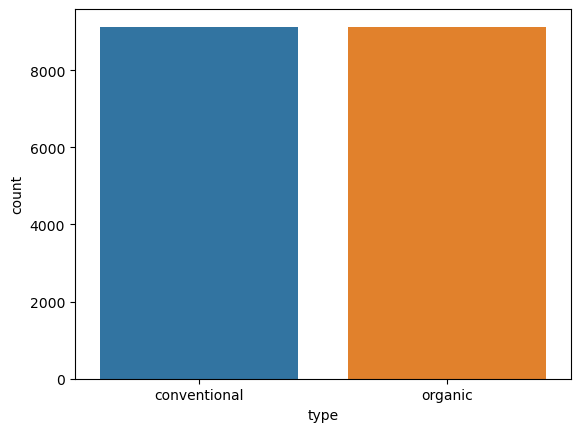

In [23]:
print(data['type'].value_counts())
sns.countplot(x='type',data=data)
plt.show()

in this dataset both are looking equally conventional and organic

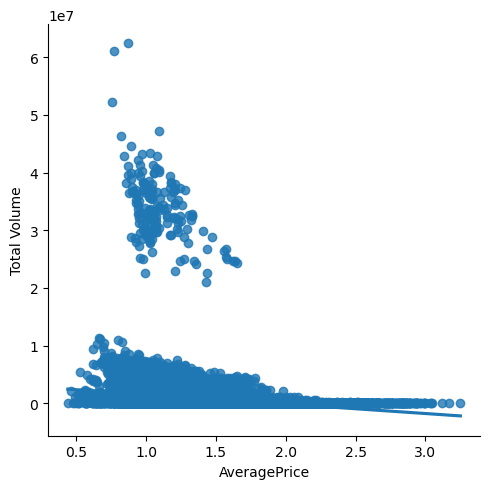

In [24]:
sns.lmplot(x='AveragePrice',y='Total Volume',data=data)
plt.show()

here as we see total volume is  negative correlation with the average price 

In [25]:
data.head()

AveragePrice  Total Volume     4046       4225    4770  \
Date                                                                 
2015-12-27          1.33      64236.62  1036.74   54454.85   48.16   
2015-12-20          1.35      54876.98   674.28   44638.81   58.33   
2015-12-13          0.93     118220.22   794.70  109149.67  130.50   
2015-12-06          1.08      78992.15  1132.00   71976.41   72.58   
2015-11-29          1.28      51039.60   941.48   43838.39   75.78   

            Total Bags  Small Bags  Large Bags  XLarge Bags          type  \
Date                                                                        
2015-12-27     8696.87     8603.62       93.25          0.0  conventional   
2015-12-20     9505.56     9408.07       97.49          0.0  conventional   
2015-12-13     8145.35     8042.21      103.14          0.0  conventional   
2015-12-06     5811.16     5677.40      133.76          0.0  conventional   
2015-11-29     6183.95     5986.26      197.69          0.0  conventional   

            region  
Date                
2015-12-27  Albany  
2015-12-20  Albany  
2015-12-13  Albany  
2015-12-06  Albany  
2015-11-29  Albany

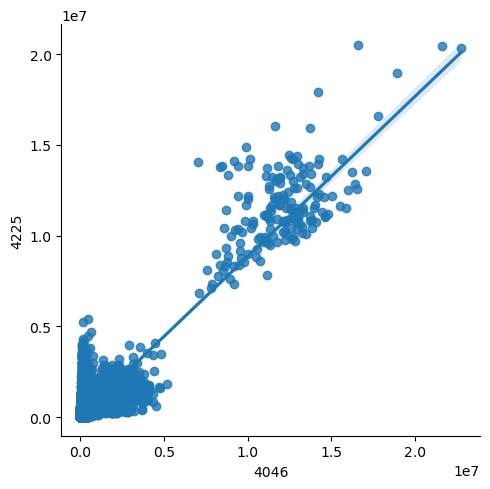

In [26]:
sns.lmplot(x='4046',y='4225',data=data)
plt.show()

here as we see 4225 is  negative correlation with the 4046 

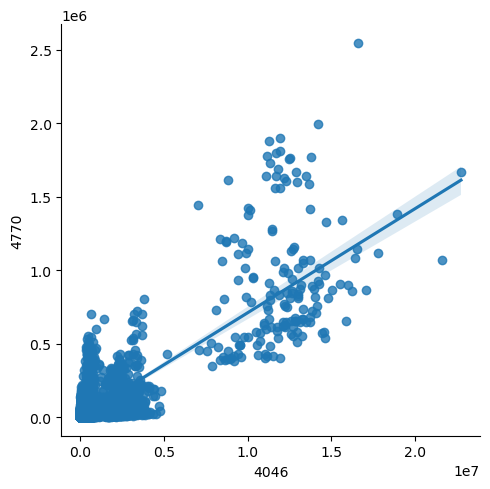

In [27]:
sns.lmplot(x='4046',y='4770',data=data)

here as we see 4770 is  negative correlation with the 4046 

<Axes: xlabel='type', ylabel='AveragePrice'>

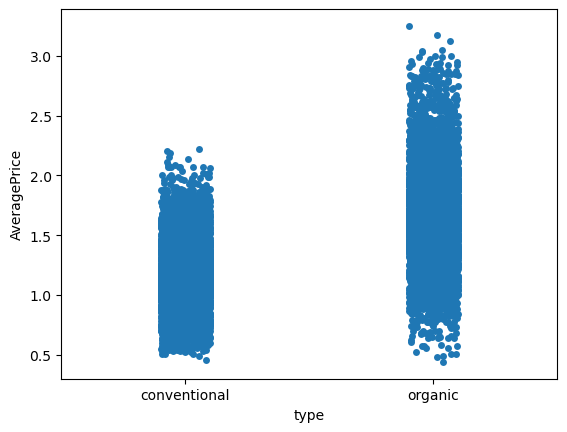

In [28]:
sns.stripplot(x='type',y='AveragePrice',data=data)

as we can see the average price of the organic is bit high than the conventional

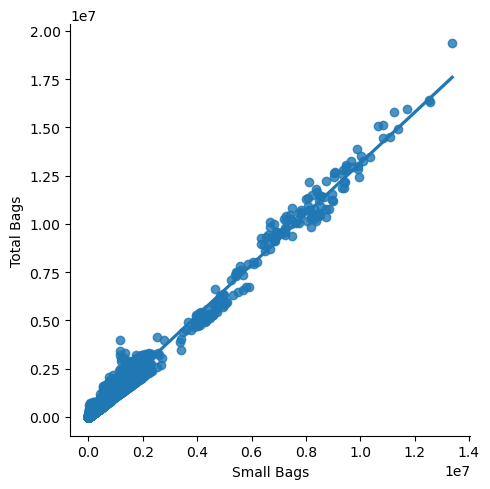

In [29]:
sns.lmplot(x='Small Bags',y='Total Bags',data=data)
plt.show()

here as we see total range is positive correlation with the small bags 

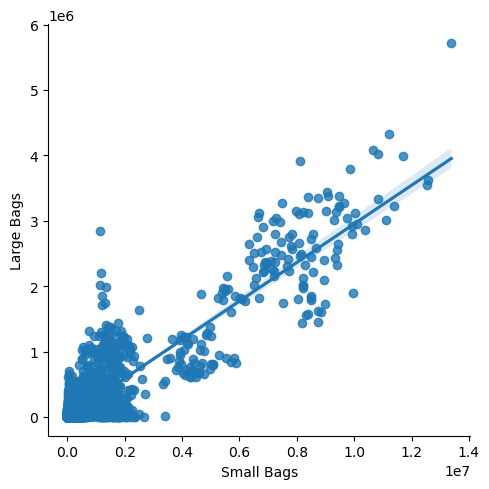

In [30]:
sns.lmplot(x='Small Bags',y='Large Bags',data=data)
plt.show()

here as we see large bags is  negative correlation with the small bags

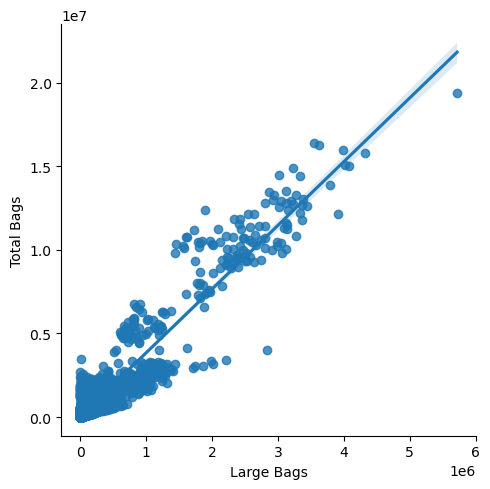

In [31]:
sns.lmplot(x='Large Bags',y='Total Bags',data=data)
plt.show()

here as we see total bags  is  negative correlation with the large bags

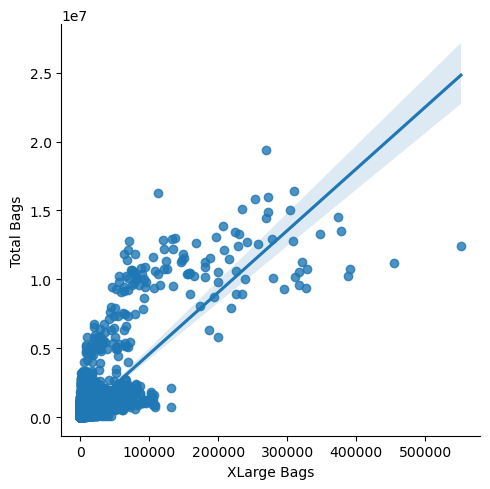

In [32]:
sns.lmplot(x='XLarge Bags',y='Total Bags',data=data)
plt.show()

here as we see total bags is  negative correlation with the XLarge bags  

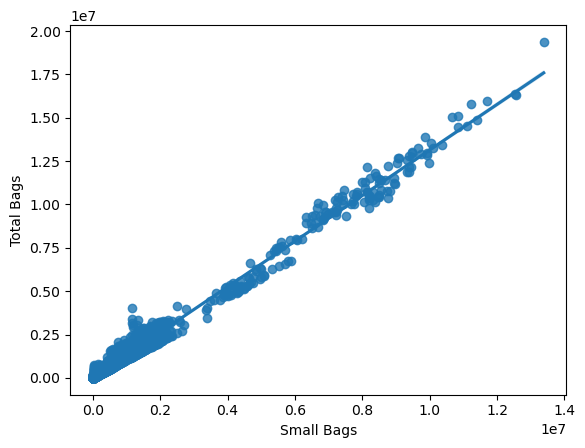

In [33]:
sns.regplot(x='Small Bags',y='Total Bags',data=data)
plt.show()

here as we see total bags  is  positive correlation with the small bags

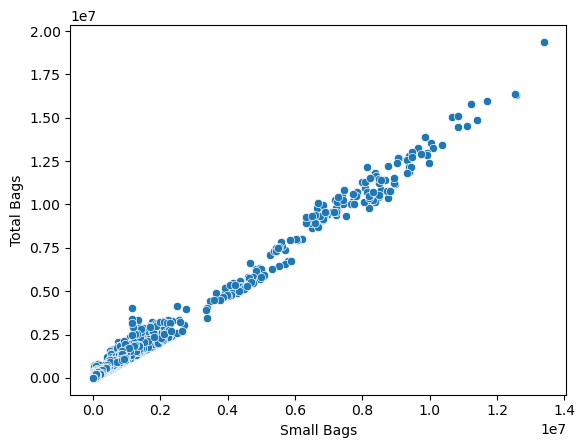

In [34]:
sns.scatterplot(x='Small Bags',y='Total Bags',data=data)
plt.show()

here as we see total bags  is  positive correlation with the small bags

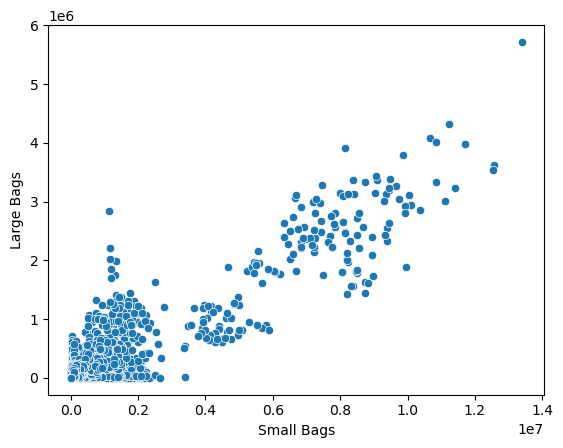

In [35]:
sns.scatterplot(x='Small Bags',y='Large Bags',data=data)
plt.show()

here as we see large bags  is negative correlation with the small bags

In [38]:
data

AveragePrice  Total Volume     4046       4225    4770  \
Date                                                                 
2015-12-27          1.33      64236.62  1036.74   54454.85   48.16   
2015-12-20          1.35      54876.98   674.28   44638.81   58.33   
2015-12-13          0.93     118220.22   794.70  109149.67  130.50   
2015-12-06          1.08      78992.15  1132.00   71976.41   72.58   
2015-11-29          1.28      51039.60   941.48   43838.39   75.78   
...                  ...           ...      ...        ...     ...   
2018-02-04          1.63      17074.83  2046.96    1529.20    0.00   
2018-01-28          1.71      13888.04  1191.70    3431.50    0.00   
2018-01-21          1.87      13766.76  1191.92    2452.79  727.94   
2018-01-14          1.93      16205.22  1527.63    2981.04  727.01   
2018-01-07          1.62      17489.58  2894.77    2356.13  224.53   

            Total Bags  Small Bags  Large Bags  XLarge Bags          type  \
Date                                                                        
2015-12-27     8696.87     8603.62       93.25          0.0  conventional   
2015-12-20     9505.56     9408.07       97.49          0.0  conventional   
2015-12-13     8145.35     8042.21      103.14          0.0  conventional   
2015-12-06     5811.16     5677.40      133.76          0.0  conventional   
2015-11-29     6183.95     5986.26      197.69          0.0  conventional   
...                ...         ...         ...          ...           ...   
2018-02-04    13498.67    13066.82      431.85          0.0       organic   
2018-01-28     9264.84     8940.04      324.80          0.0       organic   
2018-01-21     9394.11     9351.80       42.31          0.0       organic   
2018-01-14    10969.54    10919.54       50.00          0.0       organic   
2018-01-07    12014.15    11988.14       26.01          0.0       organic   

                      region  
Date                          
2015-12-27            Albany  
2015-12-20            Albany  
2015-12-13            Albany  
2015-12-06            Albany  
2015-11-29            Albany  
...                      ...  
2018-02-04  WestTexNewMexico  
2018-01-28  WestTexNewMexico  
2018-01-21  WestTexNewMexico  
2018-01-14  WestTexNewMexico  
2018-01-07  WestTexNewMexico  

[18249 rows x 11 columns]

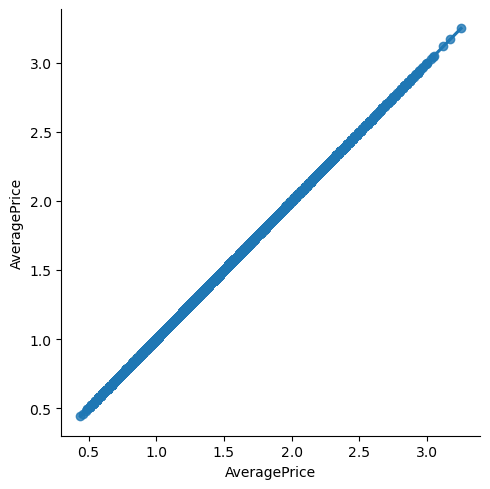

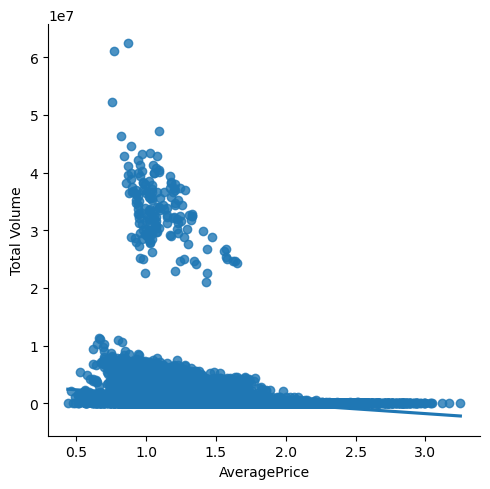

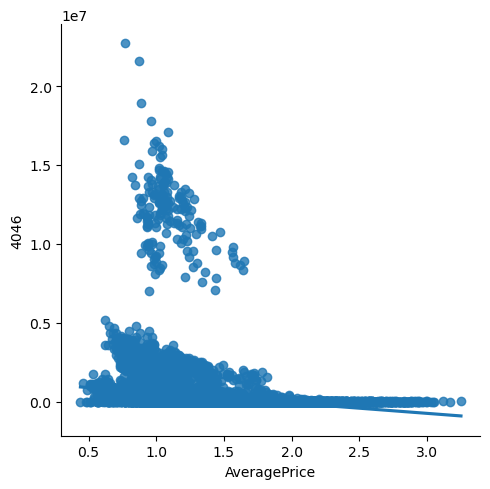

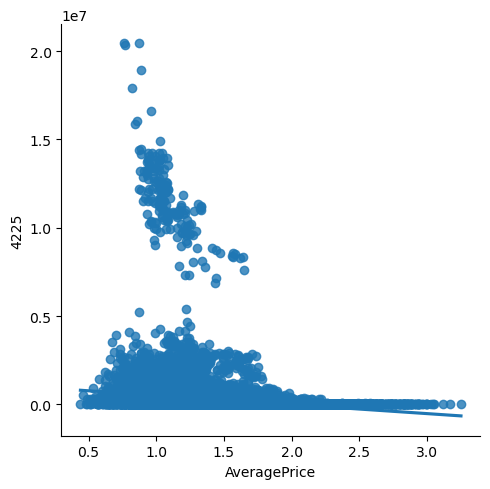

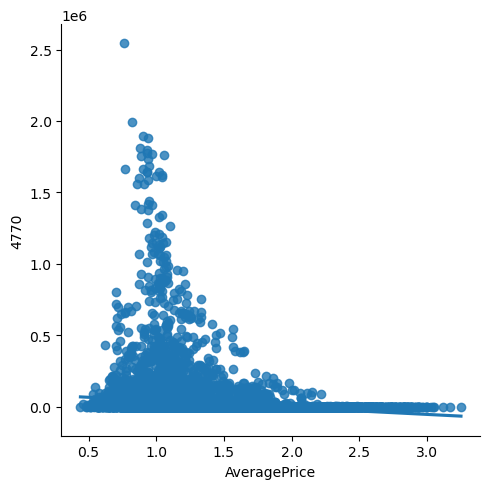

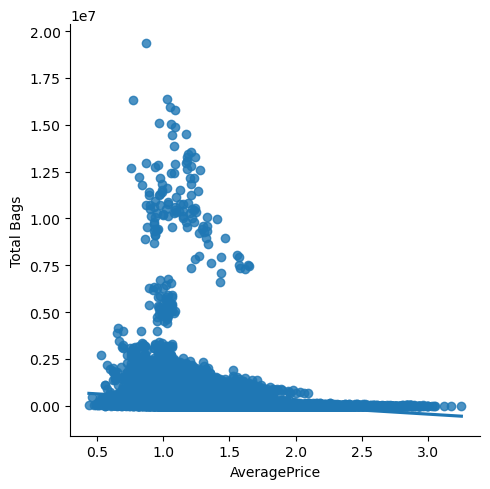

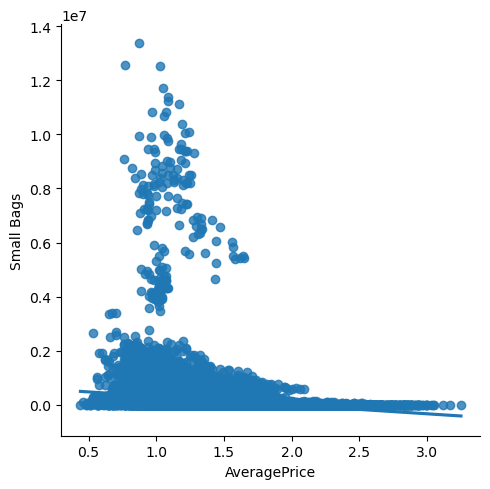

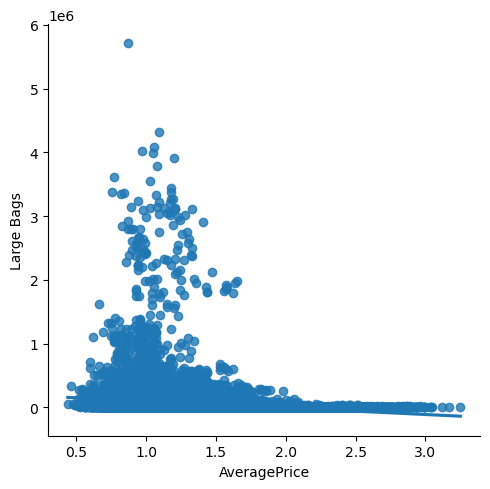

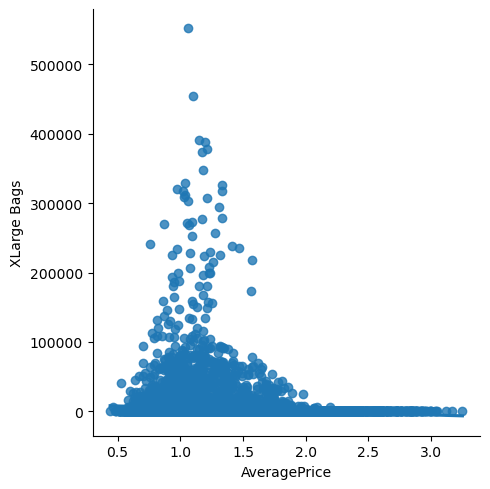

In [39]:
for i in data.columns:
    if data[i].dtypes!='object':
        sns.lmplot(x='AveragePrice',y=i,data=data)
        plt.show()

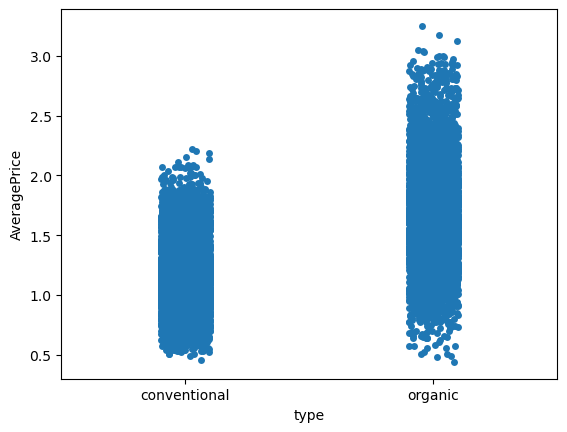

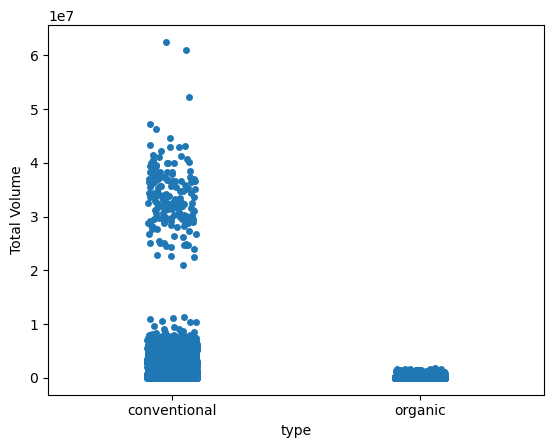

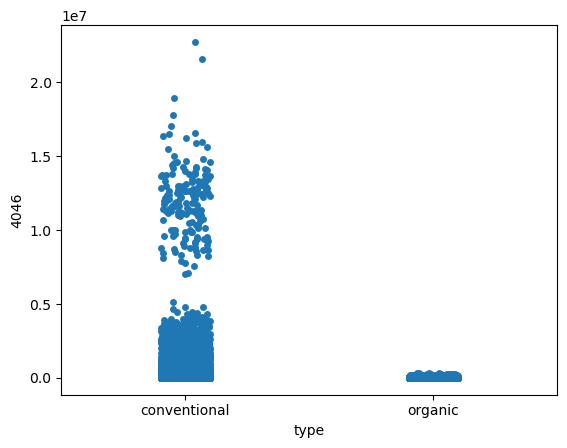

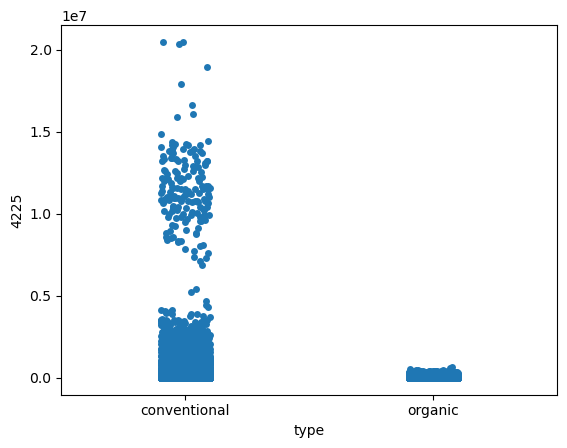

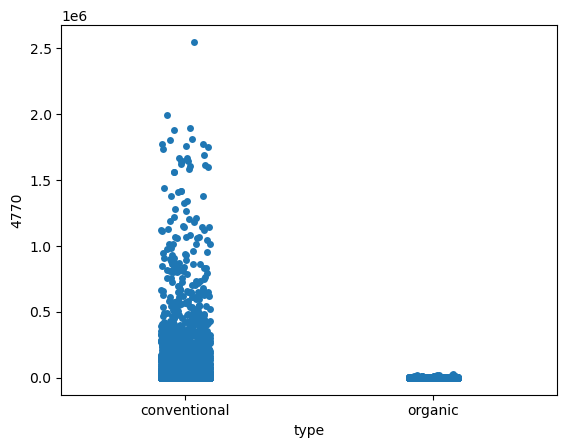

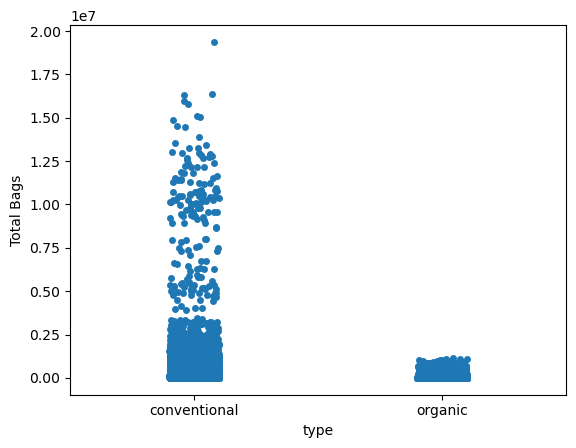

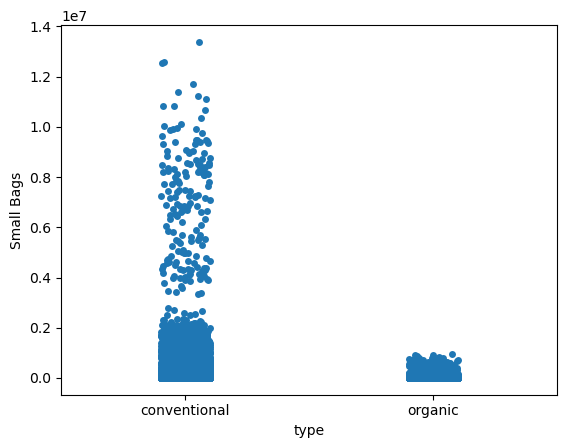

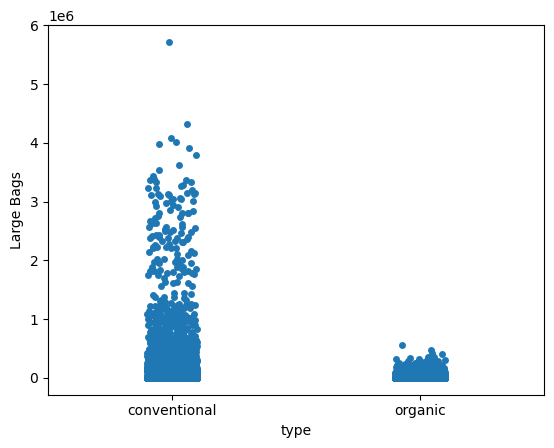

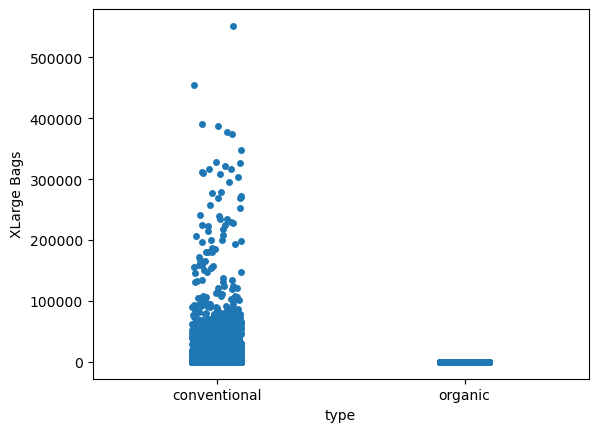

In [40]:
for i in data.columns:
    if data[i].dtypes!='object':
        sns.stripplot(x='type',y=i,data=data)
        plt.show()

In [42]:
data.corr()

AveragePrice  Total Volume      4046      4225      4770  \
AveragePrice      1.000000     -0.192752 -0.208317 -0.172928 -0.179446   
Total Volume     -0.192752      1.000000  0.977863  0.974181  0.872202   
4046             -0.208317      0.977863  1.000000  0.926110  0.833389   
4225             -0.172928      0.974181  0.926110  1.000000  0.887855   
4770             -0.179446      0.872202  0.833389  0.887855  1.000000   
Total Bags       -0.177088      0.963047  0.920057  0.905787  0.792314   
Small Bags       -0.174730      0.967238  0.925280  0.916031  0.802733   
Large Bags       -0.172940      0.880640  0.838645  0.810015  0.698471   
XLarge Bags      -0.117592      0.747157  0.699377  0.688809  0.679861   

              Total Bags  Small Bags  Large Bags  XLarge Bags  
AveragePrice   -0.177088   -0.174730   -0.172940    -0.117592  
Total Volume    0.963047    0.967238    0.880640     0.747157  
4046            0.920057    0.925280    0.838645     0.699377  
4225            0.905787    0.916031    0.810015     0.688809  
4770            0.792314    0.802733    0.698471     0.679861  
Total Bags      1.000000    0.994335    0.943009     0.804233  
Small Bags      0.994335    1.000000    0.902589     0.806845  
Large Bags      0.943009    0.902589    1.000000     0.710858  
XLarge Bags     0.804233    0.806845    0.710858     1.000000

here check the correlation

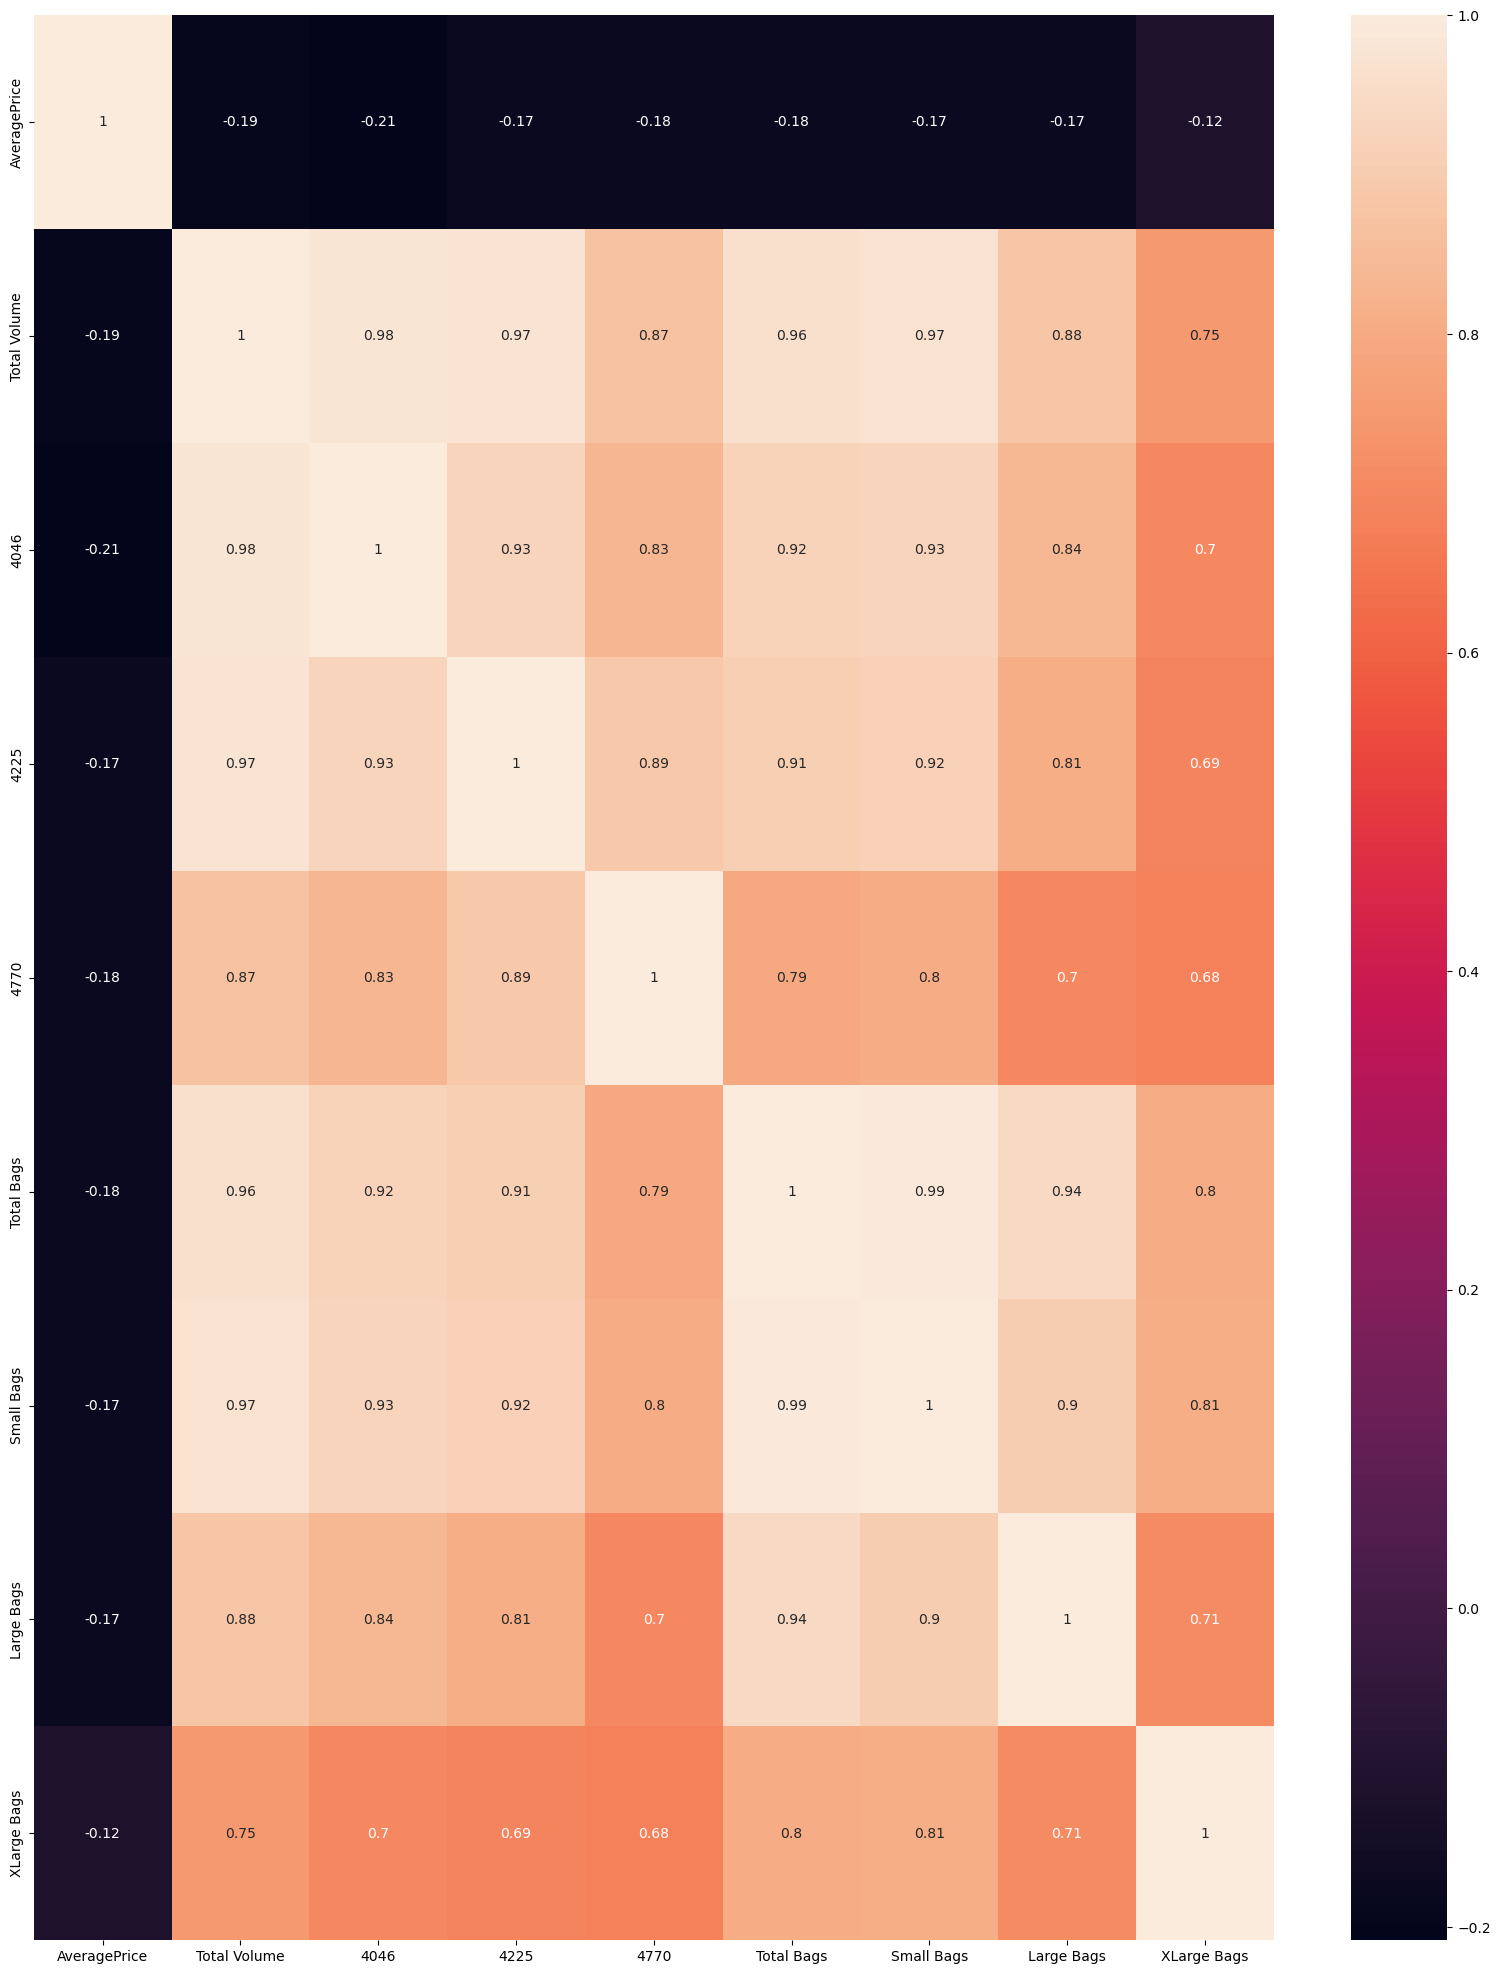

In [43]:
plt.figure(figsize=(20,25))
sns.heatmap(data.corr(),annot=True)
plt.show()

Here check the correlation using heatmap so here highly correleted the data between each other 

In [44]:
data.skew()

AveragePrice     0.580303
Total Volume     9.007687
4046             8.648220
4225             8.942466
4770            10.159396
Total Bags       9.756072
Small Bags       9.540660
Large Bags       9.796455
XLarge Bags     13.139751
dtype: float64

here check the skewness

In [45]:
import scipy.stats as stats
from scipy.stats import zscore

In [46]:
x=data.drop(['AveragePrice','type','region'],axis=1)
y=data['AveragePrice']

In [47]:
z=np.abs(zscore(x))
z

Total Volume      4046      4225      4770  Total Bags  \
Date                                                                 
2015-12-27      0.227716  0.230816  0.199902  0.212091    0.234170   
2015-12-20      0.230427  0.231103  0.208054  0.211997    0.233350   
2015-12-13      0.212085  0.231007  0.154478  0.211325    0.234730   
2015-12-06      0.223444  0.230741  0.185350  0.211864    0.237096   
2015-11-29      0.231538  0.230891  0.208719  0.211834    0.236718   
...                  ...       ...       ...       ...         ...   
2018-02-04      0.241373  0.230017  0.243857  0.212540    0.229301   
2018-01-28      0.242296  0.230693  0.242277  0.212540    0.233594   
2018-01-21      0.242331  0.230693  0.243090  0.205766    0.233463   
2018-01-14      0.241625  0.230428  0.242651  0.205774    0.231866   
2018-01-07      0.241253  0.229347  0.243170  0.210450    0.230807   

            Small Bags  Large Bags  XLarge Bags  
Date                                             
2015-12-27    0.232647    0.222352      0.17558  
2015-12-20    0.231568    0.222335      0.17558  
2015-12-13    0.233399    0.222311      0.17558  
2015-12-06    0.236568    0.222186      0.17558  
2015-11-29    0.236154    0.221924      0.17558  
...                ...         ...          ...  
2018-02-04    0.226665    0.220964      0.17558  
2018-01-28    0.232196    0.221403      0.17558  
2018-01-21    0.231644    0.222561      0.17558  
2018-01-14    0.229543    0.222529      0.17558  
2018-01-07    0.228111    0.222628      0.17558  

[18249 rows x 8 columns]

remove the outliers using z score 

In [48]:
data

AveragePrice  Total Volume     4046       4225    4770  \
Date                                                                 
2015-12-27          1.33      64236.62  1036.74   54454.85   48.16   
2015-12-20          1.35      54876.98   674.28   44638.81   58.33   
2015-12-13          0.93     118220.22   794.70  109149.67  130.50   
2015-12-06          1.08      78992.15  1132.00   71976.41   72.58   
2015-11-29          1.28      51039.60   941.48   43838.39   75.78   
...                  ...           ...      ...        ...     ...   
2018-02-04          1.63      17074.83  2046.96    1529.20    0.00   
2018-01-28          1.71      13888.04  1191.70    3431.50    0.00   
2018-01-21          1.87      13766.76  1191.92    2452.79  727.94   
2018-01-14          1.93      16205.22  1527.63    2981.04  727.01   
2018-01-07          1.62      17489.58  2894.77    2356.13  224.53   

            Total Bags  Small Bags  Large Bags  XLarge Bags          type  \
Date                                                                        
2015-12-27     8696.87     8603.62       93.25          0.0  conventional   
2015-12-20     9505.56     9408.07       97.49          0.0  conventional   
2015-12-13     8145.35     8042.21      103.14          0.0  conventional   
2015-12-06     5811.16     5677.40      133.76          0.0  conventional   
2015-11-29     6183.95     5986.26      197.69          0.0  conventional   
...                ...         ...         ...          ...           ...   
2018-02-04    13498.67    13066.82      431.85          0.0       organic   
2018-01-28     9264.84     8940.04      324.80          0.0       organic   
2018-01-21     9394.11     9351.80       42.31          0.0       organic   
2018-01-14    10969.54    10919.54       50.00          0.0       organic   
2018-01-07    12014.15    11988.14       26.01          0.0       organic   

                      region  
Date                          
2015-12-27            Albany  
2015-12-20            Albany  
2015-12-13            Albany  
2015-12-06            Albany  
2015-11-29            Albany  
...                      ...  
2018-02-04  WestTexNewMexico  
2018-01-28  WestTexNewMexico  
2018-01-21  WestTexNewMexico  
2018-01-14  WestTexNewMexico  
2018-01-07  WestTexNewMexico  

[18249 rows x 11 columns]

In [49]:
np.where(z>3)

(array([ 346,  359,  780, ..., 9111, 9112, 9113], dtype=int64),
 array([1, 1, 7, ..., 6, 6, 6], dtype=int64))

In [50]:
data=data[(z<3).all(axis=1)]

In [51]:
data.skew()

AveragePrice    0.560969
Total Volume    3.782060
4046            4.928850
4225            4.472729
4770            5.137120
Total Bags      4.082103
Small Bags      4.238647
Large Bags      5.072468
XLarge Bags     6.159391
dtype: float64

In [52]:
from sklearn.preprocessing import LabelEncoder

In [53]:
lb=LabelEncoder()
data['type']=lb.fit_transform(data['type'].values.reshape(-1,1))
data['region']=lb.fit_transform(data['region'].values.reshape(-1,1))

In [54]:
data

AveragePrice  Total Volume     4046       4225    4770  \
Date                                                                 
2015-12-27          1.33      64236.62  1036.74   54454.85   48.16   
2015-12-20          1.35      54876.98   674.28   44638.81   58.33   
2015-12-13          0.93     118220.22   794.70  109149.67  130.50   
2015-12-06          1.08      78992.15  1132.00   71976.41   72.58   
2015-11-29          1.28      51039.60   941.48   43838.39   75.78   
...                  ...           ...      ...        ...     ...   
2018-02-04          1.63      17074.83  2046.96    1529.20    0.00   
2018-01-28          1.71      13888.04  1191.70    3431.50    0.00   
2018-01-21          1.87      13766.76  1191.92    2452.79  727.94   
2018-01-14          1.93      16205.22  1527.63    2981.04  727.01   
2018-01-07          1.62      17489.58  2894.77    2356.13  224.53   

            Total Bags  Small Bags  Large Bags  XLarge Bags  type  region  
Date                                                                       
2015-12-27     8696.87     8603.62       93.25          0.0     0       0  
2015-12-20     9505.56     9408.07       97.49          0.0     0       0  
2015-12-13     8145.35     8042.21      103.14          0.0     0       0  
2015-12-06     5811.16     5677.40      133.76          0.0     0       0  
2015-11-29     6183.95     5986.26      197.69          0.0     0       0  
...                ...         ...         ...          ...   ...     ...  
2018-02-04    13498.67    13066.82      431.85          0.0     1      53  
2018-01-28     9264.84     8940.04      324.80          0.0     1      53  
2018-01-21     9394.11     9351.80       42.31          0.0     1      53  
2018-01-14    10969.54    10919.54       50.00          0.0     1      53  
2018-01-07    12014.15    11988.14       26.01          0.0     1      53  

[17782 rows x 11 columns]

Encoded the data using Label Encoder

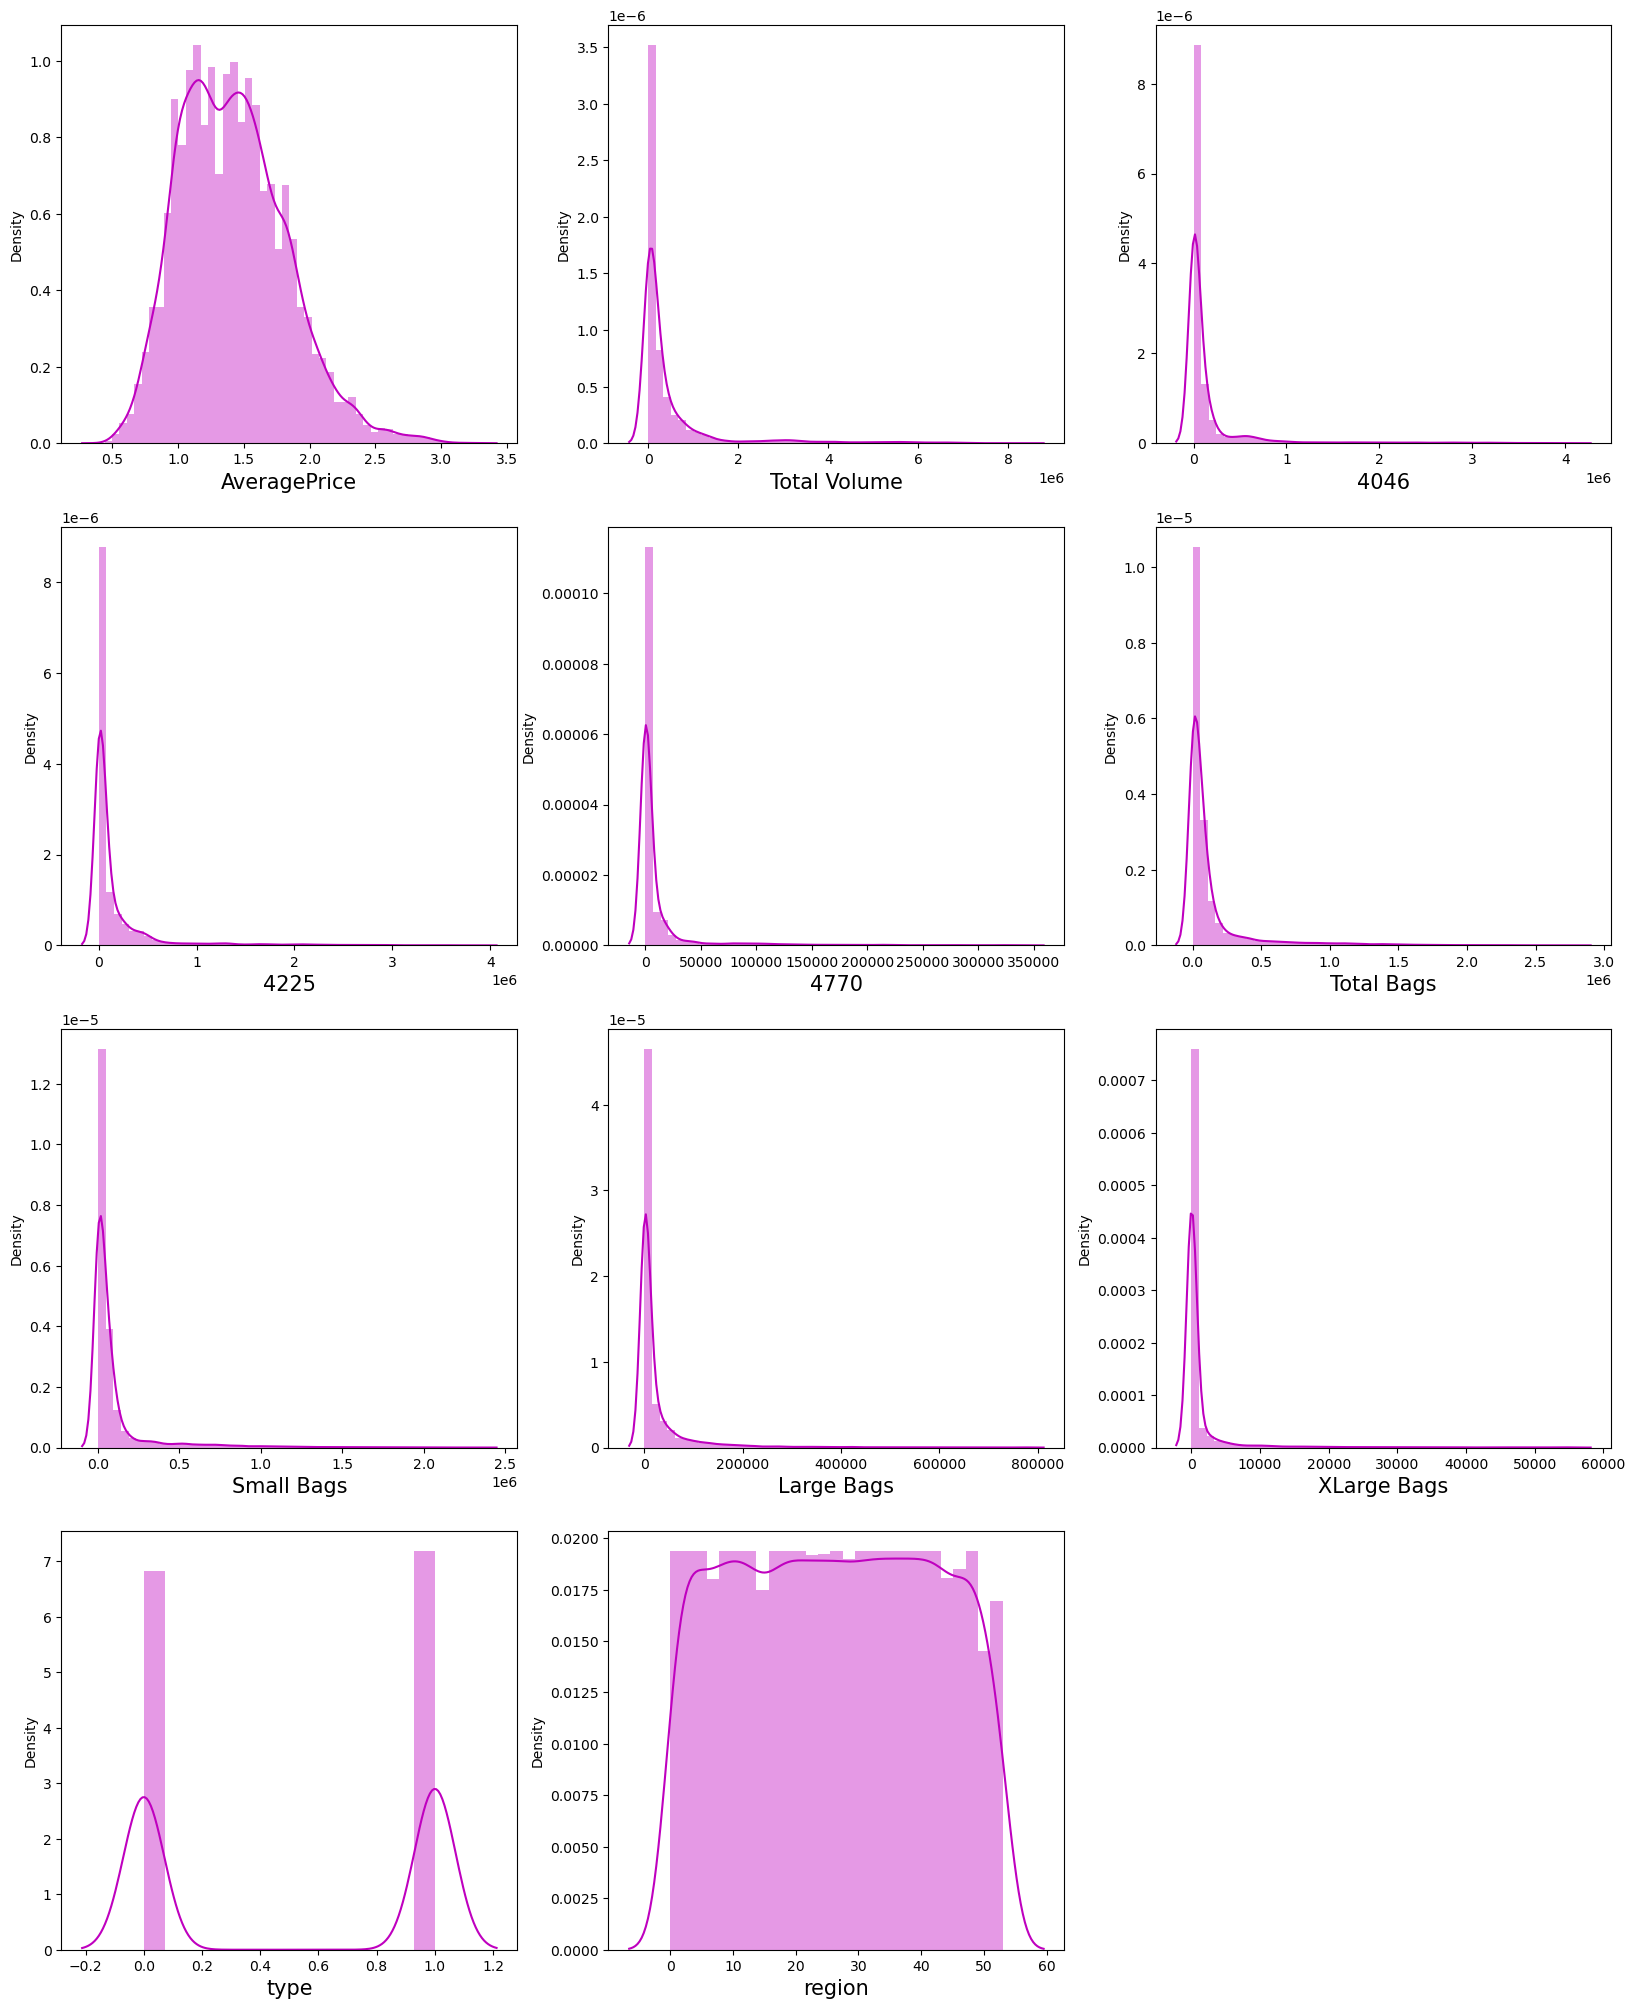

In [55]:
plt.figure(figsize=(20,25), facecolor='white')
plotnumber=1
for col in data:
    if plotnumber<=14:
        ax=plt.subplot(4,3,plotnumber)
        sns.distplot(data[col], color="m")
        plt.xlabel(col, fontsize=15)
    plotnumber+=1
plt.show()

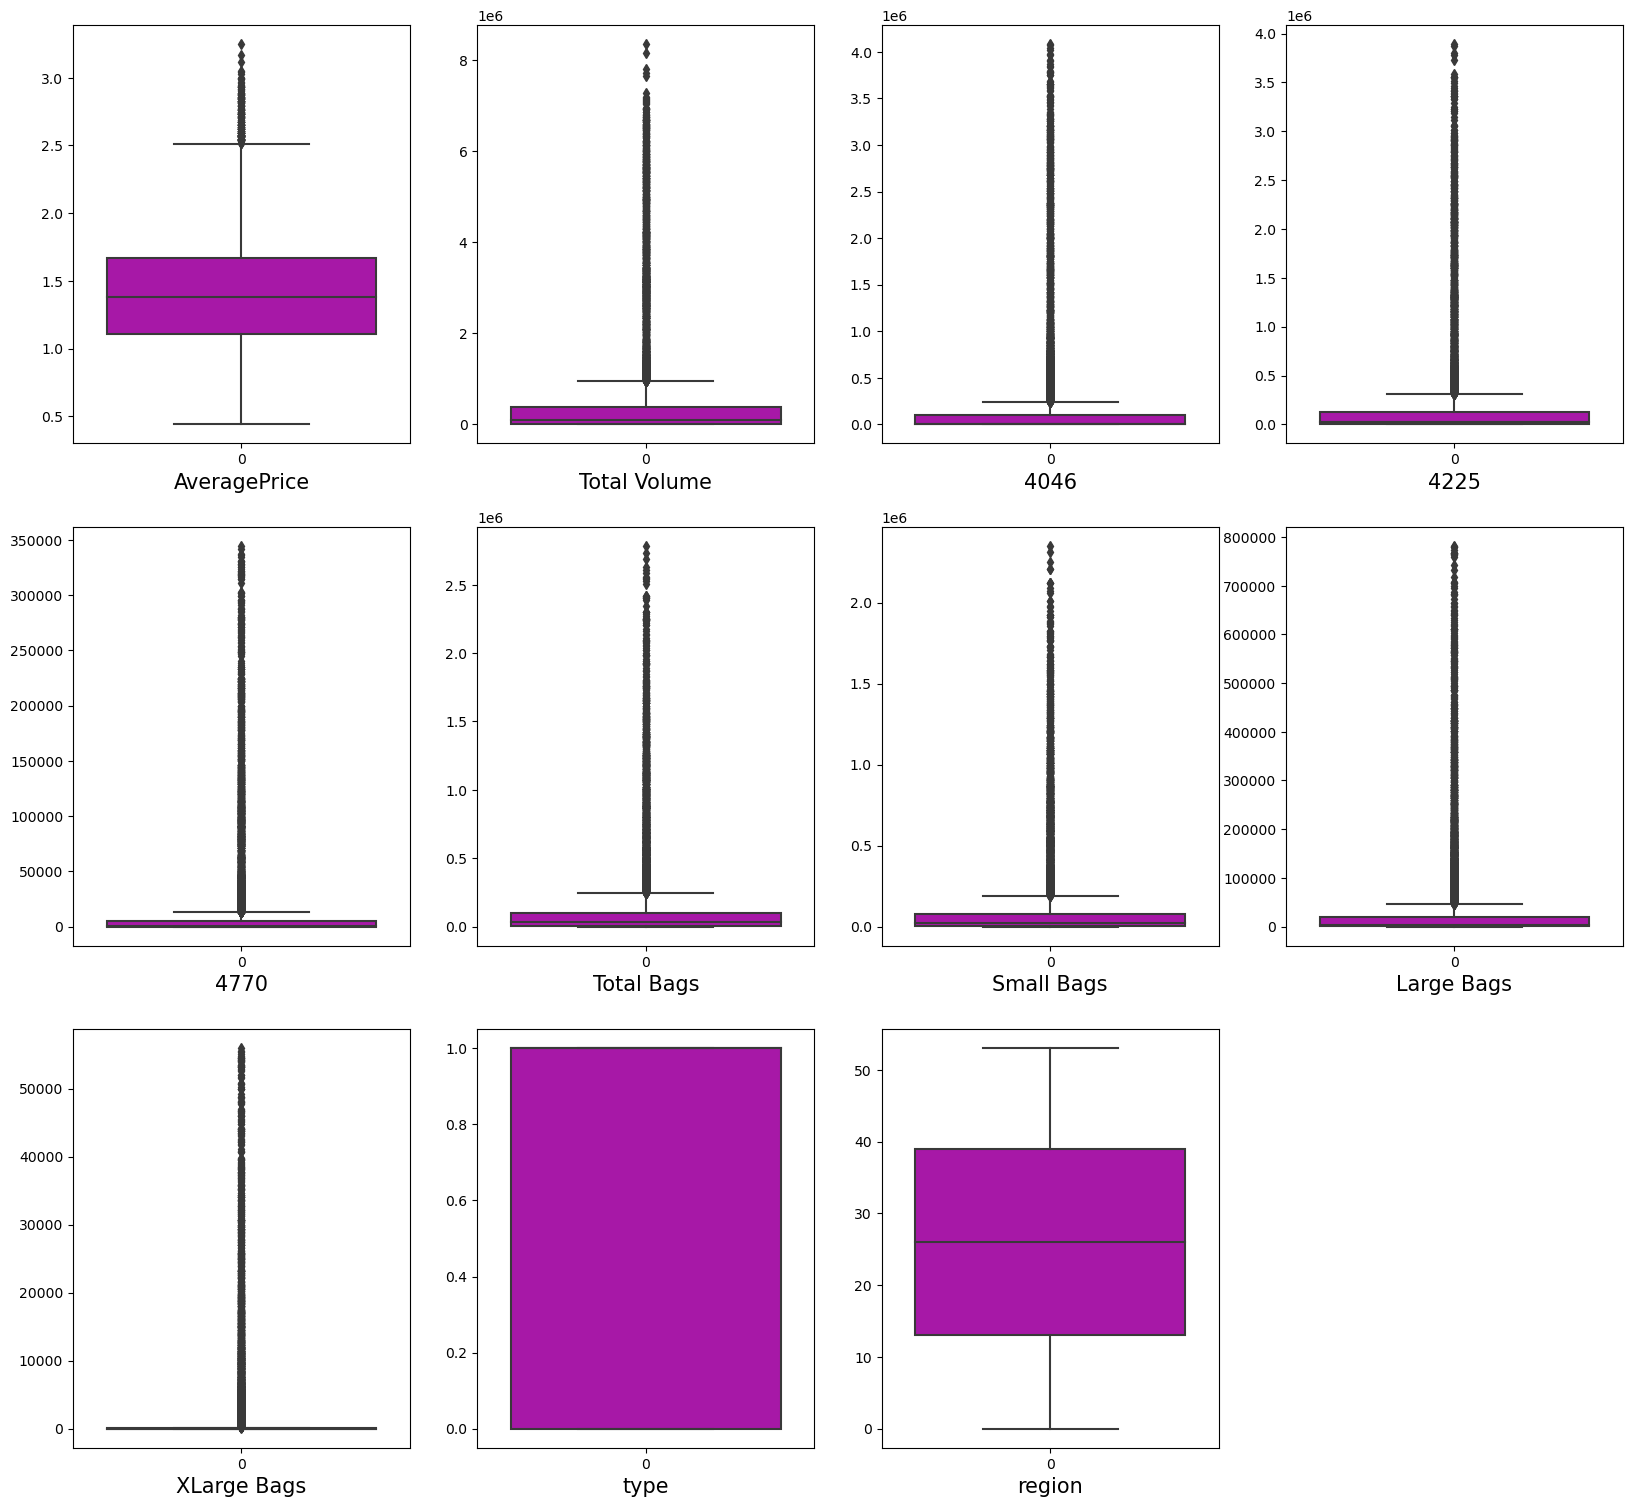

In [56]:
plt.figure(figsize=(20,25), facecolor='white')
plotnumber=1
for col in data:
    if plotnumber<=14:
        ax=plt.subplot(4,4,plotnumber)
        sns.boxplot(data[col], color="m")
        plt.xlabel(col, fontsize=15)
    plotnumber+=1
plt.show()

here check the skewness using boxplot some of the columns very skewed in this dataset 

In [57]:
data.shape

(17782, 11)

In [58]:
data.skew()

AveragePrice    0.560969
Total Volume    3.782060
4046            4.928850
4225            4.472729
4770            5.137120
Total Bags      4.082103
Small Bags      4.238647
Large Bags      5.072468
XLarge Bags     6.159391
type           -0.052210
region          0.005773
dtype: float64

In [59]:
data['Total Volume']=np.sqrt(data['Total Volume'])
data['4046']=np.sqrt(data['4046'])
data['4225']=np.sqrt(data['4225'])
data['4770']=np.sqrt(data['4770'])
data['Total Bags']=np.sqrt(data['Total Bags'])
data['Small Bags']=np.sqrt(data['Small Bags'])
data['Large Bags']=np.sqrt(data['Large Bags'])
data['XLarge Bags']=np.sqrt(data['XLarge Bags'])

remove the skewness using np.sqrt

In [60]:
data.skew()

AveragePrice    0.560969
Total Volume    1.972539
4046            2.507960
4225            2.138625
4770            2.648191
Total Bags      2.017875
Small Bags      2.100896
Large Bags      2.245866
XLarge Bags     3.327055
type           -0.052210
region          0.005773
dtype: float64

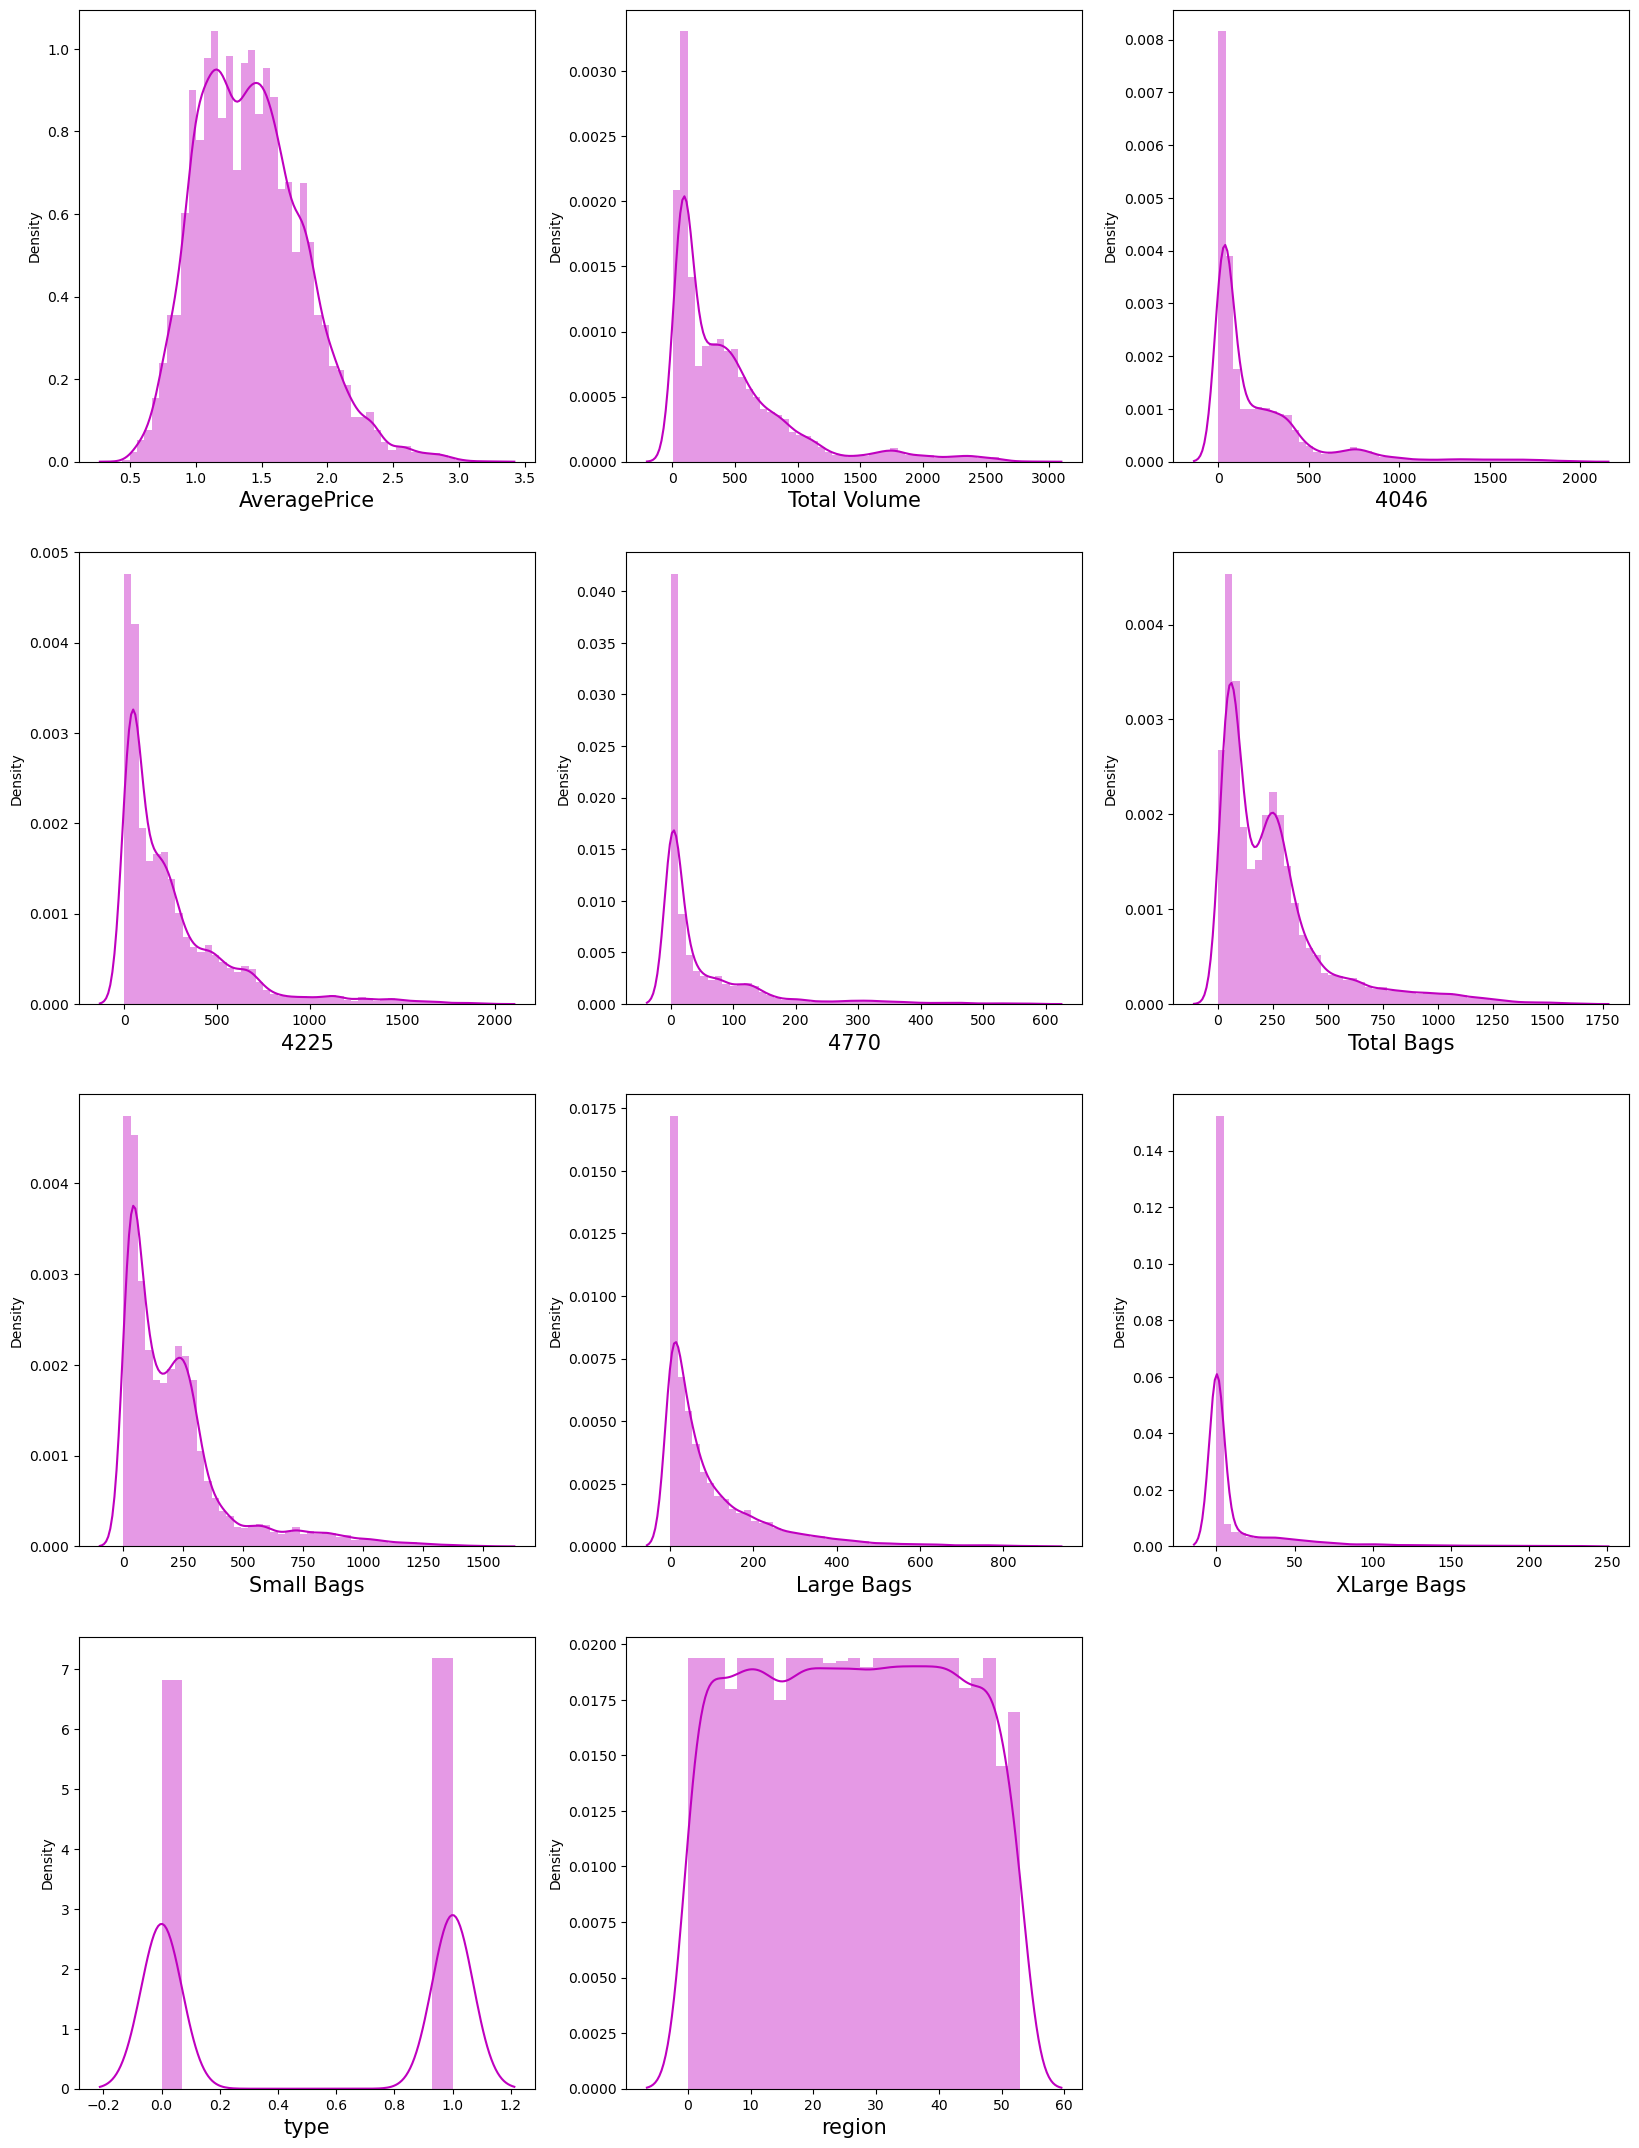

In [61]:
plt.figure(figsize=(20,27), facecolor='white')
plotnumber=1
for col in data:
    if plotnumber<=14:
        ax=plt.subplot(4,3,plotnumber)
        sns.distplot(data[col], color="m")
        plt.xlabel(col, fontsize=15)
    plotnumber+=1
plt.show()

In [62]:
x=data.drop("AveragePrice", axis=1)
y=data["AveragePrice"]

split the target and features veriable

In [63]:
x

Total Volume       4046        4225       4770  Total Bags  \
Date                                                                     
2015-12-27    253.449443  32.198447  233.355630   6.939741   93.257010   
2015-12-20    234.258362  25.966902  211.278986   7.637408   97.496461   
2015-12-13    343.831674  28.190424  330.378071  11.423660   90.251593   
2015-12-06    281.055422  33.645208  268.284196   8.519390   76.230965   
2015-11-29    225.919455  30.683546  209.376193   8.705171   78.638095   
...                  ...        ...         ...        ...         ...   
2018-02-04    130.670693  45.243342   39.104987   0.000000  116.183777   
2018-01-28    117.847529  34.521008   58.579006   0.000000   96.254039   
2018-01-21    117.331837  34.524194   49.525650  26.980363   96.923217   
2018-01-14    127.299725  39.084908   54.598901  26.963123  104.735572   
2018-01-07    132.248176  53.803067   48.539984  14.984325  109.609078   

            Small Bags  Large Bags  XLarge Bags  type  region  
Date                                                           
2015-12-27   92.755701    9.656604          0.0     0       0  
2015-12-20   96.995206    9.873702          0.0     0       0  
2015-12-13   89.678370   10.155787          0.0     0       0  
2015-12-06   75.348524   11.565466          0.0     0       0  
2015-11-29   77.370925   14.060228          0.0     0       0  
...                ...         ...          ...   ...     ...  
2018-02-04  114.310192   20.781001          0.0     1      53  
2018-01-28   94.551785   18.022209          0.0     1      53  
2018-01-21   96.704705    6.504614          0.0     1      53  
2018-01-14  104.496603    7.071068          0.0     1      53  
2018-01-07  109.490365    5.100000          0.0     1      53  

[17782 rows x 10 columns]

In [64]:
y

Date
2015-12-27    1.33
2015-12-20    1.35
2015-12-13    0.93
2015-12-06    1.08
2015-11-29    1.28
              ... 
2018-02-04    1.63
2018-01-28    1.71
2018-01-21    1.87
2018-01-14    1.93
2018-01-07    1.62
Name: AveragePrice, Length: 17782, dtype: float64

In [65]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x=pd.DataFrame(scaler.fit_transform(x),columns=x.columns)

In [66]:
x

Total Volume      4046      4225      4770  Total Bags  Small Bags  \
0         -0.421739 -0.609619 -0.099036 -0.516709   -0.620450   -0.533996   
1         -0.460551 -0.629129 -0.170735 -0.509001   -0.603874   -0.515625   
2         -0.238947 -0.622167  0.216066 -0.467173   -0.632201   -0.547332   
3         -0.365908 -0.605090  0.014402 -0.499257   -0.687020   -0.609429   
4         -0.477416 -0.614362 -0.176914 -0.497205   -0.677608   -0.600665   
...             ...       ...       ...       ...         ...         ...   
17777     -0.670049 -0.568779 -0.729908 -0.593375   -0.530809   -0.440592   
17778     -0.695983 -0.602348 -0.666662 -0.593375   -0.608732   -0.526213   
17779     -0.697026 -0.602338 -0.696065 -0.295311   -0.606115   -0.516884   
17780     -0.676867 -0.588060 -0.679588 -0.295501   -0.575570   -0.483119   
17781     -0.666859 -0.541981 -0.699266 -0.427836   -0.556515   -0.461479   

       Large Bags  XLarge Bags      type    region  
0       -0.683724    -0.423476 -1.026443 -1.698613  
1       -0.682087    -0.423476 -1.026443 -1.698613  
2       -0.679959    -0.423476 -1.026443 -1.698613  
3       -0.669327    -0.423476 -1.026443 -1.698613  
4       -0.650511    -0.423476 -1.026443 -1.698613  
...           ...          ...       ...       ...  
17777   -0.599821    -0.423476  0.974238  1.742552  
17778   -0.620628    -0.423476  0.974238  1.742552  
17779   -0.707497    -0.423476  0.974238  1.742552  
17780   -0.703225    -0.423476  0.974238  1.742552  
17781   -0.718091    -0.423476  0.974238  1.742552  

[17782 rows x 10 columns]

Feature scaling the data using Standard Scalarization

In [67]:
y

Date
2015-12-27    1.33
2015-12-20    1.35
2015-12-13    0.93
2015-12-06    1.08
2015-11-29    1.28
              ... 
2018-02-04    1.63
2018-01-28    1.71
2018-01-21    1.87
2018-01-14    1.93
2018-01-07    1.62
Name: AveragePrice, Length: 17782, dtype: float64

In [68]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif["VIF values"] = [variance_inflation_factor(x.values, i) for i in range (len(x.columns))]
vif["features"] = x.columns

vif

VIF values      features
0  386.805438  Total Volume
1   51.847270          4046
2   74.277349          4225
3    2.822914          4770
4  264.521298    Total Bags
5  150.101928    Small Bags
6   18.757261    Large Bags
7    1.962008   XLarge Bags
8    1.753836          type
9    1.100166        region

check the variance inflation factor some columns are highly co releted to the other columns

In [69]:
x.drop('Total Volume', axis=1, inplace=True)
x.drop('Total Bags', axis=1, inplace=True)

remove the columns who has highly coreleted with the other columns

In [70]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif["VIF values"] = [variance_inflation_factor(x.values, i) for i in range (len(x.columns))]
vif["features"] = x.columns

vif

VIF values     features
0    3.404157         4046
1    4.958126         4225
2    2.730319         4770
3    6.193674   Small Bags
4    1.999092   Large Bags
5    1.866712  XLarge Bags
6    1.715444         type
7    1.083588       region

now it looks perfect

In [71]:
# importing the necessary libraries
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import LinearRegression

Finding the best random state

In [72]:
maxAccu=0
maxRS=0
for i in range(1,200):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=i)
    
    lr=LinearRegression()
    lr.fit(x_train, y_train)
    
    pred=lr.predict(x_test)
    acc=r2_score(y_test,pred)
    
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print("Maximum r2 score is ",maxAccu,"on random state ",maxRS)

Maximum r2 score is  0.45001201066265417 on random state  140


Maximum r2 score is  0.45001201066265417 on random state  140 using LinearRegression

Creating the train test split

In [73]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=maxRS)

# Regression Model

In [74]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor as KNN
from sklearn.linear_model import Lasso,Ridge
from sklearn.svm import SVR
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.model_selection import GridSearchCV

# LinearRegression

In [75]:
LR = LinearRegression()
LR.fit(x_train, y_train)
pred_LR = LR.predict(x_test)
pred_train = LR.predict(x_train)
print(LR)
print('R2_score:', r2_score(y_test, pred_LR))
print('R2_score on training data:', r2_score(y_train, pred_train)*100)
print('Mean Squared Error:', mean_squared_error(y_test, pred_LR))
print('Mean Absolute Error:', mean_absolute_error(y_test, pred_LR))
print('Root Mean Squared Error:',np.sqrt(mean_squared_error(y_test,pred_LR)))

LinearRegression()
R2_score: 0.45001201066265417
R2_score on training data: 41.9442108434278
Mean Squared Error: 0.09005268170224787
Mean Absolute Error: 0.23040284143958967
Root Mean Squared Error: 0.30008778999194197


The accurracy for this model is 45 % score using linearRegression

# RandomForestRegressor

In [76]:
RFR = RandomForestRegressor()
RFR.fit(x_train, y_train)
pred_RFR = RFR.predict(x_test)
pred_train = RFR.predict(x_train)
print(RFR)
print('R2_score:', r2_score(y_test, pred_RFR))
print('R2_score on training data:', r2_score(y_train, pred_train)*100)
print('Mean Squared Error:', mean_squared_error(y_test, pred_RFR))
print('Mean Absolute Error:', mean_absolute_error(y_test, pred_RFR))
print('Root Mean Squared Error:',np.sqrt(mean_squared_error(y_test,pred_RFR)))

RandomForestRegressor()
R2_score: 0.805466963715421
R2_score on training data: 97.27545885202322
Mean Squared Error: 0.0318520075651359
Mean Absolute Error: 0.12371981255857545
Root Mean Squared Error: 0.1784713074001978


The accurracy for this model is 80 % score using RandomForestRegressor

# DecisionTreeRegressor

In [77]:
DT = DecisionTreeRegressor()
DT.fit(x_train, y_train)
pred_DT = DT.predict(x_test)
pred_train = DT.predict(x_train)
print(DT)
print('R2_score:', r2_score(y_test, pred_DT))
print('R2_score on training data:', r2_score(y_train, pred_train)*100)
print('Mean Squared Error:', mean_squared_error(y_test, pred_DT))
print('Mean Absolute Error:', mean_absolute_error(y_test, pred_DT))
print('Root Mean Squared Error:',np.sqrt(mean_squared_error(y_test,pred_DT)))

DecisionTreeRegressor()
R2_score: 0.6305485016164215
R2_score on training data: 100.0
Mean Squared Error: 0.060492408622305524
Mean Absolute Error: 0.1622717900656045
Root Mean Squared Error: 0.24595204537125834


The accurracy for this model is 63 % score using DecisionTreeRegressor

# KNN

In [78]:
KNN = KNN()
KNN.fit(x_train, y_train)
pred_KNN = KNN.predict(x_test)
pred_train = KNN.predict(x_train)
print(KNN)
print('R2_score:', r2_score(y_test, pred_KNN))
print('R2_score on training data:', r2_score(y_train, pred_train)*100)
print('Mean Squared Error:', mean_squared_error(y_test, pred_KNN))
print('Mean Absolute Error:', mean_absolute_error(y_test, pred_KNN))
print('Root Mean Squared Error:',np.sqrt(mean_squared_error(y_test,pred_KNN)))

KNeighborsRegressor()
R2_score: 0.805554645137077
R2_score on training data: 87.65870703699383
Mean Squared Error: 0.03183765098406748
Mean Absolute Error: 0.12252858481724462
Root Mean Squared Error: 0.17843108188896767


The accurracy for this model is 80 % score using KNN

# Lasso

In [79]:
LS = Lasso()
LS.fit(x_train, y_train)
pred_LS = LS.predict(x_test)
pred_train = LS.predict(x_train)
print(LS)
print('R2_score:', r2_score(y_test, pred_LS))
print('R2_score on training data:', r2_score(y_train, pred_train)*100)
print('Mean Squared Error:', mean_squared_error(y_test, pred_LS))
print('Mean Absolute Error:', mean_absolute_error(y_test, pred_LS))
print('Root Mean Squared Error:',np.sqrt(mean_squared_error(y_test,pred_LS)))

Lasso()
R2_score: -2.386653099595293e-07
R2_score on training data: 0.0
Mean Squared Error: 0.16373576321766453
Mean Absolute Error: 0.3286525139129741
Root Mean Squared Error: 0.40464275999659816


The accurracy for this model is -2.38 % score using Lasso

# Ridge

In [80]:
RD = Ridge()
RD.fit(x_train, y_train)
pred_RD = RD.predict(x_test)
pred_train = RD.predict(x_train)
print(RD)
print('R2_score:', r2_score(y_test, pred_RD))
print('R2_score on training data:', r2_score(y_train, pred_train)*100)
print('Mean Squared Error:', mean_squared_error(y_test, pred_RD))
print('Mean Absolute Error:', mean_absolute_error(y_test, pred_RD))
print('Root Mean Squared Error:',np.sqrt(mean_squared_error(y_test,pred_RD)))

Ridge()
R2_score: 0.4500097734466849
R2_score on training data: 41.94421014461104
Mean Squared Error: 0.09005304801442465
Mean Absolute Error: 0.23040325201318457
Root Mean Squared Error: 0.30008840033300965


The accurracy for this model is 45 % score using Ridge

# SVR

In [81]:
svr = SVR()
svr.fit(x_train, y_train)
pred_svr = svr.predict(x_test)
pred_train = svr.predict(x_train)
print(svr)
print('R2_score:', r2_score(y_test, pred_svr))
print('R2_score on training data:', r2_score(y_train, pred_train)*100)
print('Mean Squared Error:', mean_squared_error(y_test, pred_svr))
print('Mean Absolute Error:', mean_absolute_error(y_test, pred_svr))
print('Root Mean Squared Error:',np.sqrt(mean_squared_error(y_test,pred_svr)))

SVR()
R2_score: 0.6093941771230504
R2_score on training data: 61.29332320451159
Mean Squared Error: 0.0639561272619123
Mean Absolute Error: 0.18385379761735632
Root Mean Squared Error: 0.2528954868357921


The accurracy for this model is 60 % score using SVR

# ExtraTreesRegressor

In [82]:
ETR = ExtraTreesRegressor()
ETR.fit(x_train, y_train)
pred_ETR = ETR.predict(x_test)
pred_train = ETR.predict(x_train)
print(ETR)
print('R2_score:', r2_score(y_test, pred_ETR))
print('R2_score on training data:', r2_score(y_train, pred_train)*100)
print('Mean Squared Error:', mean_squared_error(y_test, pred_ETR))
print('Mean Absolute Error:', mean_absolute_error(y_test, pred_ETR))
print('Root Mean Squared Error:',np.sqrt(mean_squared_error(y_test,pred_ETR)))

ExtraTreesRegressor()
R2_score: 0.8448284391255108
R2_score on training data: 100.0
Mean Squared Error: 0.02540712788566073
Mean Absolute Error: 0.11013771321462046
Root Mean Squared Error: 0.15939613510264522


The accurracy for this model is 84 % score using ExtraTreesRegressor

In [83]:
from sklearn.model_selection import cross_val_score

In [84]:
score = cross_val_score(LR, x,y, cv=5, scoring='r2')
print(score)
print(score.mean())
print("Difference between R2 score and cross validation score is -",(r2_score(y_test,pred_LR) - score.mean())*100)

[-0.4130778   0.06663056  0.41295485 -0.03502072 -0.0020342 ]
0.00589053744471173
Difference between R2 score and cross validation score is - 44.412147321794244


In [85]:
score1 = cross_val_score(RFR, x,y, cv=5, scoring='r2')
print(score1)
print(score1.mean())
print("Difference between R2 score and cross validation score is -",(r2_score(y_test,pred_RFR) - score1.mean())*100)

[-0.44014656  0.32122463  0.55886552  0.20015206  0.02378093]
0.13277531739868018
Difference between R2 score and cross validation score is - 67.26916463167409


In [86]:
score2 = cross_val_score(DT, x,y, cv=5, scoring='r2')
print(score2)
print(score2.mean())
print("Difference between R2 score and cross validation score is -",(r2_score(y_test,pred_DT) - score2.mean())*100)

[-1.31119484 -0.036193    0.01284193 -0.5877651  -0.27088018]
-0.43863823679910025
Difference between R2 score and cross validation score is - 106.91867384155218


In [87]:
score3 = cross_val_score(KNN, x,y, cv=5, scoring='r2')
print(score3)
print(score3.mean())
print("Difference between R2 score and cross validation score is -",(r2_score(y_test,pred_KNN) - score3.mean())*100)

[-0.97620454  0.25656103  0.38499014  0.00497399  0.06028401]
-0.05387907507593004
Difference between R2 score and cross validation score is - 85.9433720213007


In [88]:
score4 = cross_val_score(LS, x,y, cv=5, scoring='r2')
print(score4)
print(score4.mean())
print("Difference between R2 score and cross validation score is -",(r2_score(y_test,pred_LS) - score4.mean())*100)

[-4.0523001  -0.7293968  -0.05123348 -0.3845869  -0.78463738]
-1.2004309324076277
Difference between R2 score and cross validation score is - 120.04306937423178


In [89]:
score5 = cross_val_score(RD, x,y, cv=5, scoring='r2')
print(score5)
print(score5.mean())
print("Difference between R2 score and cross validation score is -",(r2_score(y_test,pred_RD) - score5.mean())*100)

[-0.41298948  0.0666826   0.41297547 -0.03498381 -0.00205669]
0.005925619768063539
Difference between R2 score and cross validation score is - 44.40841536786213


In [90]:
score6 = cross_val_score(svr, x,y, cv=5, scoring='r2')
print(score6)
print(score6.mean())
print("Difference between R2 score and cross validation score is -",(r2_score(y_test,pred_svr) - score6.mean())*100)

[-0.62563455  0.22807108  0.53173622  0.2110605   0.04697348]
0.07844134606573779
Difference between R2 score and cross validation score is - 53.09528310573126


In [91]:
score7 = cross_val_score(ETR, x,y, cv=5, scoring='r2')
print(score7)
print(score7.mean())
print("Difference between R2 score and cross validation score is -",(r2_score(y_test,pred_ETR) - score7.mean())*100)

[-0.12455445  0.36166002  0.57792892  0.3085163   0.111044  ]
0.24691895761091018
Difference between R2 score and cross validation score is - 59.79094815146006


From the difference of both R2 score and cross validation score computed on R2 score we can conclude that ExtraTreesClassifier  as our best finding and best performing model.

# Hyper parameter tuning

In [92]:
param={'max_features':[1.0,.05,.04,.2],'oob_score':[True,False],
      'n_estimators':[50,70,80,90,100],
      'bootstrap':[False,True],
      'random_state':[None]
      
      }
etr=ExtraTreesRegressor()
etr=GridSearchCV(etr,param,cv=5)
etr.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=ExtraTreesRegressor(),
             param_grid={'bootstrap': [False, True],
                         'max_features': [1.0, 0.05, 0.04, 0.2],
                         'n_estimators': [50, 70, 80, 90, 100],
                         'oob_score': [True, False], 'random_state': [None]})

In [93]:
etr.best_params_

{'bootstrap': False,
 'max_features': 1.0,
 'n_estimators': 100,
 'oob_score': False,
 'random_state': None}

In [94]:
Model=ExtraTreesRegressor(bootstrap=False, max_features=1.0, n_estimators=100, oob_score=False, random_state=None)

In [95]:
Model.fit(x_train,y_train)
pred=Model.predict(x_test)
print('R2_score:', r2_score(y_test, pred))
print('Mean Squared Error:-', mean_squared_error(y_test, pred))
print('Mean Absolute Error:-', mean_absolute_error(y_test, pred))
print("Root Mean Squared Error:-",np.sqrt(mean_squared_error(y_test,pred)))

R2_score: 0.8436405208226193
Mean Squared Error:- 0.02560163254920338
Mean Absolute Error:- 0.11059716963448922
Root Mean Squared Error:- 0.16000510163492718


# Save the model

In [97]:
import joblib
joblib.dump(Model,"Avacado_evalution.pkl")

['Avacado_evalution.pkl']

In [98]:
Model = joblib.load("Avacado_evalution.pkl")

In [100]:
prediction = Model.predict(x_test)
prediction

array([0.7646, 0.9472, 1.0325, ..., 1.7422, 0.8311, 1.9027])

In [101]:
Model = np.array(y_test)
data = pd.DataFrame()
data["predicted"] = prediction
data["original"] = Model
data

predicted  original
0        0.7646      0.76
1        0.9472      0.98
2        1.0325      0.96
3        1.6638      1.85
4        1.2268      1.37
...         ...       ...
5330     1.3430      1.17
5331     1.1510      1.22
5332     1.7422      1.68
5333     0.8311      0.87
5334     1.9027      2.33

[5335 rows x 2 columns]

# Here solve the classification problem using same dataset

# import  necessary libraries

In [102]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


import warnings
warnings.filterwarnings('ignore')

# Read the data 

In [103]:
df = pd.read_csv("avocado.csv.zip")
df

Unnamed: 0        Date  AveragePrice  Total Volume     4046       4225  \
0               0  2015-12-27          1.33      64236.62  1036.74   54454.85   
1               1  2015-12-20          1.35      54876.98   674.28   44638.81   
2               2  2015-12-13          0.93     118220.22   794.70  109149.67   
3               3  2015-12-06          1.08      78992.15  1132.00   71976.41   
4               4  2015-11-29          1.28      51039.60   941.48   43838.39   
...           ...         ...           ...           ...      ...        ...   
18244           7  2018-02-04          1.63      17074.83  2046.96    1529.20   
18245           8  2018-01-28          1.71      13888.04  1191.70    3431.50   
18246           9  2018-01-21          1.87      13766.76  1191.92    2452.79   
18247          10  2018-01-14          1.93      16205.22  1527.63    2981.04   
18248          11  2018-01-07          1.62      17489.58  2894.77    2356.13   

         4770  Total Bags  Small Bags  Large Bags  XLarge Bags          type  \
0       48.16     8696.87     8603.62       93.25          0.0  conventional   
1       58.33     9505.56     9408.07       97.49          0.0  conventional   
2      130.50     8145.35     8042.21      103.14          0.0  conventional   
3       72.58     5811.16     5677.40      133.76          0.0  conventional   
4       75.78     6183.95     5986.26      197.69          0.0  conventional   
...       ...         ...         ...         ...          ...           ...   
18244    0.00    13498.67    13066.82      431.85          0.0       organic   
18245    0.00     9264.84     8940.04      324.80          0.0       organic   
18246  727.94     9394.11     9351.80       42.31          0.0       organic   
18247  727.01    10969.54    10919.54       50.00          0.0       organic   
18248  224.53    12014.15    11988.14       26.01          0.0       organic   

       year            region  
0      2015            Albany  
1      2015            Albany  
2      2015            Albany  
3      2015            Albany  
4      2015            Albany  
...     ...               ...  
18244  2018  WestTexNewMexico  
18245  2018  WestTexNewMexico  
18246  2018  WestTexNewMexico  
18247  2018  WestTexNewMexico  
18248  2018  WestTexNewMexico  

[18249 rows x 14 columns]

This dataset contains the details of Avacado case study in this dataset numerical and categorical data is present. Here region is our target/output veriable region which contains categorical so it will be termed as a multiclass classification problem where we need to predict the several region using the classification problem.

# EDA (Exploraroty data analysis)

In [104]:
# chekc the shape
df.shape

(18249, 14)

This dataset contains 18249 rows and 14 columns. out of which 1 target variable and remaining 13 are independent variables

In [105]:
# check the dtypes
df.dtypes

Unnamed: 0        int64
Date             object
AveragePrice    float64
Total Volume    float64
4046            float64
4225            float64
4770            float64
Total Bags      float64
Small Bags      float64
Large Bags      float64
XLarge Bags     float64
type             object
year              int64
region           object
dtype: object

In [106]:
df['type'].unique()

array(['conventional', 'organic'], dtype=object)

In [107]:
df.drop('Unnamed: 0', axis=1, inplace=True)
df.drop('year', axis=1, inplace=True)

Drop the unwanted columns 

In [108]:
# chech the null values
df.isnull().sum()

Date            0
AveragePrice    0
Total Volume    0
4046            0
4225            0
4770            0
Total Bags      0
Small Bags      0
Large Bags      0
XLarge Bags     0
type            0
region          0
dtype: int64

as we see there is no null value in this dataset 

In [109]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          18249 non-null  object 
 1   AveragePrice  18249 non-null  float64
 2   Total Volume  18249 non-null  float64
 3   4046          18249 non-null  float64
 4   4225          18249 non-null  float64
 5   4770          18249 non-null  float64
 6   Total Bags    18249 non-null  float64
 7   Small Bags    18249 non-null  float64
 8   Large Bags    18249 non-null  float64
 9   XLarge Bags   18249 non-null  float64
 10  type          18249 non-null  object 
 11  region        18249 non-null  object 
dtypes: float64(9), object(3)
memory usage: 1.7+ MB


chech the information about the dataset 

<Axes: >

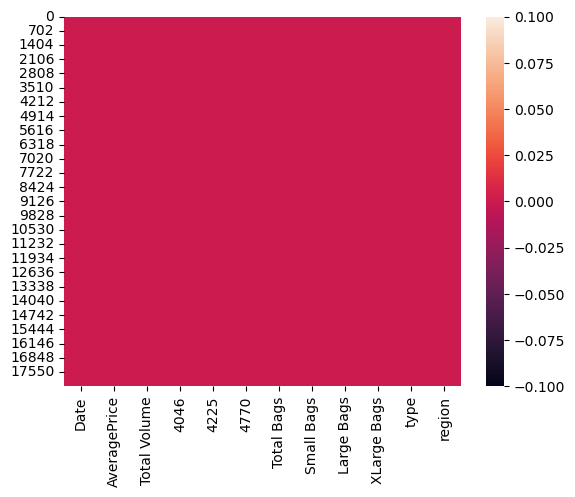

In [110]:
sns.heatmap(df.isnull())

check the null value using heatmap

In [111]:
for i in df.columns:
    print(df[i].value_counts())
    print("\n")

2015-12-27    108
2017-12-24    108
2017-12-10    108
2017-12-03    108
2017-11-26    108
             ... 
2016-11-06    108
2018-01-07    108
2017-06-18    107
2017-06-25    107
2015-12-06    107
Name: Date, Length: 169, dtype: int64


1.15    202
1.18    199
1.08    194
1.26    193
1.13    192
       ... 
3.25      1
3.12      1
2.68      1
3.03      1
3.17      1
Name: AveragePrice, Length: 259, dtype: int64


4103.97       2
3529.44       2
46602.16      2
13234.04      2
3713.49       2
             ..
874349.55     1
1621253.97    1
830499.38     1
845065.66     1
17489.58      1
Name: Total Volume, Length: 18237, dtype: int64


0.00       242
3.00        10
4.00         8
1.24         8
1.00         8
          ... 
1486.31      1
1761.80      1
1772.26      1
1803.39      1
2894.77      1
Name: 4046, Length: 17702, dtype: int64


0.00         61
177.87        3
215.36        3
1.30          3
1.26          3
             ..
417905.67     1
275986.91     1
277789.30     1
37815

In [112]:
# check the unique values to the data 
df.nunique().to_frame("No. of unique values")

No. of unique values
Date                           169
AveragePrice                   259
Total Volume                 18237
4046                         17702
4225                         18103
4770                         12071
Total Bags                   18097
Small Bags                   17321
Large Bags                   15082
XLarge Bags                   5588
type                             2
region                          54

In [113]:
# statistical summary of numerical dataset 
df.describe()

AveragePrice  Total Volume          4046          4225          4770  \
count  18249.000000  1.824900e+04  1.824900e+04  1.824900e+04  1.824900e+04   
mean       1.405978  8.506440e+05  2.930084e+05  2.951546e+05  2.283974e+04   
std        0.402677  3.453545e+06  1.264989e+06  1.204120e+06  1.074641e+05   
min        0.440000  8.456000e+01  0.000000e+00  0.000000e+00  0.000000e+00   
25%        1.100000  1.083858e+04  8.540700e+02  3.008780e+03  0.000000e+00   
50%        1.370000  1.073768e+05  8.645300e+03  2.906102e+04  1.849900e+02   
75%        1.660000  4.329623e+05  1.110202e+05  1.502069e+05  6.243420e+03   
max        3.250000  6.250565e+07  2.274362e+07  2.047057e+07  2.546439e+06   

         Total Bags    Small Bags    Large Bags    XLarge Bags  
count  1.824900e+04  1.824900e+04  1.824900e+04   18249.000000  
mean   2.396392e+05  1.821947e+05  5.433809e+04    3106.426507  
std    9.862424e+05  7.461785e+05  2.439660e+05   17692.894652  
min    0.000000e+00  0.000000e+00  0.000000e+00       0.000000  
25%    5.088640e+03  2.849420e+03  1.274700e+02       0.000000  
50%    3.974383e+04  2.636282e+04  2.647710e+03       0.000000  
75%    1.107834e+05  8.333767e+04  2.202925e+04     132.500000  
max    1.937313e+07  1.338459e+07  5.719097e+06  551693.650000

This gives the statistical information of numericcal columns. The summary of the dataset not looks perfect since there is some negative/invalid values present.

In [117]:
# check the categorical and numerical columns
categorical_col = []
for i in df.dtypes.index:
    if df.dtypes[i]=="object":
        categorical_col.append(i)
print("categorical columns: ",categorical_col)
print('\n')

numerical_col = []
for i in df.dtypes.index:
    if df.dtypes[i]!="object":
        numerical_col.append(i)
print("numerical columns: ", numerical_col)

categorical columns:  ['Date', 'type', 'region']


numerical columns:  ['AveragePrice', 'Total Volume', '4046', '4225', '4770', 'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags']


here data split into two parts one of categorical and one of numerical

In [118]:
df['region'].unique()

array(['Albany', 'Atlanta', 'BaltimoreWashington', 'Boise', 'Boston',
       'BuffaloRochester', 'California', 'Charlotte', 'Chicago',
       'CincinnatiDayton', 'Columbus', 'DallasFtWorth', 'Denver',
       'Detroit', 'GrandRapids', 'GreatLakes', 'HarrisburgScranton',
       'HartfordSpringfield', 'Houston', 'Indianapolis', 'Jacksonville',
       'LasVegas', 'LosAngeles', 'Louisville', 'MiamiFtLauderdale',
       'Midsouth', 'Nashville', 'NewOrleansMobile', 'NewYork',
       'Northeast', 'NorthernNewEngland', 'Orlando', 'Philadelphia',
       'PhoenixTucson', 'Pittsburgh', 'Plains', 'Portland',
       'RaleighGreensboro', 'RichmondNorfolk', 'Roanoke', 'Sacramento',
       'SanDiego', 'SanFrancisco', 'Seattle', 'SouthCarolina',
       'SouthCentral', 'Southeast', 'Spokane', 'StLouis', 'Syracuse',
       'Tampa', 'TotalUS', 'West', 'WestTexNewMexico'], dtype=object)

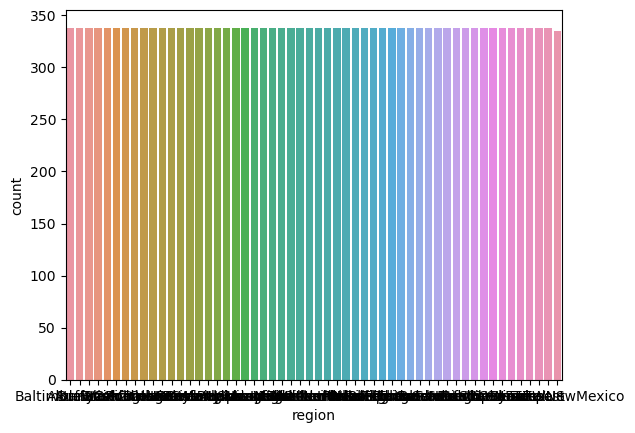

In [119]:
sns.countplot(x='region', data=df)
plt.show()

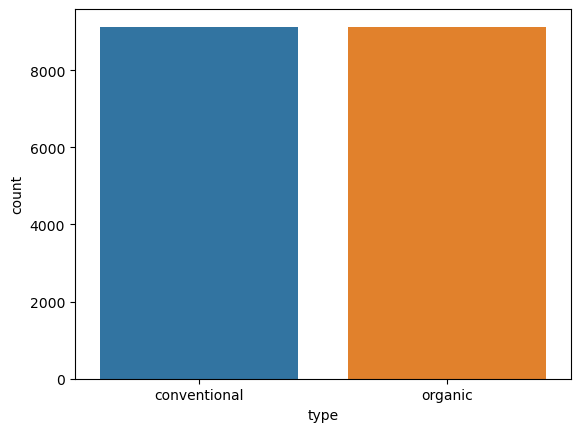

In [120]:
sns.countplot(x='type', data=df)
plt.show()

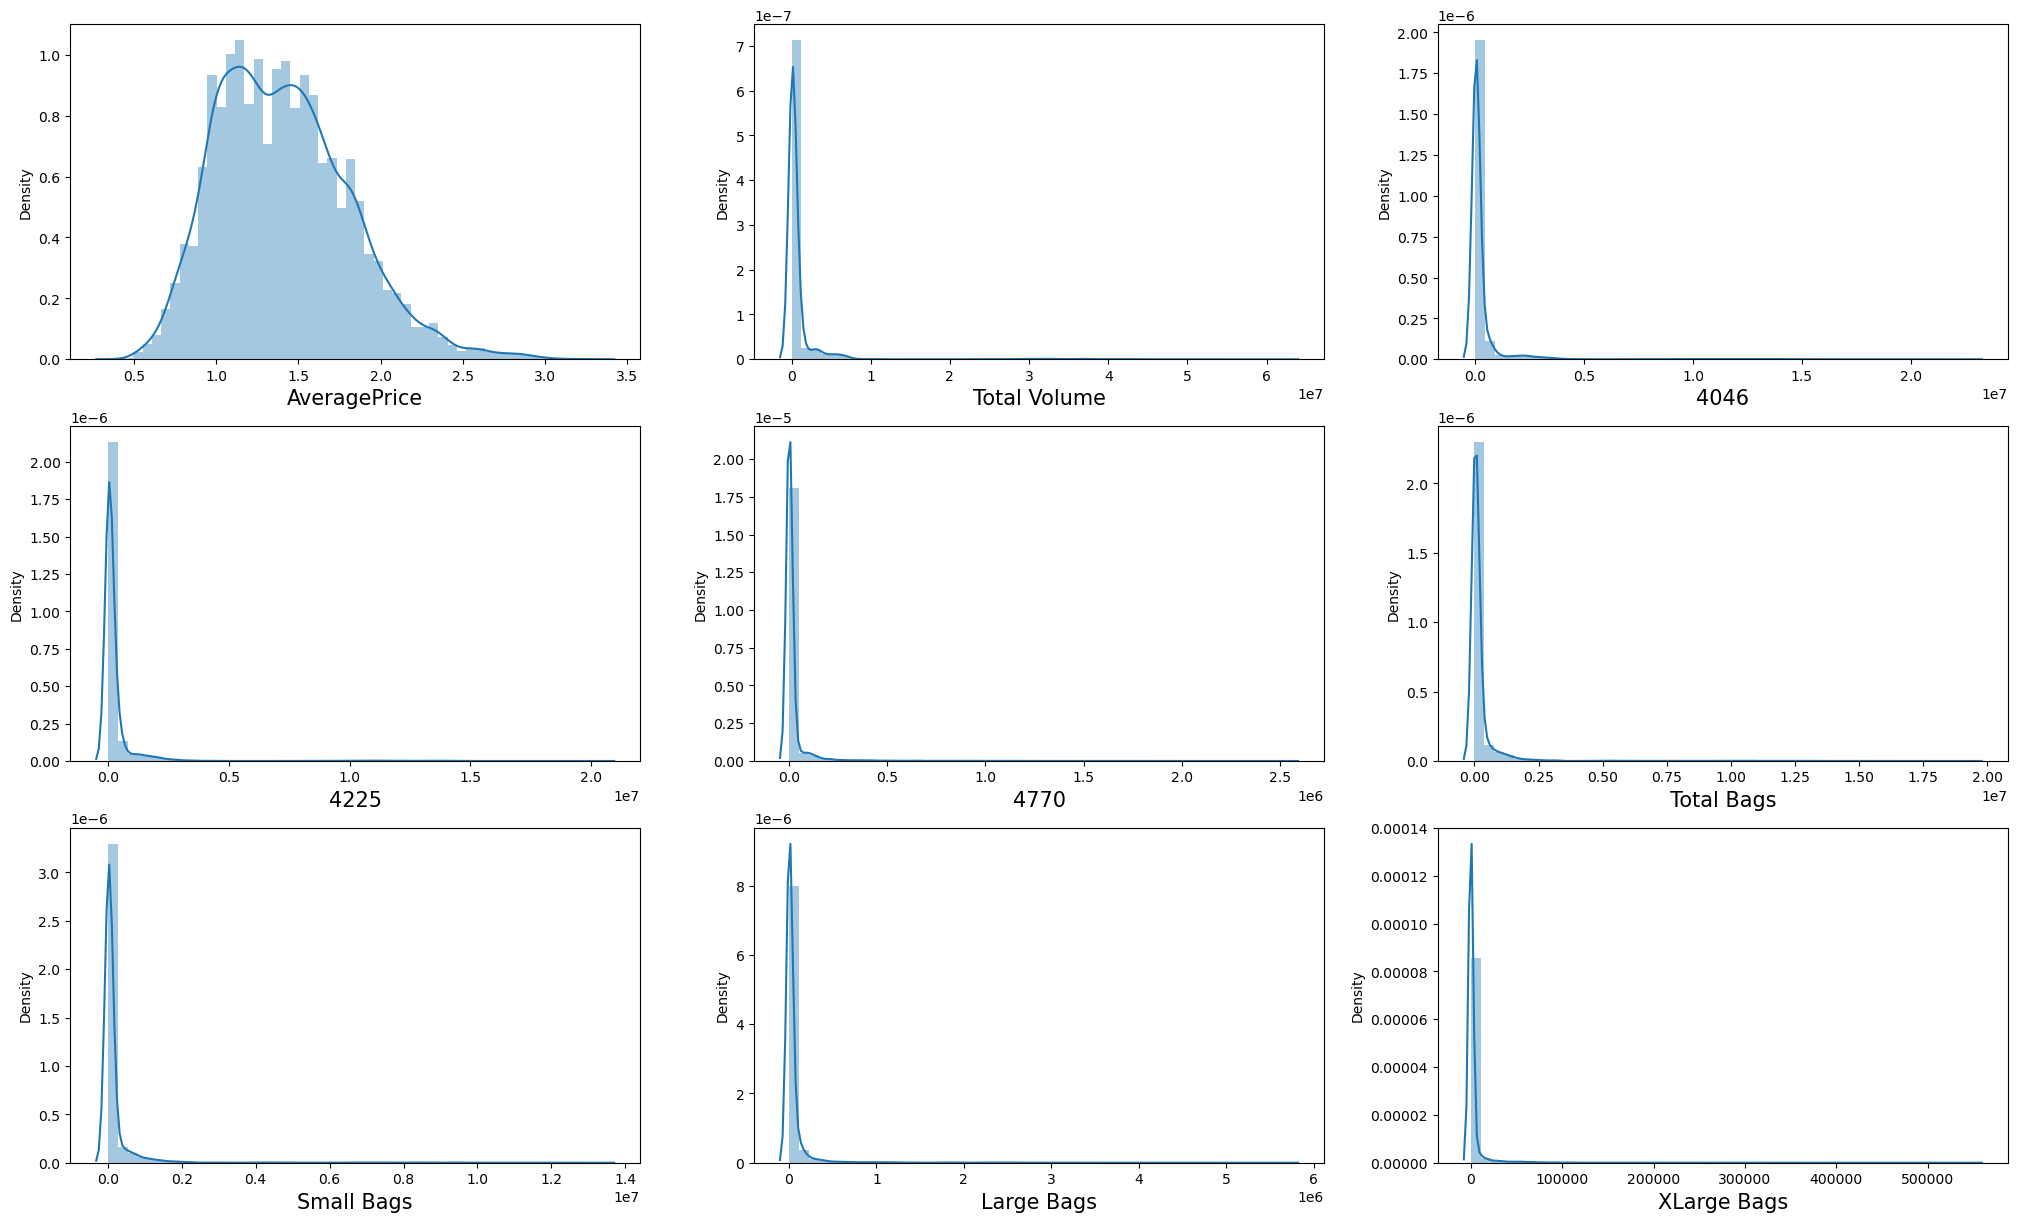

In [121]:
plt.figure(figsize=(25,20), facecolor='white')
plotnumber = 1

for column in numerical_col:
    if plotnumber<=10:
        ax=plt.subplot(4,3,plotnumber)
        sns.distplot(df[column])
        plt.xlabel(column, fontsize= 15)
    plotnumber+=1
plt.show()

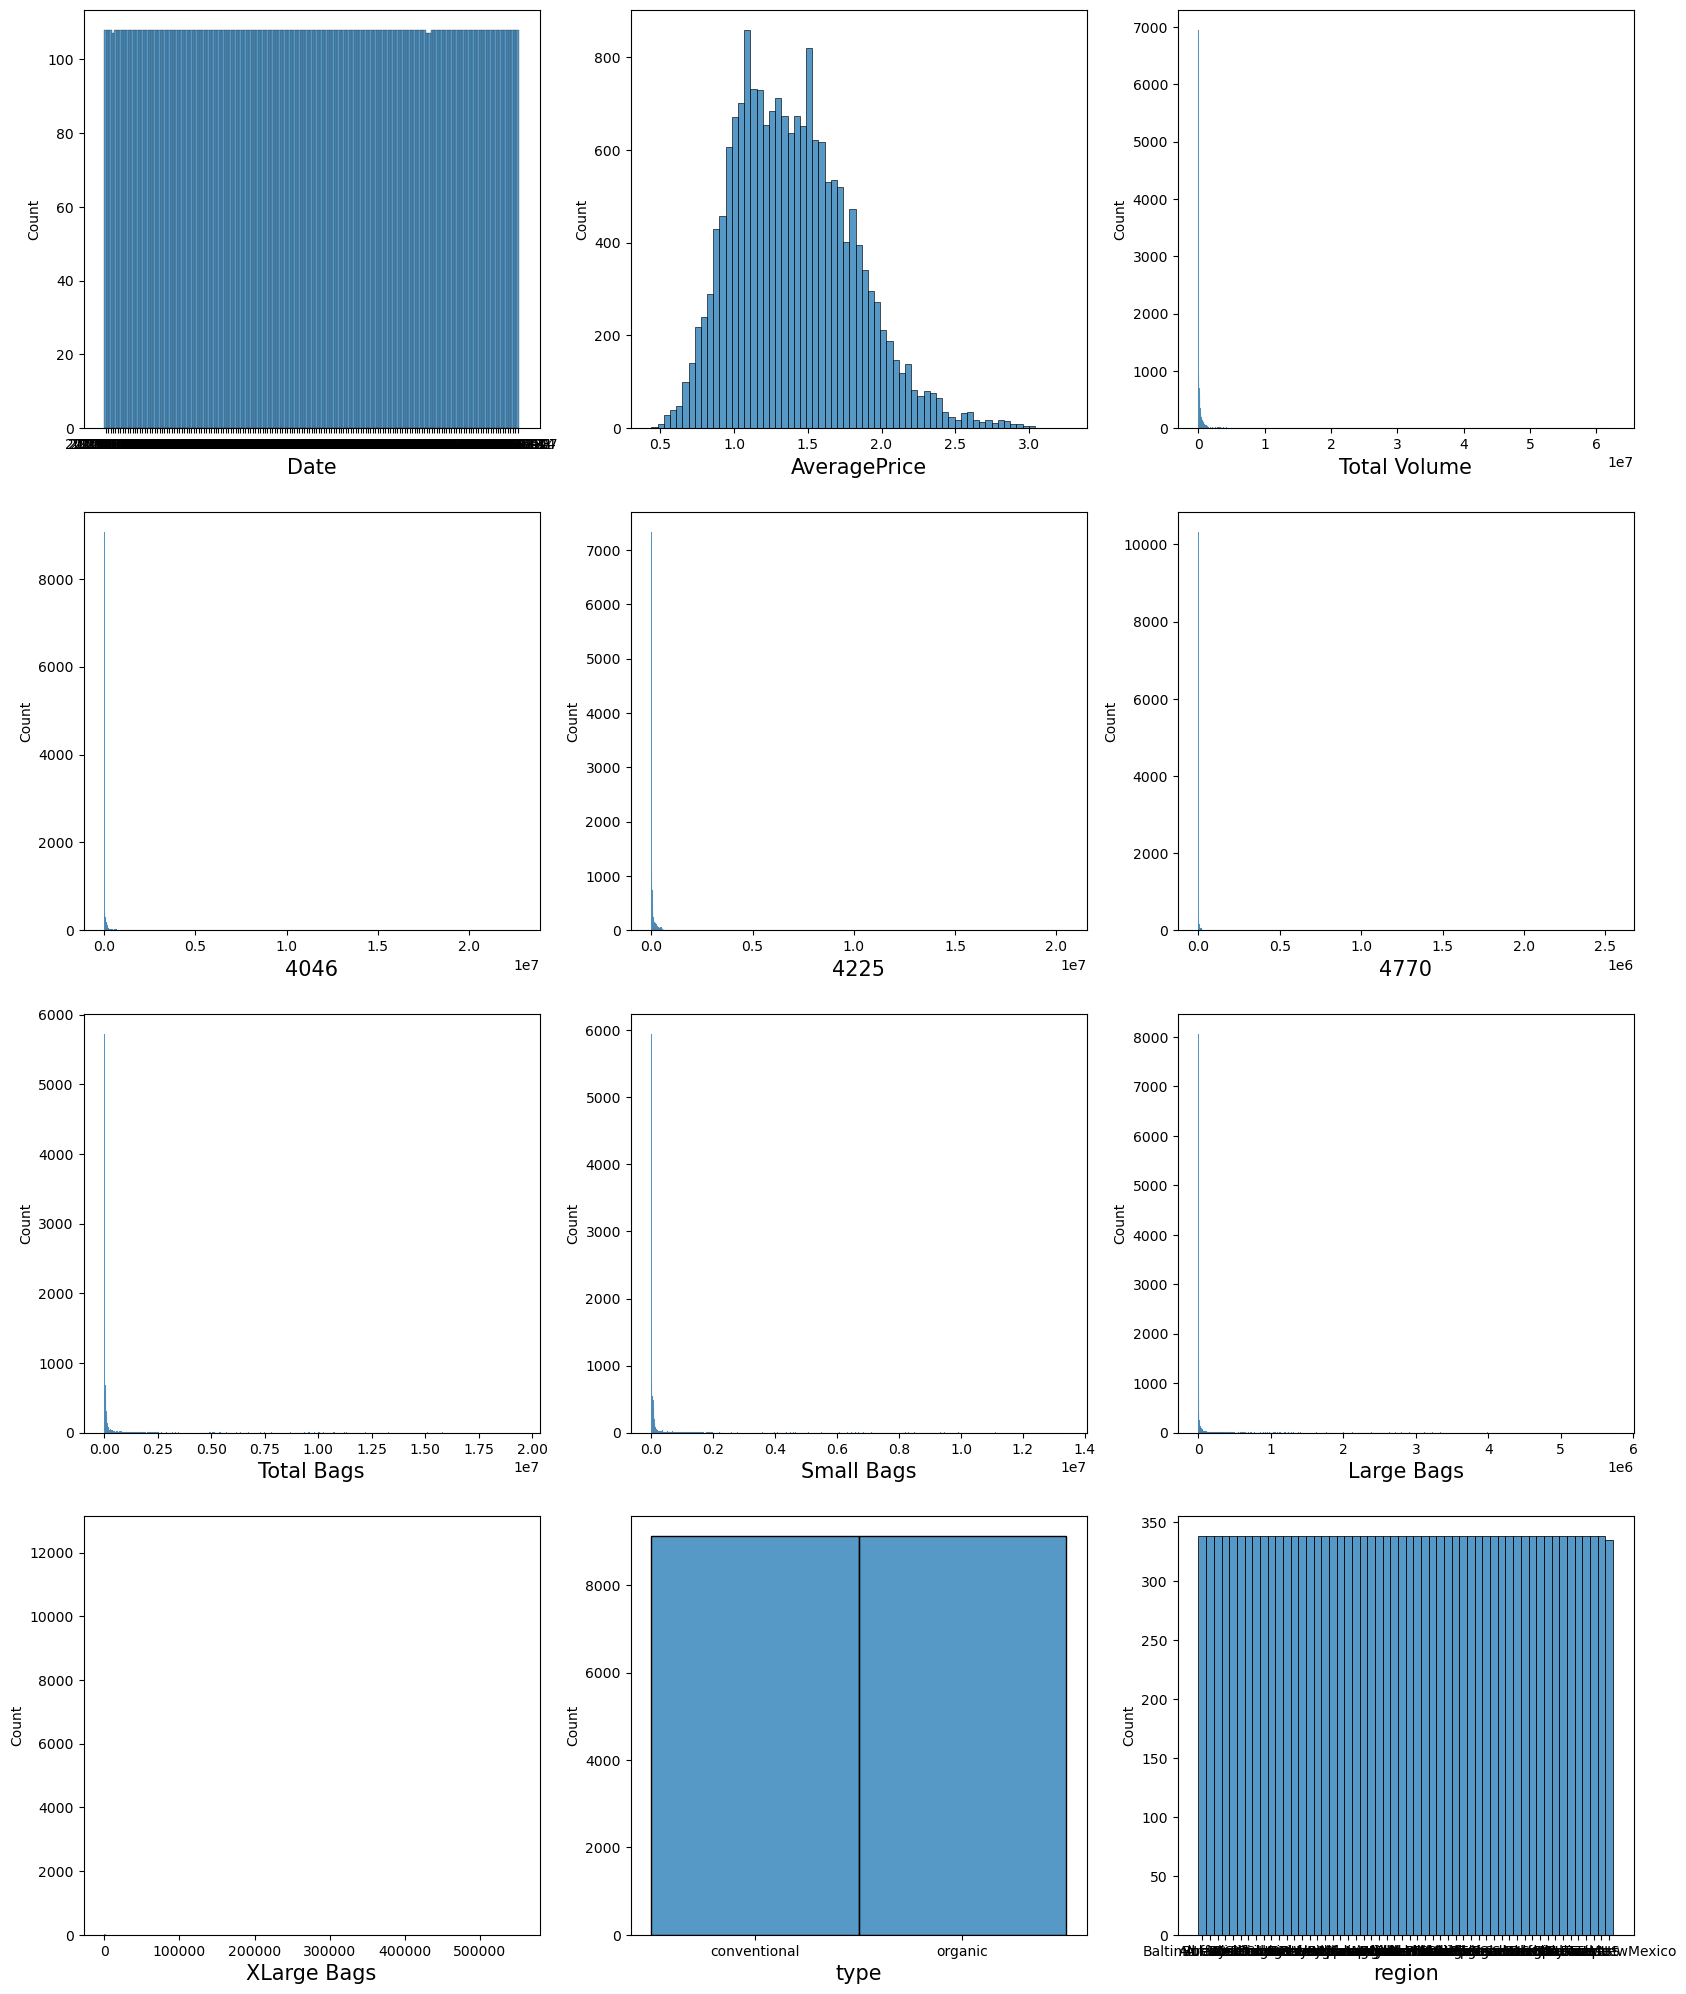

In [122]:
plt.figure(figsize=(20,25), facecolor='white')
plotnumber = 1

for columns in df:
    if plotnumber<=12:
        ax=plt.subplot(4,3,plotnumber)
        sns.histplot(df[columns])
        plt.xlabel(columns, fontsize=15)
    plotnumber+=1
plt.show()

In [123]:
df['Date']= pd.to_datetime(df['Date'], format = '%Y-%m-%d')

In [124]:
df.set_index('Date',inplace=True)

here formatting the date columns and set date as a index

In [125]:
df.corr()

AveragePrice  Total Volume      4046      4225      4770  \
AveragePrice      1.000000     -0.192752 -0.208317 -0.172928 -0.179446   
Total Volume     -0.192752      1.000000  0.977863  0.974181  0.872202   
4046             -0.208317      0.977863  1.000000  0.926110  0.833389   
4225             -0.172928      0.974181  0.926110  1.000000  0.887855   
4770             -0.179446      0.872202  0.833389  0.887855  1.000000   
Total Bags       -0.177088      0.963047  0.920057  0.905787  0.792314   
Small Bags       -0.174730      0.967238  0.925280  0.916031  0.802733   
Large Bags       -0.172940      0.880640  0.838645  0.810015  0.698471   
XLarge Bags      -0.117592      0.747157  0.699377  0.688809  0.679861   

              Total Bags  Small Bags  Large Bags  XLarge Bags  
AveragePrice   -0.177088   -0.174730   -0.172940    -0.117592  
Total Volume    0.963047    0.967238    0.880640     0.747157  
4046            0.920057    0.925280    0.838645     0.699377  
4225            0.905787    0.916031    0.810015     0.688809  
4770            0.792314    0.802733    0.698471     0.679861  
Total Bags      1.000000    0.994335    0.943009     0.804233  
Small Bags      0.994335    1.000000    0.902589     0.806845  
Large Bags      0.943009    0.902589    1.000000     0.710858  
XLarge Bags     0.804233    0.806845    0.710858     1.000000

Check the correlation

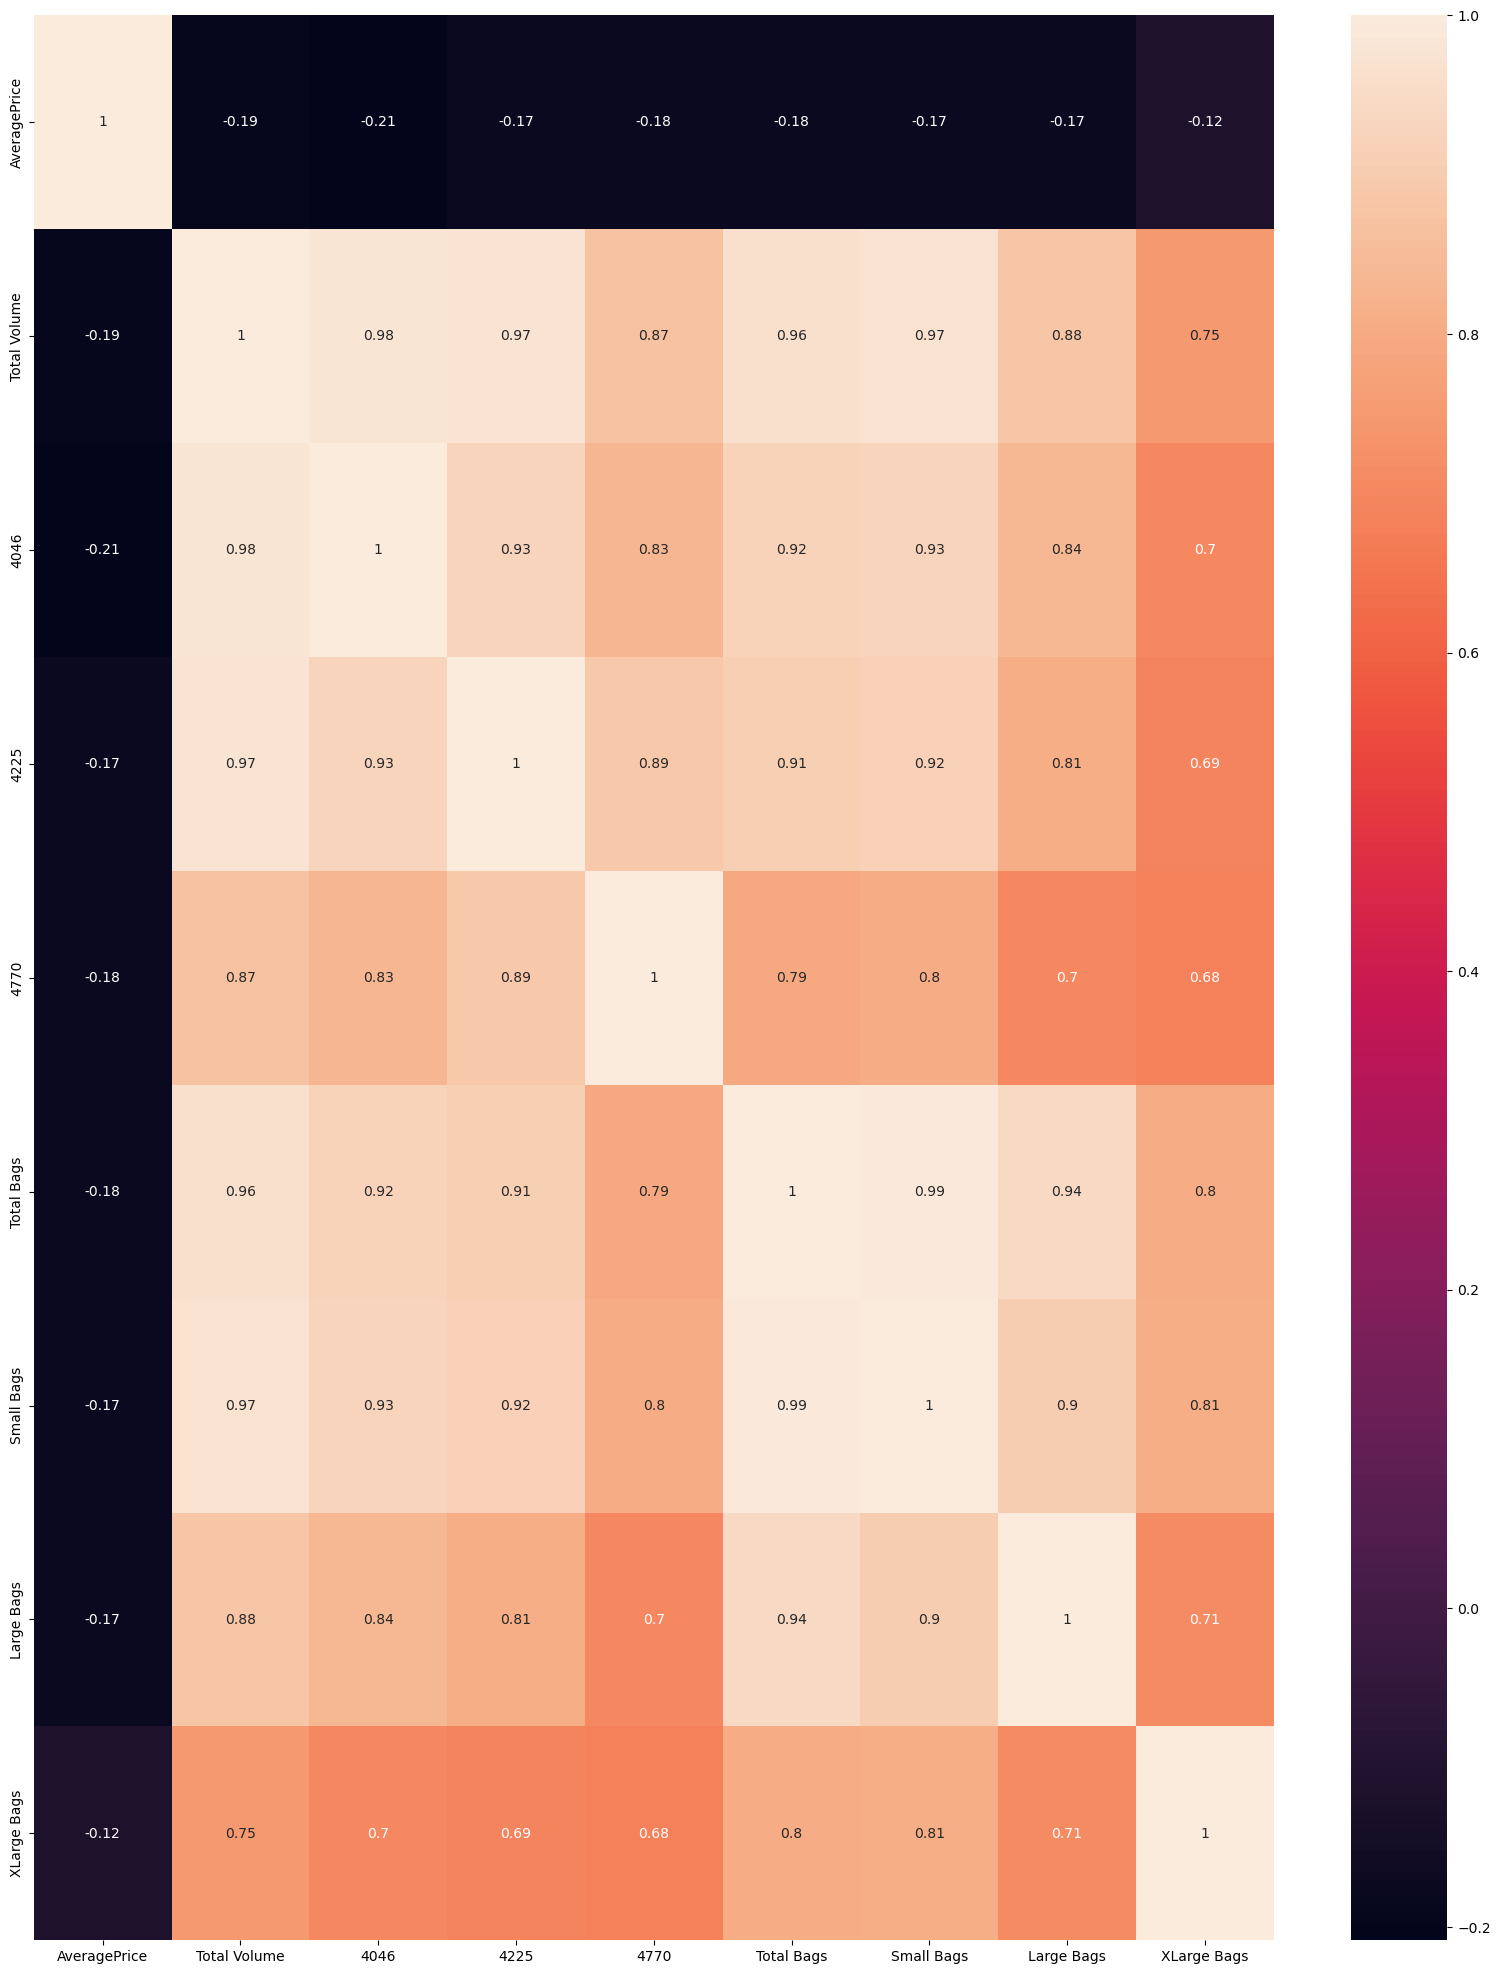

In [126]:
plt.figure(figsize=(20,25))
sns.heatmap(df.corr(),annot=True)
plt.show()

Check the correlation using heatmap

In [127]:
from sklearn.preprocessing import OrdinalEncoder

In [128]:
ord_enc = OrdinalEncoder()
for i in df.columns:
    if df[i].dtypes=='object':
        df[i] = ord_enc.fit_transform(df[i].values.reshape(-1,1))
df

AveragePrice  Total Volume     4046       4225    4770  \
Date                                                                 
2015-12-27          1.33      64236.62  1036.74   54454.85   48.16   
2015-12-20          1.35      54876.98   674.28   44638.81   58.33   
2015-12-13          0.93     118220.22   794.70  109149.67  130.50   
2015-12-06          1.08      78992.15  1132.00   71976.41   72.58   
2015-11-29          1.28      51039.60   941.48   43838.39   75.78   
...                  ...           ...      ...        ...     ...   
2018-02-04          1.63      17074.83  2046.96    1529.20    0.00   
2018-01-28          1.71      13888.04  1191.70    3431.50    0.00   
2018-01-21          1.87      13766.76  1191.92    2452.79  727.94   
2018-01-14          1.93      16205.22  1527.63    2981.04  727.01   
2018-01-07          1.62      17489.58  2894.77    2356.13  224.53   

            Total Bags  Small Bags  Large Bags  XLarge Bags  type  region  
Date                                                                       
2015-12-27     8696.87     8603.62       93.25          0.0   0.0     0.0  
2015-12-20     9505.56     9408.07       97.49          0.0   0.0     0.0  
2015-12-13     8145.35     8042.21      103.14          0.0   0.0     0.0  
2015-12-06     5811.16     5677.40      133.76          0.0   0.0     0.0  
2015-11-29     6183.95     5986.26      197.69          0.0   0.0     0.0  
...                ...         ...         ...          ...   ...     ...  
2018-02-04    13498.67    13066.82      431.85          0.0   1.0    53.0  
2018-01-28     9264.84     8940.04      324.80          0.0   1.0    53.0  
2018-01-21     9394.11     9351.80       42.31          0.0   1.0    53.0  
2018-01-14    10969.54    10919.54       50.00          0.0   1.0    53.0  
2018-01-07    12014.15    11988.14       26.01          0.0   1.0    53.0  

[18249 rows x 11 columns]

Here Encoded the data using OrdinalEncoder

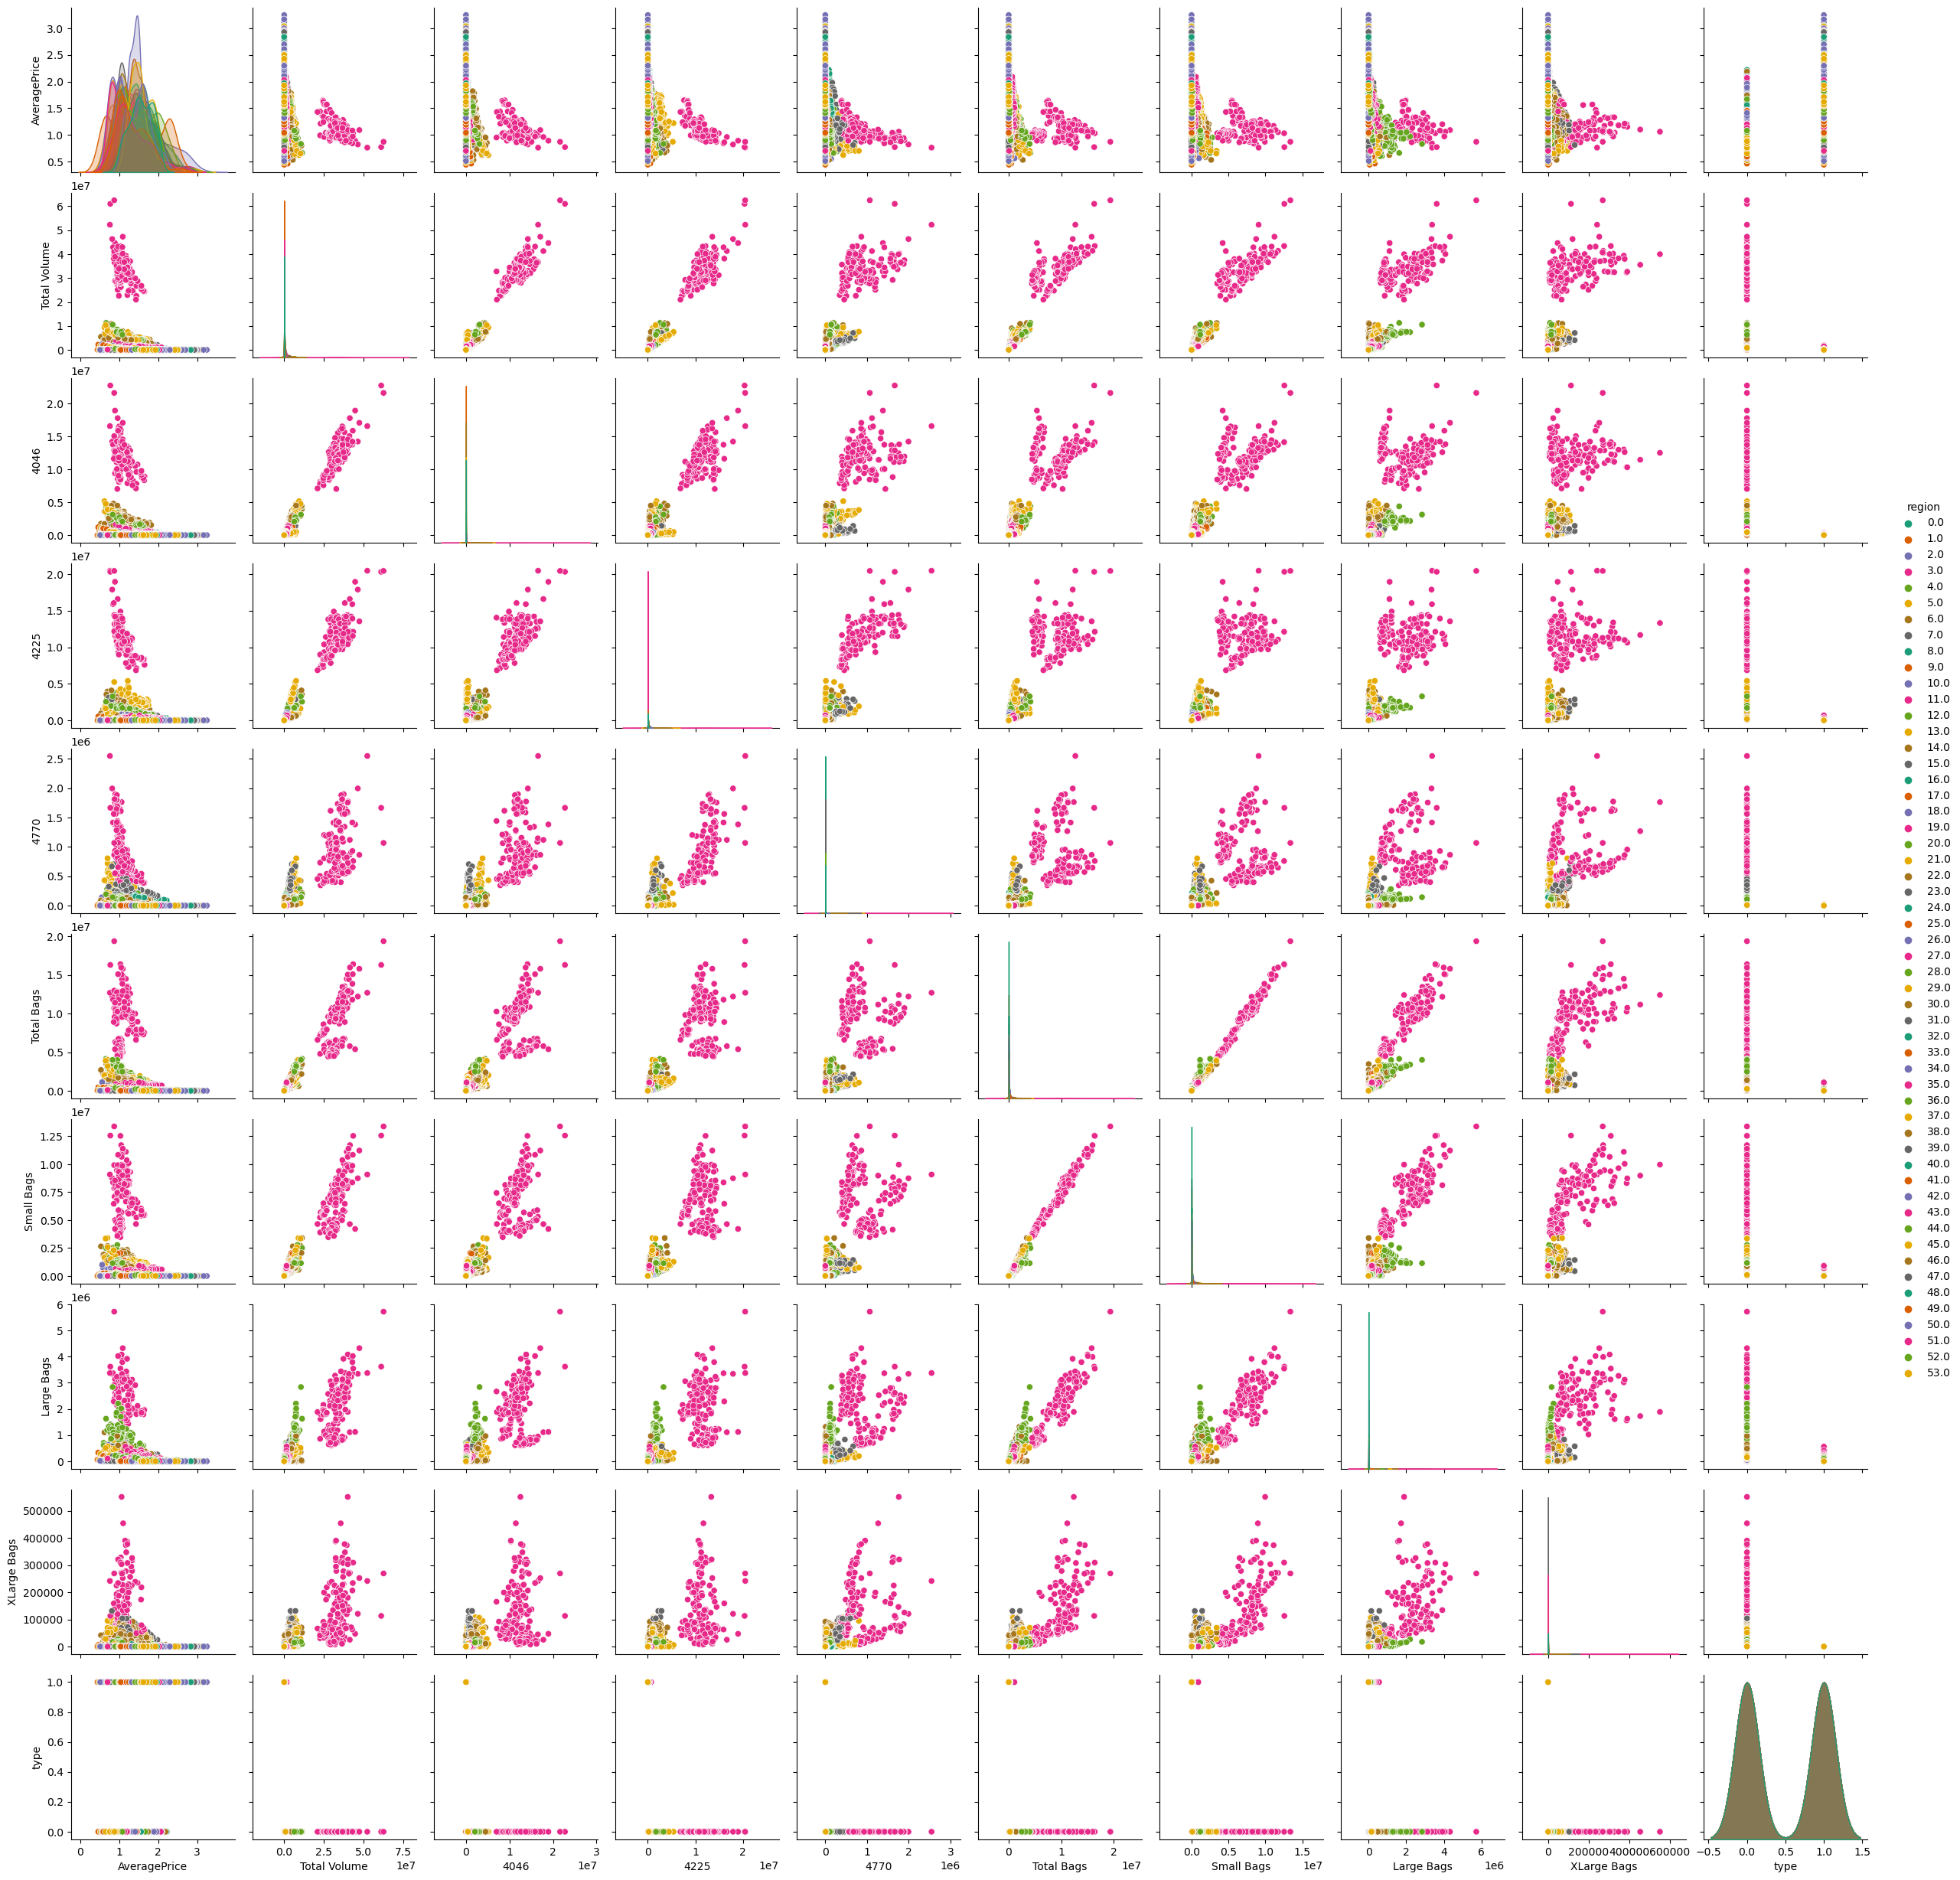

In [129]:
sns.pairplot(df, hue = "region", palette = "Dark2")
plt.show()

Check the relation using pairplot

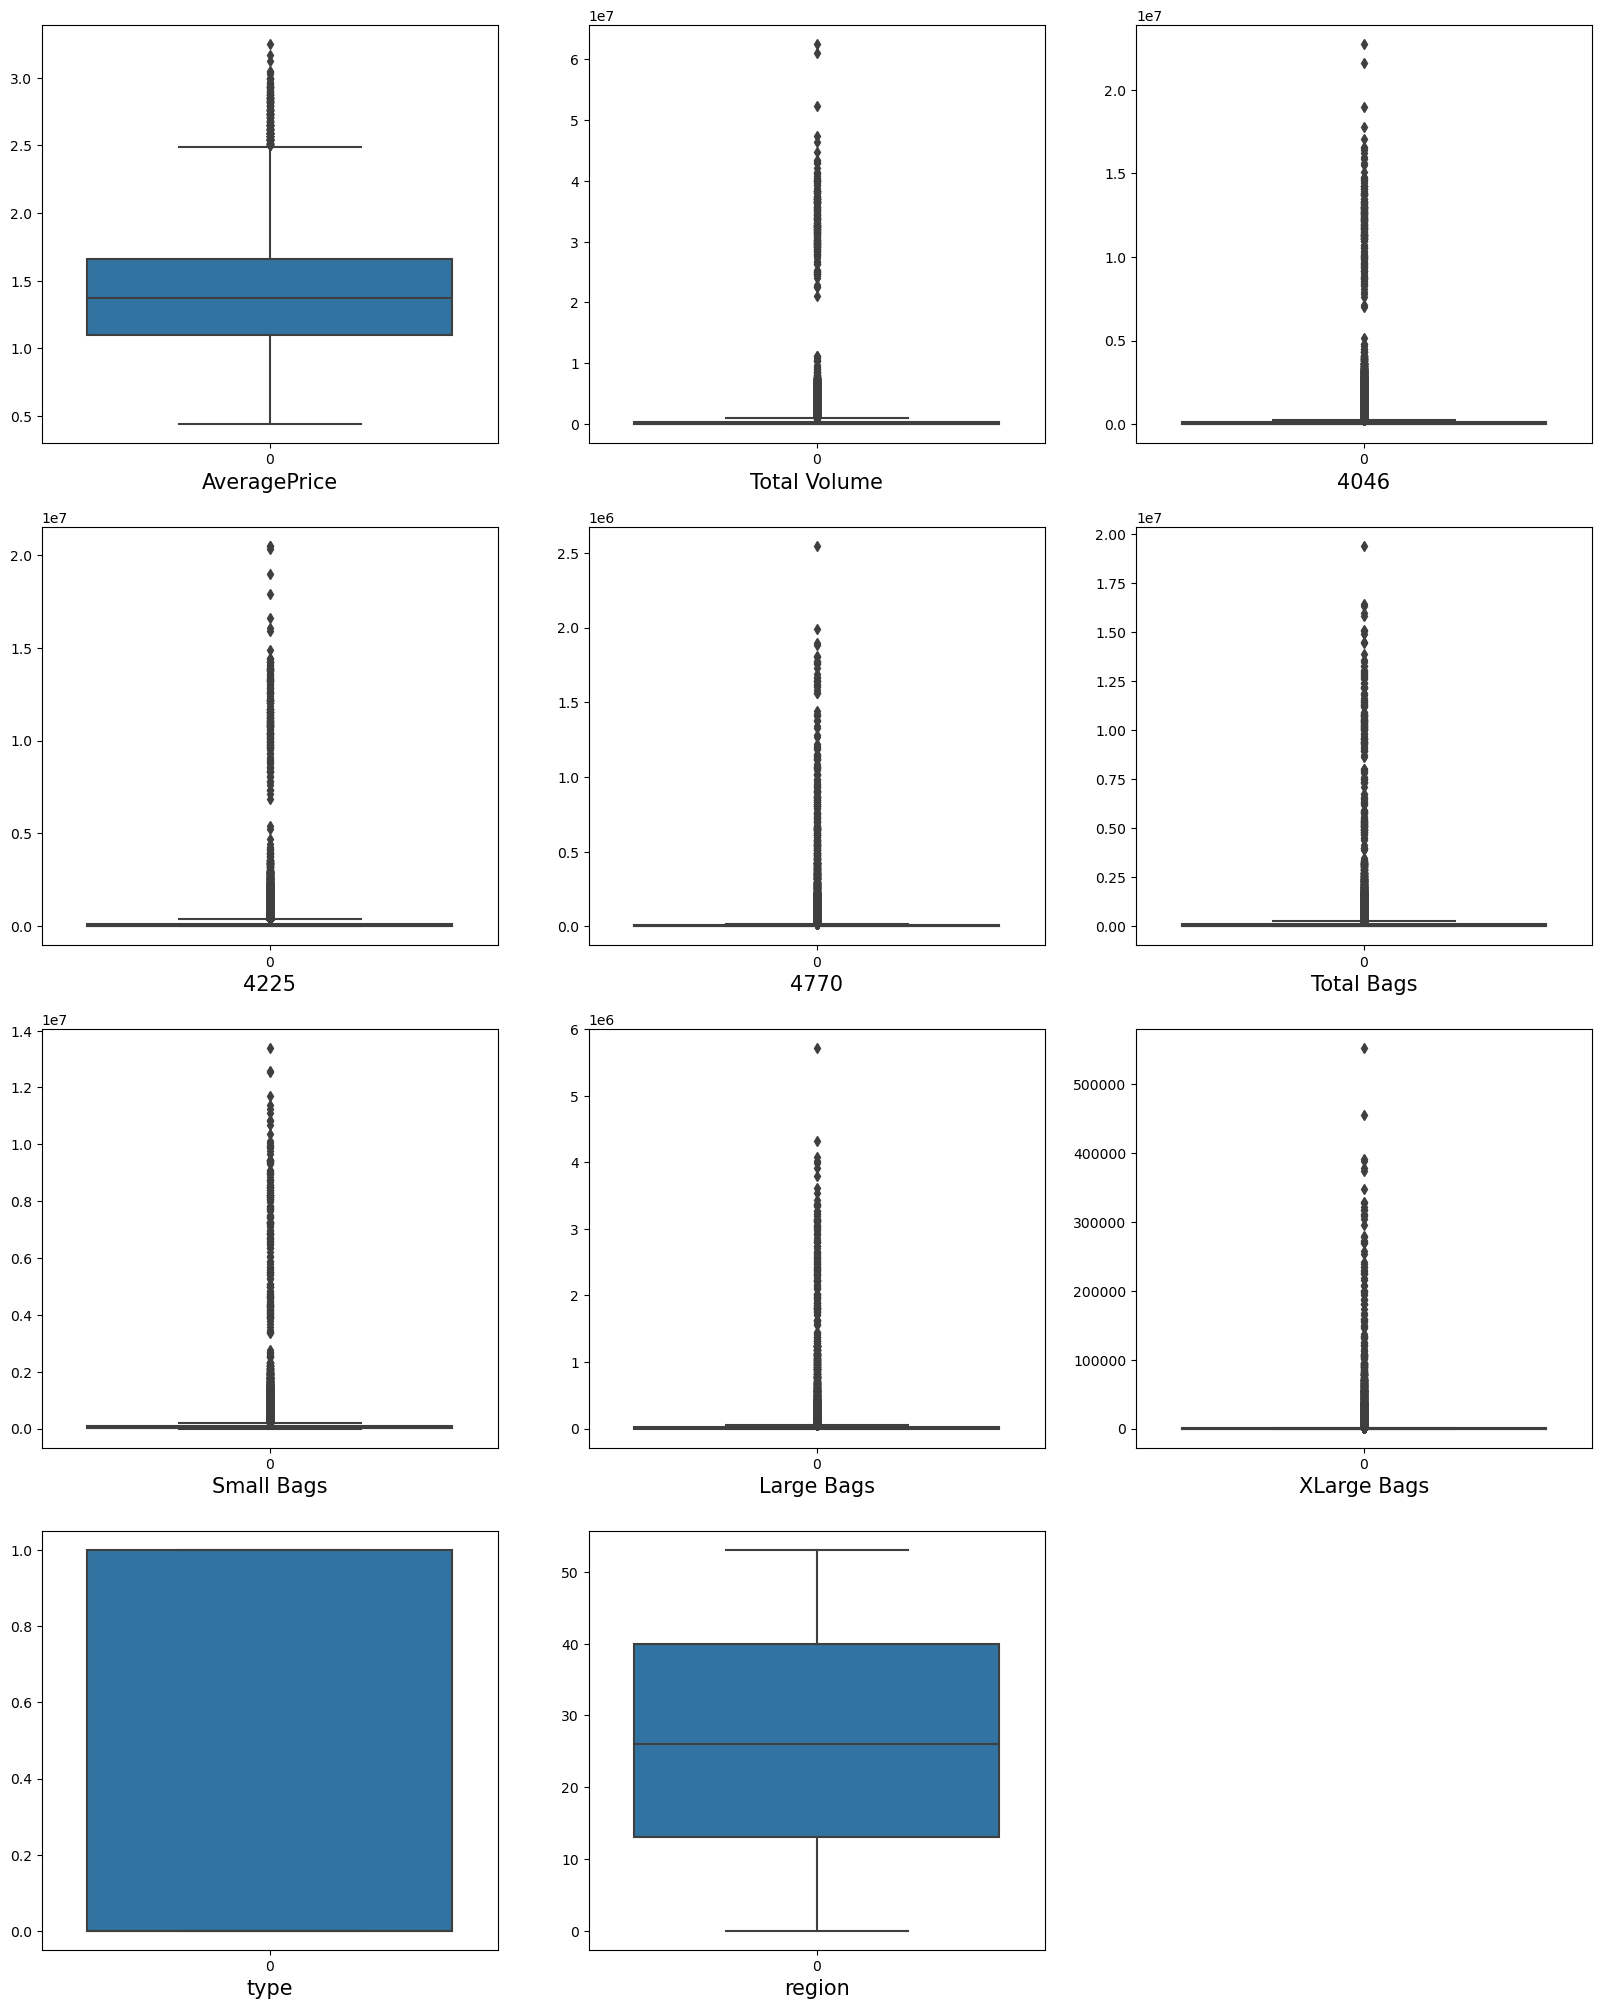

In [130]:
plt.figure(figsize=(20,25), facecolor='white')
plotnumber = 1

for columns in df:
    if plotnumber<=12:
        ax=plt.subplot(4,3,plotnumber)
        sns.boxplot(df[columns])
        plt.xlabel(columns, fontsize=15)
    plotnumber+=1
plt.show()

check the skewness using boxplot here we find the some columns are more skewness

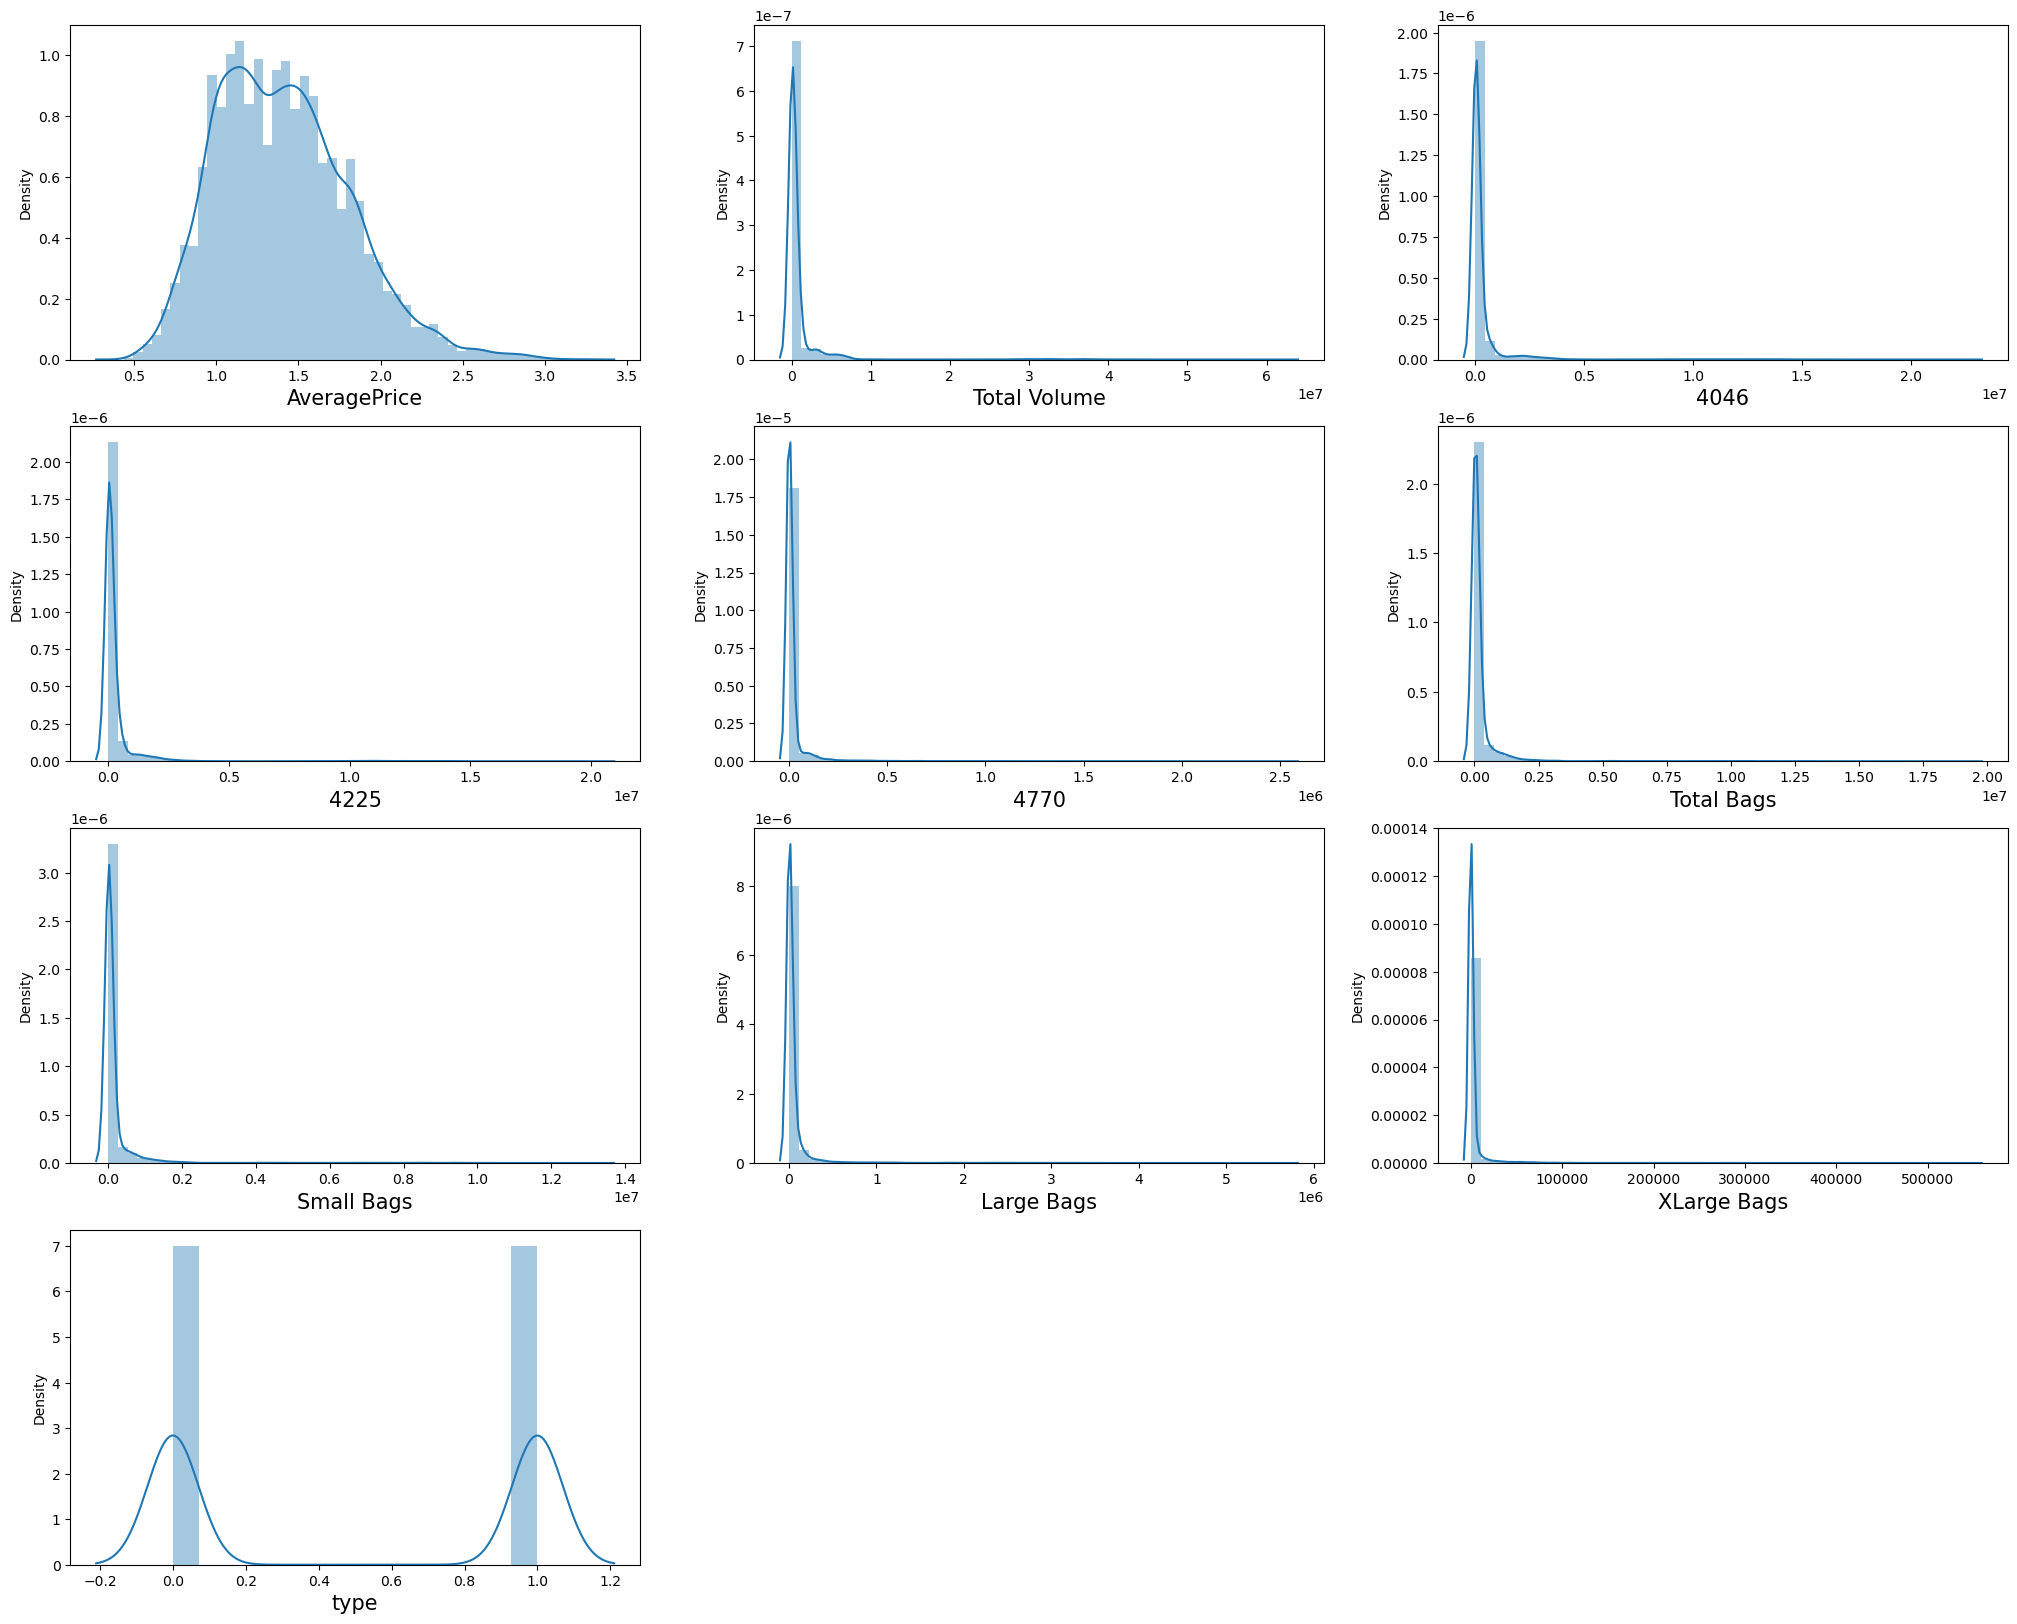

In [131]:
plt.figure(figsize=(25,20), facecolor='white')
plotnumber = 1

for column in df:
    if plotnumber<=10:
        ax=plt.subplot(4,3,plotnumber)
        sns.distplot(df[column])
        plt.xlabel(column, fontsize= 15)
    plotnumber+=1
plt.show()

In [132]:
df.skew()

AveragePrice     0.580303
Total Volume     9.007687
4046             8.648220
4225             8.942466
4770            10.159396
Total Bags       9.756072
Small Bags       9.540660
Large Bags       9.796455
XLarge Bags     13.139751
type             0.000329
region           0.000030
dtype: float64

check the skewness

In [133]:
df['AveragePrice'] = np.sqrt(df['AveragePrice'])
df['Total Volume'] = np.sqrt(df['Total Volume'])
df['4046'] = np.sqrt(df['4046'])
df['4225'] = np.sqrt(df['4225'])
df['4770'] = np.sqrt(df['4770'])
df['Total Bags'] = np.sqrt(df['Total Bags'])
df['Small Bags'] = np.sqrt(df['Small Bags'])
df['Large Bags'] = np.sqrt(df['Large Bags'])
df['XLarge Bags'] = np.sqrt(df['XLarge Bags'])

remove the skewness using np.sqrt

In [134]:
df.skew()

AveragePrice    0.196766
Total Volume    3.986597
4046            3.952972
4225            3.896355
4770            4.128605
Total Bags      4.128864
Small Bags      4.035940
Large Bags      4.134963
XLarge Bags     4.827368
type            0.000329
region          0.000030
dtype: float64

In [135]:
X = df.drop("region", axis=1)
Y = df["region"]

split the features and target variables 

In [136]:
X

AveragePrice  Total Volume       4046        4225       4770  \
Date                                                                       
2015-12-27      1.153256    253.449443  32.198447  233.355630   6.939741   
2015-12-20      1.161895    234.258362  25.966902  211.278986   7.637408   
2015-12-13      0.964365    343.831674  28.190424  330.378071  11.423660   
2015-12-06      1.039230    281.055422  33.645208  268.284196   8.519390   
2015-11-29      1.131371    225.919455  30.683546  209.376193   8.705171   
...                  ...           ...        ...         ...        ...   
2018-02-04      1.276715    130.670693  45.243342   39.104987   0.000000   
2018-01-28      1.307670    117.847529  34.521008   58.579006   0.000000   
2018-01-21      1.367479    117.331837  34.524194   49.525650  26.980363   
2018-01-14      1.389244    127.299725  39.084908   54.598901  26.963123   
2018-01-07      1.272792    132.248176  53.803067   48.539984  14.984325   

            Total Bags  Small Bags  Large Bags  XLarge Bags  type  
Date                                                               
2015-12-27   93.257010   92.755701    9.656604          0.0   0.0  
2015-12-20   97.496461   96.995206    9.873702          0.0   0.0  
2015-12-13   90.251593   89.678370   10.155787          0.0   0.0  
2015-12-06   76.230965   75.348524   11.565466          0.0   0.0  
2015-11-29   78.638095   77.370925   14.060228          0.0   0.0  
...                ...         ...         ...          ...   ...  
2018-02-04  116.183777  114.310192   20.781001          0.0   1.0  
2018-01-28   96.254039   94.551785   18.022209          0.0   1.0  
2018-01-21   96.923217   96.704705    6.504614          0.0   1.0  
2018-01-14  104.735572  104.496603    7.071068          0.0   1.0  
2018-01-07  109.609078  109.490365    5.100000          0.0   1.0  

[18249 rows x 10 columns]

In [137]:
Y

Date
2015-12-27     0.0
2015-12-20     0.0
2015-12-13     0.0
2015-12-06     0.0
2015-11-29     0.0
              ... 
2018-02-04    53.0
2018-01-28    53.0
2018-01-21    53.0
2018-01-14    53.0
2018-01-07    53.0
Name: region, Length: 18249, dtype: float64

In [138]:
from sklearn.preprocessing import StandardScaler

In [139]:
scaler = StandardScaler()
X = pd.DataFrame(scaler.fit_transform(X),columns = X.columns)
X

AveragePrice  Total Volume      4046      4225      4770  Total Bags  \
0         -0.121525     -0.386727 -0.520201 -0.169667 -0.451135   -0.513707   
1         -0.070225     -0.412444 -0.533563 -0.219084 -0.445968   -0.502871   
2         -1.243219     -0.265606 -0.528796  0.047510 -0.417929   -0.521389   
3         -0.798645     -0.349732 -0.517099 -0.091482 -0.439437   -0.557226   
4         -0.251487     -0.423619 -0.523450 -0.223343 -0.438061   -0.551073   
...             ...           ...       ...       ...       ...         ...   
18244      0.611609     -0.551261 -0.492230 -0.604483 -0.502526   -0.455106   
18245      0.795430     -0.568445 -0.515221 -0.560892 -0.502526   -0.506046   
18246      1.150599     -0.569136 -0.515214 -0.581157 -0.302726   -0.504336   
18247      1.279846     -0.555778 -0.505435 -0.569801 -0.302853   -0.484367   
18248      0.588317     -0.549147 -0.473876 -0.583363 -0.391561   -0.471911   

       Small Bags  Large Bags  XLarge Bags      type  
0       -0.462963   -0.556548    -0.378133 -0.999836  
1       -0.450652   -0.555460    -0.378133 -0.999836  
2       -0.471899   -0.554045    -0.378133 -0.999836  
3       -0.513510   -0.546977    -0.378133 -0.999836  
4       -0.507637   -0.534469    -0.378133 -0.999836  
...           ...         ...          ...       ...  
18244   -0.400373   -0.500772    -0.378133  1.000164  
18245   -0.457747   -0.514604    -0.378133  1.000164  
18246   -0.451496   -0.572352    -0.378133  1.000164  
18247   -0.428870   -0.569512    -0.378133  1.000164  
18248   -0.414369   -0.579394    -0.378133  1.000164  

[18249 rows x 10 columns]

Feature scalling using standard scaler

In [140]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [141]:
vif = pd.DataFrame()
vif['VIF values']= [variance_inflation_factor(X.values, i) for i in range(len(X.columns))]
vif['Features'] = X.columns
vif

VIF values      Features
0    1.931737  AveragePrice
1  755.234168  Total Volume
2   91.244637          4046
3  132.401000          4225
4    4.863380          4770
5  553.702871    Total Bags
6  299.418789    Small Bags
7   34.542491    Large Bags
8    3.198886   XLarge Bags
9    2.025449          type

Check the VIF variance inflation factor

In [142]:
X.drop("Total Volume", axis=1, inplace=True)
X.drop("Total Bags", axis=1, inplace=True)
X.drop("Small Bags", axis=1, inplace=True)

delete some columns who has highly correleted with other columns

In [143]:
vif = pd.DataFrame()
vif['VIF values']= [variance_inflation_factor(X.values, i) for i in range(len(X.columns))]
vif['Features'] = X.columns
vif

VIF values      Features
0    1.806423  AveragePrice
1    5.221931          4046
2    6.020726          4225
3    4.602753          4770
4    3.224568    Large Bags
5    2.550918   XLarge Bags
6    1.978783          type

In [144]:
Y.value_counts()

0.0     338
40.0    338
29.0    338
30.0    338
31.0    338
32.0    338
33.0    338
34.0    338
35.0    338
36.0    338
37.0    338
38.0    338
39.0    338
41.0    338
1.0     338
42.0    338
43.0    338
44.0    338
45.0    338
46.0    338
47.0    338
48.0    338
49.0    338
50.0    338
51.0    338
52.0    338
28.0    338
27.0    338
26.0    338
25.0    338
2.0     338
3.0     338
4.0     338
5.0     338
6.0     338
7.0     338
8.0     338
9.0     338
10.0    338
11.0    338
12.0    338
13.0    338
14.0    338
15.0    338
16.0    338
17.0    338
18.0    338
19.0    338
20.0    338
21.0    338
22.0    338
23.0    338
24.0    338
53.0    335
Name: region, dtype: int64

finding the best random state

In [145]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [146]:
maxAccu = 0
maxRS = 0
for i in range (1,200):
    x_train,x_test,y_train,y_test = train_test_split(X,Y, test_size = .30, random_state=i)
    RFR = RandomForestClassifier()
    RFR.fit(x_train, y_train)
    pred = RFR.predict(x_test)
    acc = accuracy_score(y_test, pred)
    if acc>maxAccu:
        maxAccu = acc
        maxRS = i
print("Best Accuracy is ", maxAccu, "at random_state", maxRS)

Best Accuracy is  0.8473059360730594 at random_state 47


Best Accuracy is  0.8473059360730594 at random_state 185 using RandomForestClassifier

Creating train test split

In [147]:
x_train, x_test, y_train, y_test = train_test_split(X,Y, test_size = 0.30, random_state=maxRS)

# Classification model

In [148]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier, AdaBoostClassifier, BaggingClassifier
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import ExtraTreesClassifier
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score, classification_report

# LogisticRegression

In [149]:
lr = LogisticRegression()
lr.fit(x_train, y_train)
pred = lr.predict(x_test)
print(accuracy_score(y_test, pred))
print(confusion_matrix(y_test, pred))
print(classification_report(y_test, pred))

0.4100456621004566
[[17  0  0 ...  0  0  0]
 [ 0 31  0 ...  0  0  1]
 [ 0  0 31 ...  0  0  2]
 ...
 [ 0  0  0 ... 98  1  0]
 [ 0  0  0 ...  0 76  0]
 [ 0  0  0 ...  0  0 26]]
              precision    recall  f1-score   support

         0.0       0.25      0.17      0.20       103
         1.0       0.46      0.31      0.37       101
         2.0       0.53      0.34      0.41        92
         3.0       0.24      0.49      0.32       108
         4.0       0.24      0.33      0.28        93
         5.0       0.11      0.15      0.12        82
         6.0       0.66      0.80      0.72       105
         7.0       0.46      0.52      0.49       107
         8.0       0.44      0.38      0.41       106
         9.0       0.38      0.65      0.48       110
        10.0       0.69      0.17      0.28       103
        11.0       0.39      0.49      0.44       100
        12.0       0.52      0.45      0.48       105
        13.0       0.44      0.34      0.38        98
        14.0  

The accurracy for this model is 41 % score using  LogisticRegression

# RandomForestClassifier

In [150]:
RFC = RandomForestClassifier()
RFC.fit(x_train, y_train)
pred = RFC.predict(x_test)
print(accuracy_score(y_test, pred))
print(confusion_matrix(y_test, pred))
print(classification_report(y_test, pred))

0.8445662100456621
[[ 81   0   0 ...   0   0   0]
 [  0  78   0 ...   0   0   3]
 [  0   0  87 ...   0   0   0]
 ...
 [  0   0   0 ... 100   0   0]
 [  0   0   0 ...   1  92   0]
 [  0   1   1 ...   0   0  70]]
              precision    recall  f1-score   support

         0.0       0.74      0.79      0.76       103
         1.0       0.73      0.77      0.75       101
         2.0       0.92      0.95      0.93        92
         3.0       0.87      0.82      0.85       108
         4.0       0.74      0.74      0.74        93
         5.0       0.74      0.65      0.69        82
         6.0       1.00      0.99      1.00       105
         7.0       0.86      0.89      0.88       107
         8.0       0.93      0.96      0.94       106
         9.0       0.82      0.92      0.87       110
        10.0       0.79      0.78      0.78       103
        11.0       0.84      0.91      0.88       100
        12.0       0.93      0.95      0.94       105
        13.0       0.74      0.6

The accurracy for this model is 84 % score using RandomForestClassifier

# SVC

In [151]:
svc = SVC()
svc.fit(x_train, y_train)
pred = svc.predict(x_test)
print(accuracy_score(y_test, pred))
print(confusion_matrix(y_test, pred))
print(classification_report(y_test, pred))

0.503013698630137
[[ 15   0   0 ...   0   0   0]
 [  0  41   0 ...   0   0   0]
 [  0   0  68 ...   0   0   0]
 ...
 [  0   0   0 ... 100   0   0]
 [  0   0   0 ...   1  91   0]
 [  0   3   3 ...   0   0  39]]
              precision    recall  f1-score   support

         0.0       0.48      0.15      0.22       103
         1.0       0.50      0.41      0.45       101
         2.0       0.37      0.74      0.49        92
         3.0       0.96      0.49      0.65       108
         4.0       0.31      0.44      0.37        93
         5.0       0.23      0.21      0.22        82
         6.0       0.87      0.86      0.87       105
         7.0       0.62      0.59      0.61       107
         8.0       0.83      0.92      0.87       106
         9.0       0.71      0.45      0.55       110
        10.0       0.74      0.24      0.36       103
        11.0       0.40      0.63      0.49       100
        12.0       0.79      0.56      0.66       105
        13.0       0.86      0.33

The accurracy for this model is 50 % score using SVC

# GradientBoostingClassifier

In [152]:
gbc = GradientBoostingClassifier()
gbc.fit(x_train, y_train)
pred = gbc.predict(x_test)
print(accuracy_score(y_test, pred))
print(confusion_matrix(y_test, pred))
print(classification_report(y_test, pred))

0.7707762557077625
[[67  0  0 ...  0  0  0]
 [ 0 63  0 ...  0  0  3]
 [ 0  0 84 ...  0  0  0]
 ...
 [ 0  0  0 ... 99  1  0]
 [ 0  0  0 ...  0 88  0]
 [ 0  2  1 ...  0  0 57]]
              precision    recall  f1-score   support

         0.0       0.69      0.65      0.67       103
         1.0       0.57      0.62      0.59       101
         2.0       0.90      0.91      0.91        92
         3.0       0.81      0.76      0.78       108
         4.0       0.67      0.73      0.70        93
         5.0       0.59      0.57      0.58        82
         6.0       0.97      0.95      0.96       105
         7.0       0.85      0.85      0.85       107
         8.0       0.98      0.95      0.97       106
         9.0       0.82      0.89      0.85       110
        10.0       0.65      0.74      0.69       103
        11.0       0.75      0.82      0.78       100
        12.0       0.87      0.86      0.86       105
        13.0       0.64      0.57      0.61        98
        14.0  

The accurracy for this model is 77 % score using GradientBoostingClassifier

# AdaBoostClassifier

In [153]:
ABC = AdaBoostClassifier()
ABC.fit(x_train, y_train)
pred = ABC.predict(x_test)
print(accuracy_score(y_test, pred))
print(confusion_matrix(y_test, pred))
print(classification_report(y_test, pred))

0.08840182648401826
[[ 0  0  0 ...  0  0  0]
 [ 0  0  0 ...  0  0  0]
 [ 0  0  0 ...  1  0  0]
 ...
 [ 0  0  0 ... 74  0  0]
 [ 0  0  0 ... 50  0  0]
 [ 0  0  0 ...  4  0  0]]
              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00       103
         1.0       0.00      0.00      0.00       101
         2.0       0.00      0.00      0.00        92
         3.0       0.00      0.00      0.00       108
         4.0       0.11      0.31      0.16        93
         5.0       0.00      0.00      0.00        82
         6.0       0.00      0.00      0.00       105
         7.0       0.00      0.00      0.00       107
         8.0       0.00      0.00      0.00       106
         9.0       0.00      0.00      0.00       110
        10.0       0.05      0.47      0.09       103
        11.0       0.15      0.33      0.21       100
        12.0       0.16      0.05      0.07       105
        13.0       0.00      0.00      0.00        98
        14.0 

The accurracy for this model is 08 % score using AdaBoostClassifier

# BaggingClassifier

In [154]:
BC = BaggingClassifier()
BC.fit(x_train, y_train)
pred = BC.predict(x_test)
print(accuracy_score(y_test, pred))
print(confusion_matrix(y_test, pred))
print(classification_report(y_test, pred))

0.7967123287671233
[[ 76   0   0 ...   0   0   0]
 [  0  73   0 ...   0   0   2]
 [  0   0  83 ...   0   0   0]
 ...
 [  0   0   0 ... 100   0   0]
 [  0   0   0 ...   0  90   0]
 [  0   2   1 ...   0   0  60]]
              precision    recall  f1-score   support

         0.0       0.67      0.74      0.70       103
         1.0       0.65      0.72      0.69       101
         2.0       0.83      0.90      0.86        92
         3.0       0.83      0.81      0.82       108
         4.0       0.71      0.73      0.72        93
         5.0       0.64      0.60      0.62        82
         6.0       0.97      0.96      0.97       105
         7.0       0.80      0.86      0.83       107
         8.0       0.91      0.94      0.93       106
         9.0       0.80      0.88      0.84       110
        10.0       0.69      0.70      0.69       103
        11.0       0.80      0.84      0.82       100
        12.0       0.83      0.90      0.86       105
        13.0       0.71      0.6

The accurracy for this model is 79 % score using BaggingClassifier

# KNN

In [155]:
knn = KNN()
knn.fit(x_train, y_train)
pred = knn.predict(x_test)
print(accuracy_score(y_test, pred))
print(confusion_matrix(y_test, pred))
print(classification_report(y_test, pred))

0.6695890410958905
[[ 70   0   0 ...   0   0   0]
 [  0  61   0 ...   0   0   1]
 [  0   0  77 ...   0   0   1]
 ...
 [  0   0   0 ... 100   0   0]
 [  0   0   0 ...   1  92   0]
 [  0   7   1 ...   0   0  52]]
              precision    recall  f1-score   support

         0.0       0.49      0.68      0.57       103
         1.0       0.47      0.60      0.53       101
         2.0       0.75      0.84      0.79        92
         3.0       0.58      0.70      0.64       108
         4.0       0.37      0.59      0.46        93
         5.0       0.46      0.56      0.50        82
         6.0       0.91      0.94      0.93       105
         7.0       0.75      0.72      0.73       107
         8.0       0.91      0.96      0.94       106
         9.0       0.64      0.65      0.64       110
        10.0       0.47      0.58      0.52       103
        11.0       0.61      0.81      0.70       100
        12.0       0.73      0.74      0.74       105
        13.0       0.49      0.5

The accurracy for this model is 66 % score using KNN

# DecisionTreeClassifier

In [156]:
DTC = DecisionTreeClassifier()
DTC.fit(x_train, y_train)
pred = DTC.predict(x_test)
print(accuracy_score(y_test, pred))
print(confusion_matrix(y_test, pred))
print(classification_report(y_test, pred))

0.7428310502283105
[[ 76   0   0 ...   0   0   0]
 [  0  61   0 ...   0   0   4]
 [  0   0  79 ...   0   0   1]
 ...
 [  0   0   0 ... 100   0   0]
 [  0   0   0 ...   0  87   0]
 [  0   1   1 ...   0   0  63]]
              precision    recall  f1-score   support

         0.0       0.64      0.74      0.68       103
         1.0       0.59      0.60      0.60       101
         2.0       0.87      0.86      0.86        92
         3.0       0.79      0.73      0.76       108
         4.0       0.66      0.69      0.67        93
         5.0       0.61      0.51      0.56        82
         6.0       0.98      0.93      0.96       105
         7.0       0.79      0.80      0.80       107
         8.0       0.94      0.89      0.91       106
         9.0       0.76      0.81      0.78       110
        10.0       0.66      0.63      0.65       103
        11.0       0.82      0.84      0.83       100
        12.0       0.82      0.87      0.84       105
        13.0       0.65      0.5

The accurracy for this model is 74 % score using DecisionTreeClassifier

# ExtraTreesClassifier

In [157]:
ETC = ExtraTreesClassifier()
ETC.fit(x_train, y_train)
pred = ETC.predict(x_test)
print(accuracy_score(y_test, pred))
print(confusion_matrix(y_test, pred))
print(classification_report(y_test, pred))

0.8502283105022831
[[ 76   0   0 ...   0   0   0]
 [  0  81   0 ...   0   0   2]
 [  0   0  88 ...   0   0   0]
 ...
 [  0   0   0 ... 100   0   0]
 [  0   0   0 ...   1  93   0]
 [  0   2   1 ...   0   0  73]]
              precision    recall  f1-score   support

         0.0       0.78      0.74      0.76       103
         1.0       0.72      0.80      0.76       101
         2.0       0.93      0.96      0.94        92
         3.0       0.84      0.81      0.82       108
         4.0       0.77      0.75      0.76        93
         5.0       0.74      0.68      0.71        82
         6.0       0.97      0.99      0.98       105
         7.0       0.86      0.90      0.88       107
         8.0       0.96      0.99      0.98       106
         9.0       0.81      0.93      0.86       110
        10.0       0.80      0.76      0.78       103
        11.0       0.88      0.91      0.89       100
        12.0       0.93      0.94      0.94       105
        13.0       0.74      0.6

The accurracy for this model is 85 % score using ExtraTreesClassifier

In [158]:
score  = cross_val_score(lr, X, Y)
print(score)
print(score.mean())
print("Difference between accuracy score and cross validation score is -", accuracy_score(y_test, pred)- score.mean())

[0.48109589 0.48547945 0.3969863  0.17506849 0.15648123]
0.33902227294398546
Difference between accuracy score and cross validation score is - 0.5112060375582976


In [159]:
score  = cross_val_score(RFC, X, Y)
print(score)
print(score.mean())
print("Difference between accuracy score and cross validation score is -", accuracy_score(y_test, pred)- score.mean())

[0.64849315 0.75150685 0.69890411 0.60958904 0.44889011]
0.6314766515127056
Difference between accuracy score and cross validation score is - 0.2187516589895775


In [160]:
score  = cross_val_score(gbc, X, Y)
print(score)
print(score.mean())
print("Difference between accuracy score and cross validation score is -", accuracy_score(y_test, pred)- score.mean())

[0.52958904 0.70630137 0.67452055 0.56958904 0.3959989 ]
0.5751997807618526
Difference between accuracy score and cross validation score is - 0.27502852974043046


In [161]:
score  = cross_val_score(ABC, X, Y)
print(score)
print(score.mean())
print("Difference between accuracy score and cross validation score is -", accuracy_score(y_test, pred)- score.mean())

[0.0369863  0.04849315 0.05780822 0.09808219 0.05069882]
0.05841373692173123
Difference between accuracy score and cross validation score is - 0.7918145735805519


In [162]:
score  = cross_val_score(BC, X, Y)
print(score)
print(score.mean())
print("Difference between accuracy score and cross validation score is -", accuracy_score(y_test, pred)- score.mean())

[0.54082192 0.71013699 0.67232877 0.56164384 0.41353796]
0.5796938924907181
Difference between accuracy score and cross validation score is - 0.27053441801156497


In [163]:
score  = cross_val_score(knn, X, Y)
print(score)
print(score.mean())
print("Difference between accuracy score and cross validation score is -", accuracy_score(y_test, pred)- score.mean())

[0.58520548 0.58054795 0.55863014 0.37150685 0.25924911]
0.471027904060786
Difference between accuracy score and cross validation score is - 0.3792004064414971


In [164]:
score  = cross_val_score(DTC, X, Y)
print(score)
print(score.mean())
print("Difference between accuracy score and cross validation score is -", accuracy_score(y_test, pred)- score.mean())

[0.49150685 0.6339726  0.62493151 0.50383562 0.37270485]
0.5253902851972955
Difference between accuracy score and cross validation score is - 0.3248380253049876


In [165]:
score  = cross_val_score(ETC, X, Y)
print(score)
print(score.mean())
print("Difference between accuracy score and cross validation score is -", accuracy_score(y_test, pred)- score.mean())

[0.67671233 0.75589041 0.71013699 0.60958904 0.45820773]
0.642107299053597
Difference between accuracy score and cross validation score is - 0.2081210114486861


In [166]:
score  = cross_val_score(svc, X, Y)
print(score)
print(score.mean())
print("Difference between accuracy score and cross validation score is -", accuracy_score(y_test, pred)- score.mean())

[0.54520548 0.64438356 0.46136986 0.23506849 0.18278981]
0.4137634405372837
Difference between accuracy score and cross validation score is - 0.4364648699649994


From the difference of both R2 score and cross validation score computed on R2 score we can conclude that ExtraTreesClassifier  as our best finding and best performing model.

# Hyper parameter tuning

In [167]:
from sklearn.model_selection import GridSearchCV

parameters = {'criterion': ['gini', 'entropy'],
             'random_state':[10,50,300,800,1000],
             'max_depth':[0,10,20],
             'n_jobs':[-2,-1,1],
             'n_estimators':[50,100,150,200]}

In [168]:
gscv = GridSearchCV(ExtraTreesClassifier(), parameters, cv=5)

In [169]:
gscv.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=ExtraTreesClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [0, 10, 20],
                         'n_estimators': [50, 100, 150, 200],
                         'n_jobs': [-2, -1, 1],
                         'random_state': [10, 50, 300, 800, 1000]})

In [170]:
gscv.best_params_

{'criterion': 'entropy',
 'max_depth': 20,
 'n_estimators': 200,
 'n_jobs': -2,
 'random_state': 50}

In [173]:
Best_model = ExtraTreesClassifier(criterion ='entropy',
max_depth=20,
n_estimators=200,
n_jobs= -2,
random_state= 50)

In [174]:
Best_model.fit(x_train, y_train)
pred = Best_model.predict(x_test)
acc = accuracy_score(y_test, pred)
print(acc*100)

84.47488584474885


# Save the model

In [175]:
import joblib
joblib.dump(Best_model,"avacado_evalution.pkl")

['avacado_evalution.pkl']

# Predict the saved model

In [176]:
Best_model = joblib.load("avacado_evalution.pkl")

In [177]:
prediction = Best_model.predict(x_test)
prediction

array([ 9., 39., 10., ..., 49., 21.,  5.])

In [179]:
Best_model = np.array(y_test)
df = pd.DataFrame()
df["predicted"] = prediction
df["original"] = Best_model
df

predicted  original
0           9.0       9.0
1          39.0      39.0
2          10.0      10.0
3          24.0      24.0
4          32.0      32.0
...         ...       ...
5470        2.0       2.0
5471       19.0      19.0
5472       49.0      49.0
5473       21.0      21.0
5474        5.0      49.0

[5475 rows x 2 columns]

steps:- first import the necessary libraries
Then read the data , Then perform the EDA preprocessing, feature engineering , then split the data into two parts first is target and one is features variables, then train and test the data using train test split, then build the different different models , and then check the performance of different different model, then check the cross validation score of different different model then find the best models in all the models then do hyperparameter tuning for choosing the best then save the model 